## Name: Mahesh Chandra Duddu
## Email: duddumaheshchandra@gmail.com
## PhNo: +91-9440642368
## Thank You! HackerRank for providing me with this opportunity.

### Environment
Ubuntu 22.04 LTS which includes **Python 3.9.12** and utilities *curl*, *git*, *vim*, *unzip*, *wget*, and *zip*. There is no *GPU* support.

The IPython Kernel allows you to execute Python code in the Notebook cell and Python console.

### Installing packages
- Run `!mamba list "package_name"` command to check the package installation status. For example,

```python
!mamba list numpy
"""
# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
numpy                     1.21.6           py39h18676bf_0    conda-forge
"""
```

    You can also try importing the package.

- Run the `!mamba install "package_name"` to install a package

### Excluding large files
HackerRank rejects any submission larger than **20MB**. Therefore, you must exclude any large files by adding these to the *.gitignore* file.
You can **Submit** code to validate the status of your submission.

## Introduction

The Occupational Employment and Wage Statistics (OEWS) program produces employment and wage estimates annually for nearly 800 occupations. These estimates are available for the nation as a whole, for individual states, and for metropolitan and nonmetropolitan areas; national occupational estimates for specific industries are also available.

## Problem

The data used in this problem is a subset of the OEWS data, which include the 10-th percentile, 25-th percentile, 50-th percentile (a.k.a median), 75-th percentile, and 90-th percentile of the annual salary of a given combination of states, industries, and occupations.

One needs to use the data in _train.csv_ to train a machine learning model to predict the 10-th, 25-th, 50-th, 75-th and 90-th percentiles of the given combinations in _submission.csv_.

## Data

### Independent Variables

There are three independent variable columns:
- PRIM_STATE
- NAICS_TITLE
- OCC_TITLE

indicating the state, industry, and occupation.

NOTE:
- In the _PRIM_STATE_ variable, each category indicates a state postal abbreviation (like "_CA_", "_TX_", etc.) or "_U.S_" as the whole United States. When _PRIM_STATE_ is "_U.S_", it means the percentiles are aggregated across all the states.
- In thes _NAICS_TITLE_, each category indicates an industry sector name (like "_Retail Trade_", "_Manufacturing_") or "_Cross-industry_". When _NAICS_TITLE_ is "_Cross-industry_", it means the percentiles are aggregated across all the industries.

### Target Variables

There are 5 dependent (target) variable columns:
- A_PCT10
- A_PCT25
- A_MEDIAN
- A_PCT75
- A_PCT90

indicating the 10-th percentile, 25-th percentile, median, 75-th percentile, 90-th percentile of the annual base salary given the state, industry, and occupation information.

**IMPORTANT**: the percentiles should follow an increasing order. Namely, the 10-th percentile is less than (<) the 25-th percentile, the 25-th percentile is less than (<) the 50-th percentile, etc.

## Deliverables

### Submit a Well commented Jupyter Notebook

Explore the data, make visualizations, and generate new features if required. Make appropriate plots, annotate the notebook with markdowns and explain necessary inferences. A person should be able to read the notebook and understand the steps taken as well as the reasoning behind them. The solution will be graded on the basis of the usage of effective visualizations to convey the analysis and the modeling process.


### Submit _submission.csv_

In the given _submission.csv_, values in the "A_PCT10", "A_PCT25", "A_MEDIAN", "A_PCT75", and "A_PCT90" columns are constants, and you need to replace them with your model predictions.

**IMPORTANT**:
- please do not change the header given in _submission.csv_, or your predictions may not be evaluated correctly.
- Your Jupyter Notebook should be able to generate your submitted predictions.



## Evaluation Metric

The model performance is evaluated by the mean normalized weighted absolute error (MNWAE) defined as the following:
$$ MNWAE = \frac{1}{n} \sum_{i=1}^{n} \sum_{j \in \{10, 25, 50, 75, 90\}} w_j \times \frac{|y_{i,j}-z_{i,j}|}{z_{i,j}}$$
where $y_{i,j}$ and $z_{i,j}$ are the model estimation and the ground truth of the $i$-th row and $j$-th percentile, and
$$ w_{10} = w_{90} = 0.1, $$
$$ w_{25} = w_{75} = 0.2, $$
$$ w_{50} = 0.4 $$

For example, if

actual percentiles = [10000, 30000, 60000, 80000, 100000],

predicted percentiles = [11000, 33000, 54000, 88000, 120000],

normalized weighted absolute error = 0.1*|11000-10000|/10000+0.2*|33000-30000|/30000+0.4*|54000-60000|/60000+0.2*|88000-80000|/80000+0.1*|120000-100000|/100000 = 0.11

**IMPORTANT**: if the predicted percentiles in any row do not follow an increasing order, all the predictions will be considered as invalid.

## Proposed Approach

1. **Dealing with Missing Values**: Missing values(around 139 rows) in target features are imputed using Iterative Imputer.

2. **Dealing with invalid data**: Rows(around 19 rows) that are not following Increasing order in target features are removed.

3. **Exploratory Data Analysis**: EDA is performed on the data to get insights. Small summary of the insights are given below. More are given in the EDA section.

    * Data contains 64% of values as US in PRIM_STATE feature. Around 38% of values as Cross-Industry in NAICS_TITLE feature. Around 2.5% of values equally contain Legal Occupations and Management Occupations.
    
    * Target Features contains outliers, and by the problem understanding and based on domain knowledge its possible that target features to have those values, and no outlier treatment is carried out.
    
    * A_PCT10 and A_PCT25 features have skewed value greater than 1, hence they are right skewed.
    
    * When Aggregated across all states US has maximum A_PCT10 value, while the state DC is the one among all the states having the highest A_PCT10 value.
    
    * 10th percentile of the annual base salary is highly earned by Lawyers, Judges and Related workers occupation of information industry across the aggregated data of all states in US.
    
    * 25th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Management of Companies and Enterprises industry across the aggregated data of all the states in US.

    * 50th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Management of Companies and Enterprises and Manufacturing industries equally across the aggregated data of all the states in US.

    * 75th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Manufacturing industry across the aggregated data of all the states in US.

    * 90th percentile of the annual base salary is highly earned by Physical Scientists occupation in the HealthCare and Social Assistance Industry across the aggregated data of all the states in US.
    
4. **Feature Engineering(Categorical Feature Encoding)**: Categorical Features are encoded using One-Hot-Encoding and TF-IDF Vectorization to obtain 691 numerical features.

5. **Feature Scaling**:These 691 numerical features are scaled using min-max scaler.

6. **Feature Selection**: From these 691 features, using Recursive Feature Elimination Cross Validation(RFECV) along with Lasso 387 important features are selected.

7. **Model Building**: Different Multioutput supported regression models are experimented. Both supported and unsupported Multioutput regression models are experimented using RegressorChain. K-Fold Cross Validation(K=5) is carried out for every model in 4. to ensure we won't overfit the model, and to generalize well on unseen data.

8. **Best Model**: We've selected the model which gets lower mean CV score, standard deviation CV score and predicts the 5 target features in increasing order in both validation and test set of all the 5 folds.The final model that we've selected is Random Forest Regressor that supports multioutput and also obtained a good mean MNWAE CV score of **0.147305**, also predictions are following increasing order in all of the 5 folds.

## Solution ..

Make sure you install all the required libraries mentioned below beforehand if required.

In [160]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np

# Importing Library to deal with missing values in the dataset
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Importing Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import sklearn tf-idf library
from sklearn.feature_extraction.text import TfidfVectorizer

# Import Leave-on-out target encoder library
from category_encoders.leave_one_out import LeaveOneOutEncoder

# Importing min-max scaler library for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Importing library Feature Selection using RFECV
from sklearn.feature_selection import RFECV

# Importing RegressorChain for chaining single target output models to give multioutput target
from sklearn.multioutput import RegressorChain

# Importing machine learning models
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor, RANSACRegressor, TheilSenRegressor, Ridge, RidgeCV, ElasticNet 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import LinearSVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb

# Importing KFold Cross Validation Libray
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV 

In [2]:
# Reading Dataset
train = pd.read_csv('train.csv')
submn = pd.read_csv('submission.csv')

In [3]:
# Printing the head of train dataframe
train.head()

PRIM_STATE                                        NAICS_TITLE  \
0         US                Arts, Entertainment, and Recreation   
1         US      Mining, Quarrying, and Oil and Gas Extraction   
2         US                              Finance and Insurance   
3         US  Administrative and Support and Waste Managemen...   
4         US                                      Manufacturing   

                                           OCC_TITLE  A_PCT10  A_PCT25  \
0  Supervisors of Transportation and Material Mov...  32350.0  40200.0   
1  Sales Representatives, Wholesale and Manufactu...  47860.0  61600.0   
2                                Physical Scientists  59240.0  63050.0   
3           Architects, Surveyors, and Cartographers  37320.0  47630.0   
4          Supervisors of Protective Service Workers  50130.0  63840.0   

   A_MEDIAN   A_PCT75   A_PCT90  
0   50790.0   62560.0   78520.0  
1   87810.0  107460.0  153600.0  
2   89740.0  126320.0  149070.0  
3   60550.0   77450.0   98990.0  
4   81770.0  104530.0  133180.0

In [4]:
# printing head of submission dataframe
submn.head()

PRIM_STATE                                    NAICS_TITLE  \
0         US                Accommodation and Food Services   
1         NE                                 Cross-industry   
2         US                                  Manufacturing   
3         US                                Wholesale Trade   
4         US  Other Services (except Public Administration)   

                                           OCC_TITLE  A_PCT10  A_PCT25  \
0                       Other Production Occupations    10000    20000   
1  Arts, Design, Entertainment, Sports, and Media...    10000    20000   
2            Construction and Extraction Occupations    10000    20000   
3                            Material Moving Workers    10000    20000   
4  Supervisors of Building and Grounds Cleaning a...    10000    20000   

   A_MEDIAN  A_PCT75  A_PCT90  
0     30000    40000    50000  
1     30000    40000    50000  
2     30000    40000    50000  
3     30000    40000    50000  
4     30000    40000    50000

In [5]:
# Taking Independent and Dependent features seperately into list
inp_features = ['PRIM_STATE', 'NAICS_TITLE', 'OCC_TITLE']
out_features = ['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']

In [6]:
# Printing the shape of dataset
print("Train data shape = ", train.shape)
print("Submission data shape = ", submn.shape)

Train data shape =  (2297, 8)
Submission data shape =  (926, 8)


In [7]:
# Printing information of data
print(train.info())
print("------------------------------------------------")
print(submn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PRIM_STATE   2297 non-null   object 
 1   NAICS_TITLE  2297 non-null   object 
 2   OCC_TITLE    2297 non-null   object 
 3   A_PCT10      2297 non-null   float64
 4   A_PCT25      2297 non-null   float64
 5   A_MEDIAN     2297 non-null   float64
 6   A_PCT75      2267 non-null   float64
 7   A_PCT90      2158 non-null   float64
dtypes: float64(5), object(3)
memory usage: 143.7+ KB
None
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PRIM_STATE   926 non-null    object
 1   NAICS_TITLE  926 non-null    object
 2   OCC_TITLE    926 non-null    object
 3   A_PCT10      926 non-null    int64 
 4   A_PCT25    

In [8]:
# Stats of train data
train.describe()

A_PCT10        A_PCT25       A_MEDIAN        A_PCT75  \
count    2297.000000    2297.000000    2297.000000    2267.000000   
mean    33912.668698   42812.390074   56302.289943   72875.857962   
std     13031.997367   18871.177523   27614.004714   36062.506140   
min     17080.000000   17290.000000   17940.000000   23780.000000   
25%     23910.000000   29360.000000   36750.000000   46840.000000   
50%     29780.000000   37310.000000   47860.000000   61730.000000   
75%     38280.000000   49320.000000   73050.000000   95695.000000   
max    101270.000000  150400.000000  192900.000000  207770.000000   

             A_PCT90  
count    2158.000000  
mean    87937.312326  
std     39044.025775  
min     29740.000000  
25%     59492.500000  
50%     78005.000000  
75%    113310.000000  
max    207960.000000

In [9]:
# Stats of submission data
submn.describe()

A_PCT10  A_PCT25  A_MEDIAN  A_PCT75  A_PCT90
count    926.0    926.0     926.0    926.0    926.0
mean   10000.0  20000.0   30000.0  40000.0  50000.0
std        0.0      0.0       0.0      0.0      0.0
min    10000.0  20000.0   30000.0  40000.0  50000.0
25%    10000.0  20000.0   30000.0  40000.0  50000.0
50%    10000.0  20000.0   30000.0  40000.0  50000.0
75%    10000.0  20000.0   30000.0  40000.0  50000.0
max    10000.0  20000.0   30000.0  40000.0  50000.0

In [10]:
# Unique values
print("Unique values in Train data: ")
print(train.nunique())
print("-------------------")
print("Unique values in Test data: ")
print(submn.nunique())

Unique values in Train data: 
PRIM_STATE       52
NAICS_TITLE      21
OCC_TITLE       116
A_PCT10        1402
A_PCT25        1514
A_MEDIAN       1634
A_PCT75        1721
A_PCT90        1747
dtype: int64
-------------------
Unique values in Test data: 
PRIM_STATE      52
NAICS_TITLE     21
OCC_TITLE      115
A_PCT10          1
A_PCT25          1
A_MEDIAN         1
A_PCT75          1
A_PCT90          1
dtype: int64


In [11]:
# Duplicate rows if any in data
print("Duplicated rows in train data: ", train.duplicated().sum())
print("Duplicated rows in test data : ", train.duplicated().sum())

Duplicated rows in train data:  0
Duplicated rows in test data :  0


In [12]:
# Null Values
print("Null values in train data :")
print(train.isnull().sum())
print("------------------------------")
print("Null values in test data :")
print(submn.isnull().sum())

Null values in train data :
PRIM_STATE       0
NAICS_TITLE      0
OCC_TITLE        0
A_PCT10          0
A_PCT25          0
A_MEDIAN         0
A_PCT75         30
A_PCT90        139
dtype: int64
------------------------------
Null values in test data :
PRIM_STATE     0
NAICS_TITLE    0
OCC_TITLE      0
A_PCT10        0
A_PCT25        0
A_MEDIAN       0
A_PCT75        0
A_PCT90        0
dtype: int64


In [13]:
# Null values
train[train.isnull().any(axis = 1)]

PRIM_STATE     NAICS_TITLE  \
2158         US  Cross-industry   
2159         US  Cross-industry   
2160         US  Cross-industry   
2161         US  Cross-industry   
2162         US  Cross-industry   
...         ...             ...   
2292         NJ  Cross-industry   
2293         NY  Cross-industry   
2294         RI  Cross-industry   
2295         TX  Cross-industry   
2296         NJ  Cross-industry   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
2158                             Management Occupations  47860.0  74710.0   
2159                                     Top Executives  41260.0  60900.0   
2160  Advertising, Marketing, Promotions, Public Rel...  63270.0  95140.0   
2161                    Operations Specialties Managers  73230.0  95660.0   
2162                                  Legal Occupations  38620.0  58400.0   
...                                                 ...      ...      ...   
2292                                  Legal Occupations  47950.0  73720.0   
2293                                  Legal Occupations  47580.0  75920.0   
2294                                  Legal Occupations  46400.0  60560.0   
2295                                  Legal Occupations  37540.0  51260.0   
2296  Healthcare Practitioners and Technical Occupat...  46750.0  61680.0   

      A_MEDIAN   A_PCT75  A_PCT90  
2158  102450.0  160960.0      NaN  
2159   98720.0  160540.0      NaN  
2160  128160.0  177360.0      NaN  
2161  127140.0  165860.0      NaN  
2162   82430.0  156900.0      NaN  
...        ...       ...      ...  
2292  101550.0  163990.0      NaN  
2293  126220.0       NaN      NaN  
2294   98070.0  161120.0      NaN  
2295   80850.0  135490.0      NaN  
2296   80130.0  119690.0      NaN  

[139 rows x 8 columns]

In [14]:
# Lets create a function to check the increasing order in target columns.
# Takes predictions as an input and returns the number of rows not following target values in increasing order and their indexes
def incrs_order(y_pred):
    sm = 0
    li = set()
    for i in range(len(y_pred)):
        for j in range(5):
            if j<=3:
                if y_pred[i][j] >= y_pred[i][j+1]:
                    # print(y_pred[i])
                    li.add(i)
                    sm += 1
    return len(li), li

In [15]:
# Calling function to get number of rows in which target feature values are not following increasing order and also indexes of rows. 
rows_no, rows_indexes = incrs_order(np.array(train[out_features]))
print("No of rows not following target values in increasing order = ", rows_no)
print("Rows that are not following target values in increasing order")
train.iloc[list(rows_indexes),]

No of rows not following target values in increasing order =  19
Rows that are not following target values in increasing order


PRIM_STATE                                        NAICS_TITLE  \
1927         US      Mining, Quarrying, and Oil and Gas Extraction   
1417         US   Professional, Scientific, and Technical Services   
1673         US  Federal, State, and Local Government, excludin...   
1165         US                    Accommodation and Food Services   
274          US   Professional, Scientific, and Technical Services   
1178         US                                       Construction   
1949         US                              Finance and Insurance   
547          US                    Accommodation and Food Services   
40           US                              Finance and Insurance   
1967         US                              Finance and Insurance   
177          US                Arts, Entertainment, and Recreation   
1713         US                 Real Estate and Rental and Leasing   
2107         US                                        Information   
1475         US                                       Construction   
329          US                 Real Estate and Rental and Leasing   
714          US                 Real Estate and Rental and Leasing   
1355         US                                       Construction   
461          US      Mining, Quarrying, and Oil and Gas Extraction   
639          US         Agriculture, Forestry, Fishing and Hunting   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
1927                     Protective Service Occupations  17290.0  17290.0   
1417                             Postsecondary Teachers  60490.0  60490.0   
1673                            Funeral Service Workers  49190.0  77480.0   
1165  Drafters, Engineering Technicians, and Mapping...  29640.0  29640.0   
274                  Communications Equipment Operators  28950.0  28950.0   
1178  Healthcare Practitioners and Technical Occupat...  38390.0  47860.0   
1949  Other Food Preparation and Serving Related Wor...  30840.0  32040.0   
547                                   Religious Workers  30690.0  37220.0   
40                       Other Teachers and Instructors  46760.0  46760.0   
1967          Baggage Porters, Bellhops, and Concierges  30020.0  31180.0   
177   Home Health and Personal Care Aides; and Nursi...  26000.0  26000.0   
1713    Educational Instruction and Library Occupations  26000.0  26000.0   
2107                       Other Transportation Workers  36060.0  36290.0   
1475  Supervisors of Farming, Fishing, and Forestry ...  38020.0  38020.0   
329                         Personal Appearance Workers  28400.0  34910.0   
714                      Other Teachers and Instructors  26000.0  26000.0   
1355   Supervisors of Personal Care and Service Workers  30050.0  38150.0   
461                    Other Protective Service Workers  17290.0  17290.0   
639           Textile, Apparel, and Furnishings Workers  27270.0  27270.0   

      A_MEDIAN   A_PCT75   A_PCT90  
1927   24330.0   39200.0   50170.0  
1417   96790.0  149970.0  180750.0  
1673   77480.0   80560.0   87190.0  
1165   32550.0   37720.0   60220.0  
274    30130.0   36540.0   47080.0  
1178   89400.0  100940.0  100940.0  
1949   58210.0   77250.0   77250.0  
547    37220.0   74620.0  202280.0  
40     56480.0   73530.0  125390.0  
1967   47780.0   77620.0   77620.0  
177    26000.0   26000.0   37590.0  
1713   26000.0   33640.0   51800.0  
2107   36570.0   37020.0   37020.0  
1475   38910.0   48370.0   61700.0  
329    38790.0   38790.0   38790.0  
714    26000.0   31630.0   47330.0  
1355   38150.0   61820.0   78630.0  
461    23520.0   38290.0   49810.0  
639    28350.0   29020.0   35840.0

Data Contains only 3 Independent Features and that 3 are of categorical.
Data Contains 5 Target Features that we need to predict.
Train Data contains 139 null values in Target Features A_PCT75, A_PCT90.
Train Data contains 19 rows not following increasing order in target features.
OCC_TITLE is one column having difference by 1 in count of unique values when compared with test data.

# Missing values Treatment
That I did:
1. Use of KNN imputer -> Which after trying is giving about 70 rows not following increasing order(including 19) in target feature values. So, we have not used this for our approach instead we experimented it with.
2. Use of Iterative Imputer -> Is working fine, preserving the increasing order(giving us already there 19 rows not following increasing order). We are gonna use this.

That can also be done:
1. As, there are 139 missing values we can use any machine learning model to predict these missing values, and then proceed accordingly.
2. Can use these rows as a validation set.
3. Last but not least removing these rows. It might not be a good idea so we are not actually removing it. But still if iterative imputer imputed values are not closer to actual values then this would be a problem, and removing them would've improved results slightly. 

In [16]:
# Lets make a copy of the train dataframe
df_train = train.copy()

In [17]:
# Lets impute this null values using Iterative Imputer
imp = IterativeImputer(random_state = 42)
df_train[out_features] = imp.fit_transform(df_train[out_features])

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_iterative.py:700: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [18]:
# Sum of null values in each feature
df_train.isnull().sum()

PRIM_STATE     0
NAICS_TITLE    0
OCC_TITLE      0
A_PCT10        0
A_PCT25        0
A_MEDIAN       0
A_PCT75        0
A_PCT90        0
dtype: int64

In [19]:
# Null values
df_train[df_train.isnull().any(axis = 1)]

Empty DataFrame
Columns: [PRIM_STATE, NAICS_TITLE, OCC_TITLE, A_PCT10, A_PCT25, A_MEDIAN, A_PCT75, A_PCT90]
Index: []

Main thing that we need to check here, whether Target feature values are following increasing order?

In [20]:
# Calling function to get number of rows in which target feature values are not following increasing order and also indexes of rows. 
rows_no, rows_indexes = incrs_order(np.array(df_train[out_features]))
print("No of rows not following target values in increasing order = ", rows_no)
print("Rows that are not following target values in increasing order")
df_train.iloc[list(rows_indexes),]

No of rows not following target values in increasing order =  19
Rows that are not following target values in increasing order


PRIM_STATE                                        NAICS_TITLE  \
1927         US      Mining, Quarrying, and Oil and Gas Extraction   
1417         US   Professional, Scientific, and Technical Services   
1673         US  Federal, State, and Local Government, excludin...   
1165         US                    Accommodation and Food Services   
274          US   Professional, Scientific, and Technical Services   
1178         US                                       Construction   
1949         US                              Finance and Insurance   
547          US                    Accommodation and Food Services   
40           US                              Finance and Insurance   
1967         US                              Finance and Insurance   
177          US                Arts, Entertainment, and Recreation   
1713         US                 Real Estate and Rental and Leasing   
2107         US                                        Information   
1475         US                                       Construction   
329          US                 Real Estate and Rental and Leasing   
714          US                 Real Estate and Rental and Leasing   
1355         US                                       Construction   
461          US      Mining, Quarrying, and Oil and Gas Extraction   
639          US         Agriculture, Forestry, Fishing and Hunting   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
1927                     Protective Service Occupations  17290.0  17290.0   
1417                             Postsecondary Teachers  60490.0  60490.0   
1673                            Funeral Service Workers  49190.0  77480.0   
1165  Drafters, Engineering Technicians, and Mapping...  29640.0  29640.0   
274                  Communications Equipment Operators  28950.0  28950.0   
1178  Healthcare Practitioners and Technical Occupat...  38390.0  47860.0   
1949  Other Food Preparation and Serving Related Wor...  30840.0  32040.0   
547                                   Religious Workers  30690.0  37220.0   
40                       Other Teachers and Instructors  46760.0  46760.0   
1967          Baggage Porters, Bellhops, and Concierges  30020.0  31180.0   
177   Home Health and Personal Care Aides; and Nursi...  26000.0  26000.0   
1713    Educational Instruction and Library Occupations  26000.0  26000.0   
2107                       Other Transportation Workers  36060.0  36290.0   
1475  Supervisors of Farming, Fishing, and Forestry ...  38020.0  38020.0   
329                         Personal Appearance Workers  28400.0  34910.0   
714                      Other Teachers and Instructors  26000.0  26000.0   
1355   Supervisors of Personal Care and Service Workers  30050.0  38150.0   
461                    Other Protective Service Workers  17290.0  17290.0   
639           Textile, Apparel, and Furnishings Workers  27270.0  27270.0   

      A_MEDIAN   A_PCT75   A_PCT90  
1927   24330.0   39200.0   50170.0  
1417   96790.0  149970.0  180750.0  
1673   77480.0   80560.0   87190.0  
1165   32550.0   37720.0   60220.0  
274    30130.0   36540.0   47080.0  
1178   89400.0  100940.0  100940.0  
1949   58210.0   77250.0   77250.0  
547    37220.0   74620.0  202280.0  
40     56480.0   73530.0  125390.0  
1967   47780.0   77620.0   77620.0  
177    26000.0   26000.0   37590.0  
1713   26000.0   33640.0   51800.0  
2107   36570.0   37020.0   37020.0  
1475   38910.0   48370.0   61700.0  
329    38790.0   38790.0   38790.0  
714    26000.0   31630.0   47330.0  
1355   38150.0   61820.0   78630.0  
461    23520.0   38290.0   49810.0  
639    28350.0   29020.0   35840.0

In [21]:
# Lets drop those rows not following increasing order in target column values.
df_train = df_train.drop(list(rows_indexes), axis = 0)
df_train.reset_index(drop = True, inplace = True)
df_train

PRIM_STATE                                        NAICS_TITLE  \
0            US                Arts, Entertainment, and Recreation   
1            US      Mining, Quarrying, and Oil and Gas Extraction   
2            US                              Finance and Insurance   
3            US  Administrative and Support and Waste Managemen...   
4            US                                      Manufacturing   
...         ...                                                ...   
2273         NJ                                     Cross-industry   
2274         NY                                     Cross-industry   
2275         RI                                     Cross-industry   
2276         TX                                     Cross-industry   
2277         NJ                                     Cross-industry   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
0     Supervisors of Transportation and Material Mov...  32350.0  40200.0   
1     Sales Representatives, Wholesale and Manufactu...  47860.0  61600.0   
2                                   Physical Scientists  59240.0  63050.0   
3              Architects, Surveyors, and Cartographers  37320.0  47630.0   
4             Supervisors of Protective Service Workers  50130.0  63840.0   
...                                                 ...      ...      ...   
2273                                  Legal Occupations  47950.0  73720.0   
2274                                  Legal Occupations  47580.0  75920.0   
2275                                  Legal Occupations  46400.0  60560.0   
2276                                  Legal Occupations  37540.0  51260.0   
2277  Healthcare Practitioners and Technical Occupat...  46750.0  61680.0   

      A_MEDIAN        A_PCT75        A_PCT90  
0      50790.0   62560.000000   78520.000000  
1      87810.0  107460.000000  153600.000000  
2      89740.0  126320.000000  149070.000000  
3      60550.0   77450.000000   98990.000000  
4      81770.0  104530.000000  133180.000000  
...        ...            ...            ...  
2273  101550.0  163990.000000  221987.370009  
2274  126220.0  181113.833669  241003.537454  
2275   98070.0  161120.000000  221224.046813  
2276   80850.0  135490.000000  187408.262837  
2277   80130.0  119690.000000  158346.820675  

[2278 rows x 8 columns]

There are 139 Null values in target columns. We imputed them with iterative imputer.
There are 19 Invalid values(not following increasing order) in target columns. We've removed them but we can also use these rows as validation set, or use a machine learning model to predict them by filling them as null values.

Alright!, Now we have training data that is free from invalid data or null values.

Let's move onto Exploring and analyzing data

# Exploratory Data Analysis(EDA)

In [22]:
# Lets check the value counts of independent features
for i in inp_features:
    print(df_train[i].value_counts())
    print("-----------------------------")

US    1479
FL      20
WV      19
DC      19
WA      19
SD      18
CO      18
NM      18
ME      18
NC      18
NH      18
DE      18
MI      18
AR      17
KY      17
GA      17
CA      17
MA      17
MN      17
ND      17
MO      17
UT      17
TX      16
AL      16
AZ      16
IL      16
ID      16
LA      16
MT      16
NJ      15
NV      15
NY      15
MS      15
OH      15
MD      15
HI      15
WI      14
IA      14
IN      14
TN      14
RI      14
VT      13
OK      13
CT      13
VA      13
SC      13
WY      13
PA      13
KS      13
AK      12
NE      12
OR      10
Name: PRIM_STATE, dtype: int64
-----------------------------
Cross-industry                                                                                                                         885
Other Services (except Public Administration)                                                                                           85
Federal, State, and Local Government, excluding state and local schools and hospitals and

In [23]:
# Percentage of value counts
for i in inp_features:
    print((df_train[i].value_counts()/df_train.shape[0]) * 100)
    print("-----------------------------")

US    64.925373
FL     0.877963
WV     0.834065
DC     0.834065
WA     0.834065
SD     0.790167
CO     0.790167
NM     0.790167
ME     0.790167
NC     0.790167
NH     0.790167
DE     0.790167
MI     0.790167
AR     0.746269
KY     0.746269
GA     0.746269
CA     0.746269
MA     0.746269
MN     0.746269
ND     0.746269
MO     0.746269
UT     0.746269
TX     0.702371
AL     0.702371
AZ     0.702371
IL     0.702371
ID     0.702371
LA     0.702371
MT     0.702371
NJ     0.658472
NV     0.658472
NY     0.658472
MS     0.658472
OH     0.658472
MD     0.658472
HI     0.658472
WI     0.614574
IA     0.614574
IN     0.614574
TN     0.614574
RI     0.614574
VT     0.570676
OK     0.570676
CT     0.570676
VA     0.570676
SC     0.570676
WY     0.570676
PA     0.570676
KS     0.570676
AK     0.526778
NE     0.526778
OR     0.438982
Name: PRIM_STATE, dtype: float64
-----------------------------
Cross-industry                                                                                           

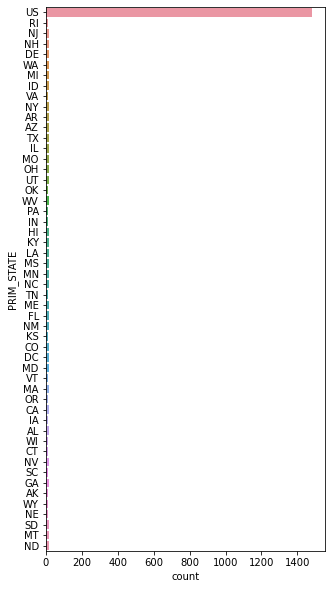

In [24]:
# Let us draw count plot using seaborn
fig = plt.figure(figsize = (5, 10))
sns.countplot(y = df_train['PRIM_STATE'])
plt.show()

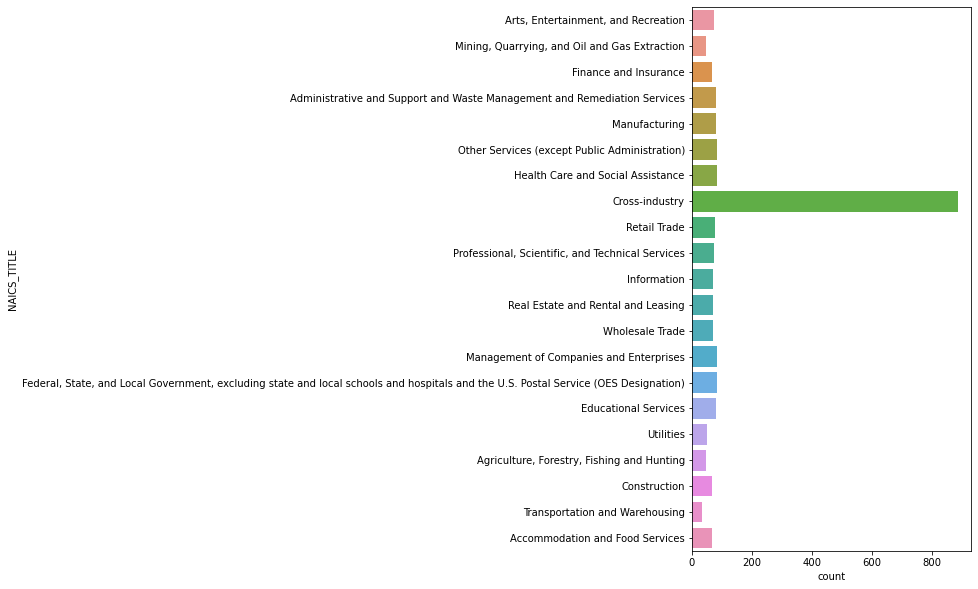

In [25]:
fig = plt.figure(figsize = (5, 10))
sns.countplot(y = df_train['NAICS_TITLE'])
plt.show()

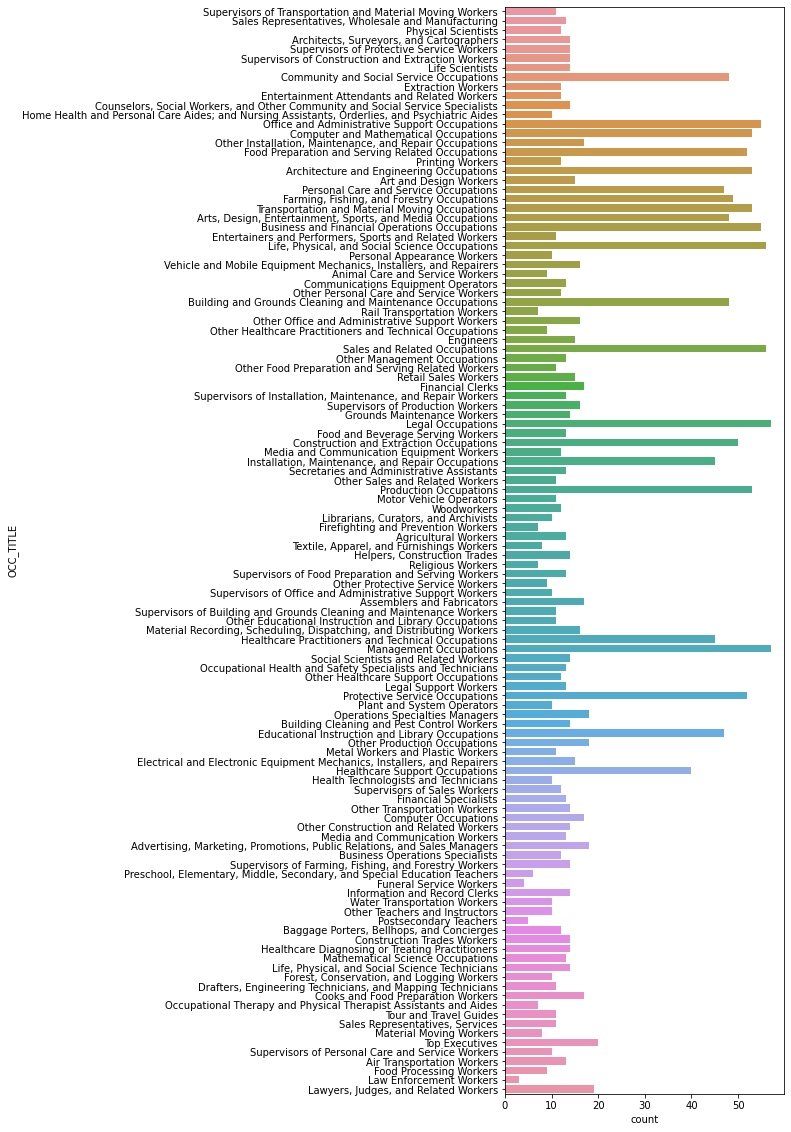

In [26]:
fig = plt.figure(figsize = (5, 20))
sns.countplot(y = df_train['OCC_TITLE'])
plt.show()

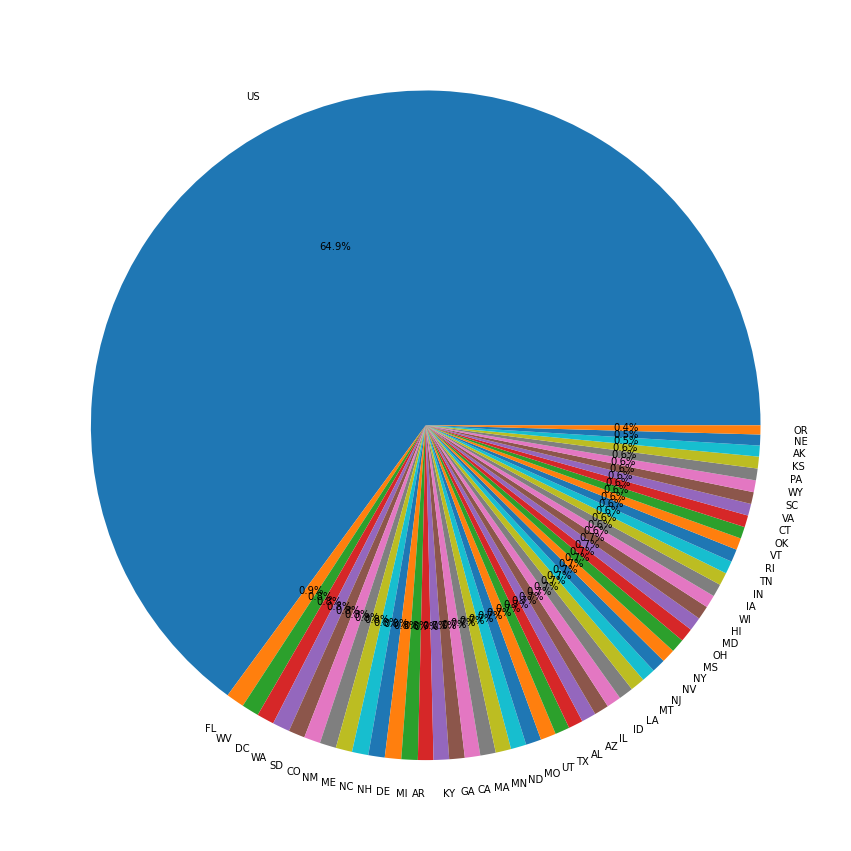

In [27]:
#Pie chart
state_cnt = df_train['PRIM_STATE'].value_counts()
ind_cnt = df_train['NAICS_TITLE'].value_counts()
occ_cnt = df_train['OCC_TITLE'].value_counts()

fig = plt.figure(figsize = (15,100))
fig.set_facecolor('white')
plt.pie(state_cnt.values, labels = state_cnt.index, autopct = '%1.1f%%', shadow = False)
plt.show()

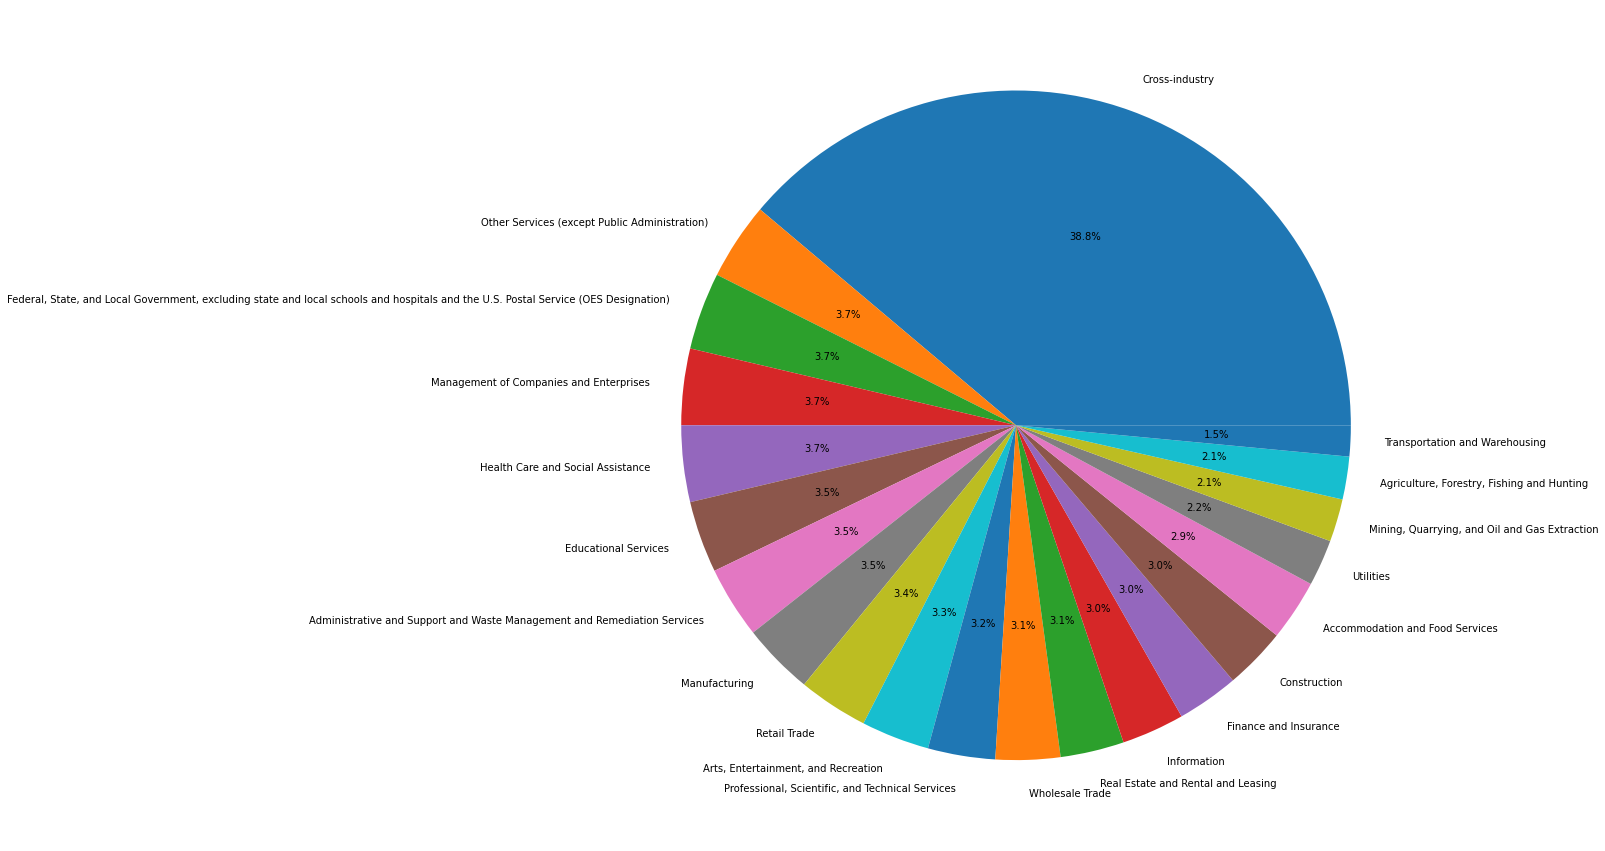

In [28]:
fig = plt.figure(figsize = (15,100))
fig.set_facecolor('white')
plt.pie(ind_cnt.values, labels = ind_cnt.index, autopct = '%1.1f%%', shadow = False)
plt.show()

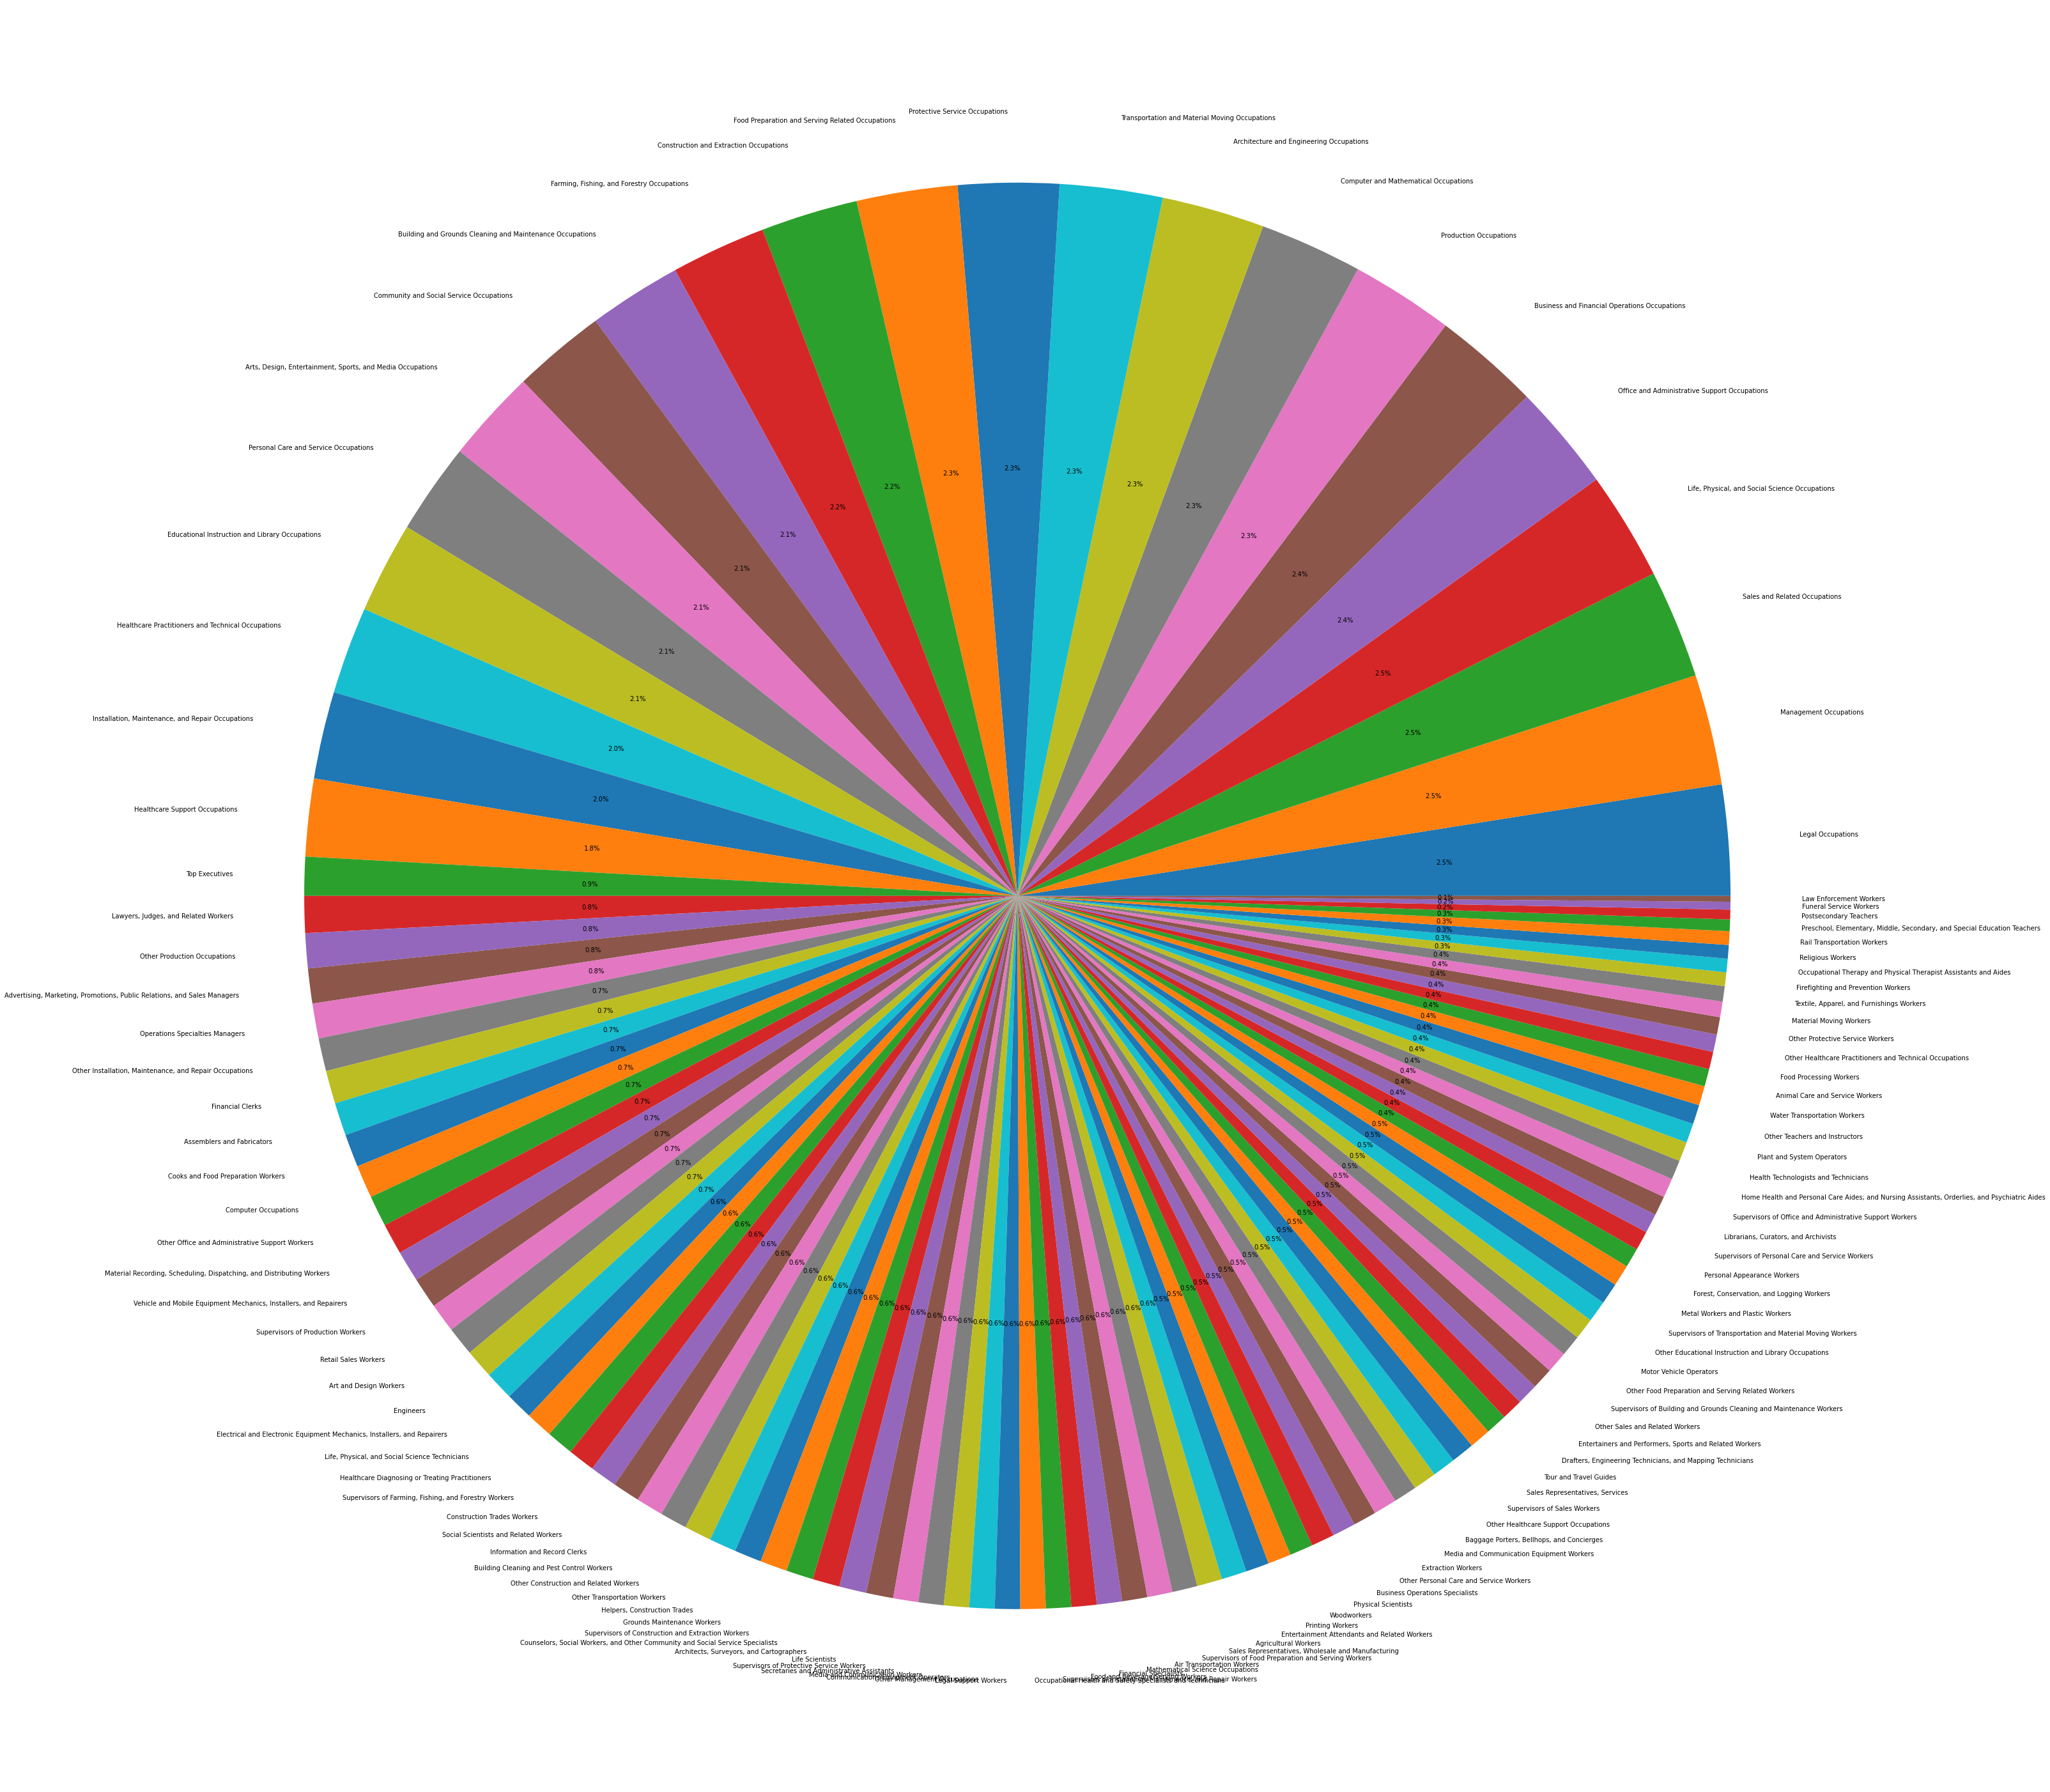

In [29]:
fig = plt.figure(figsize = (50,100))
fig.set_facecolor('white')
plt.pie(occ_cnt.values, labels = occ_cnt.index, autopct = '%1.1f%%', shadow = False)
plt.show()

## Insights from the above plots
1. "US" value is present in column PRIM_STATE of around 64%
2. "Cross-Industry" value is present in column NAICS_TITLE of around 38%
3. "Legal Occupations" and "Management Occupations" value is present equally around 2.5% in column OCC_TITLE.

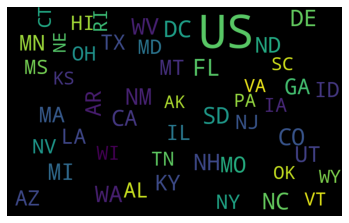

In [30]:
# Word Cloud for Independent Categorical columns
text = ' '.join([text for text in df_train['PRIM_STATE']])
wc = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

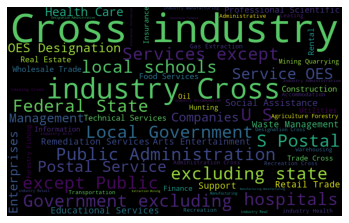

In [31]:
# Word Cloud for Independent Categorical columns
text = ' '.join([text for text in df_train['NAICS_TITLE']])
wc = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

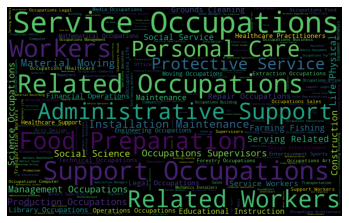

In [32]:
# Word Cloud for Independent Categorical columns
text = ' '.join([text for text in df_train['OCC_TITLE']])
wc = WordCloud(width = 800, height = 500, random_state = 42, max_font_size = 110).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## From the above word clouds we can say that:
 US, Cross Industry and Service Occupations are the words being more used as part of the category names in first 3 Independent Features.

Let's check the impact of Independent features on different targets features.

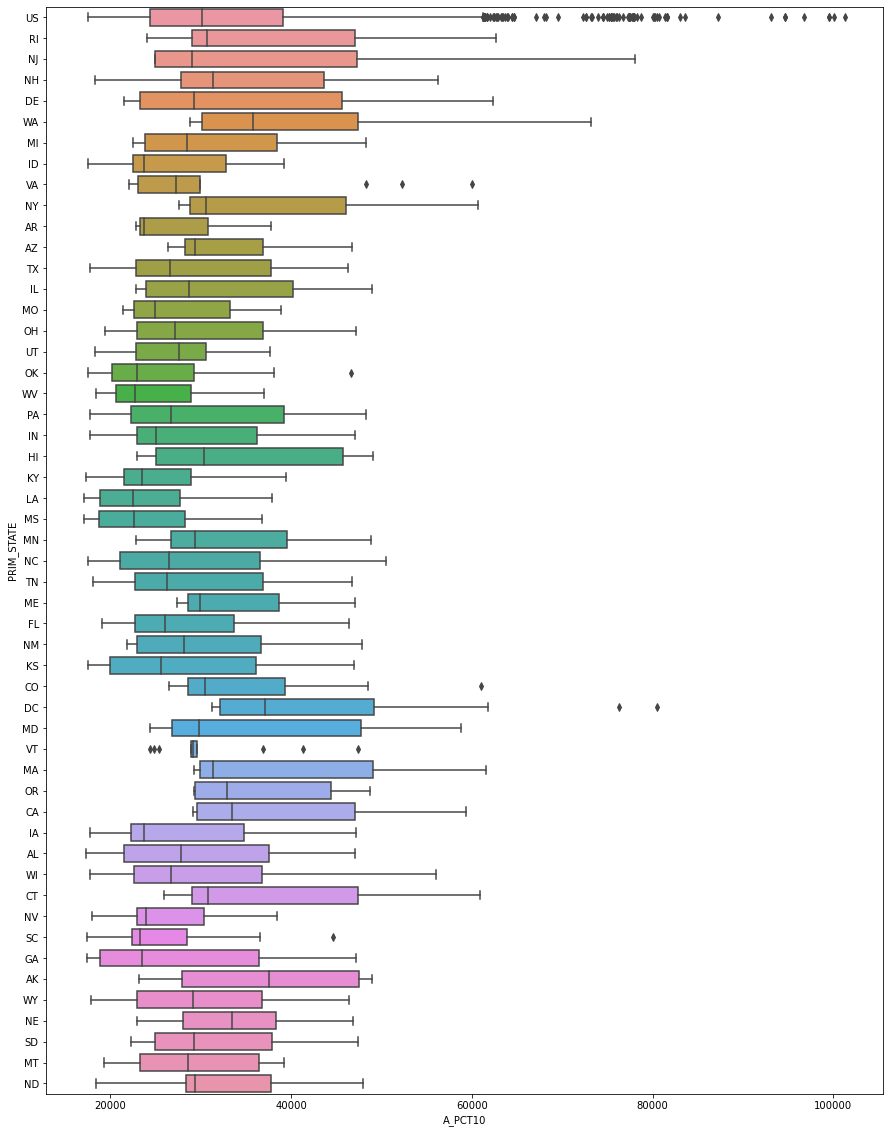

In [33]:
fig = plt.figure(figsize = (15, 20))
sns.boxplot(data = df_train, y = 'PRIM_STATE', x = 'A_PCT10')
plt.show()

## *DC state is having maximum A_PCT10 value after US*

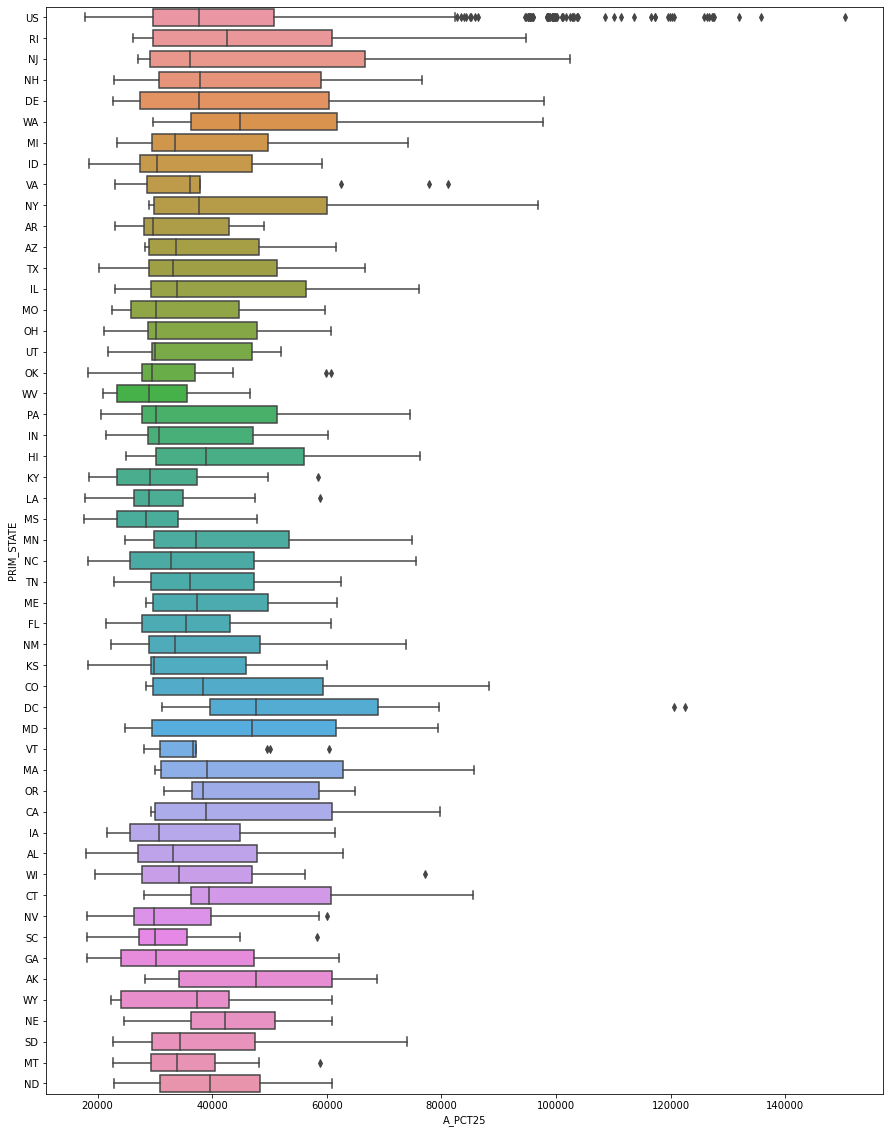

In [34]:
fig = plt.figure(figsize = (15, 20))
sns.boxplot(data = df_train, y = 'PRIM_STATE', x = 'A_PCT25')
plt.show()

## *DC state has maximum value for A_PCT25, after US*

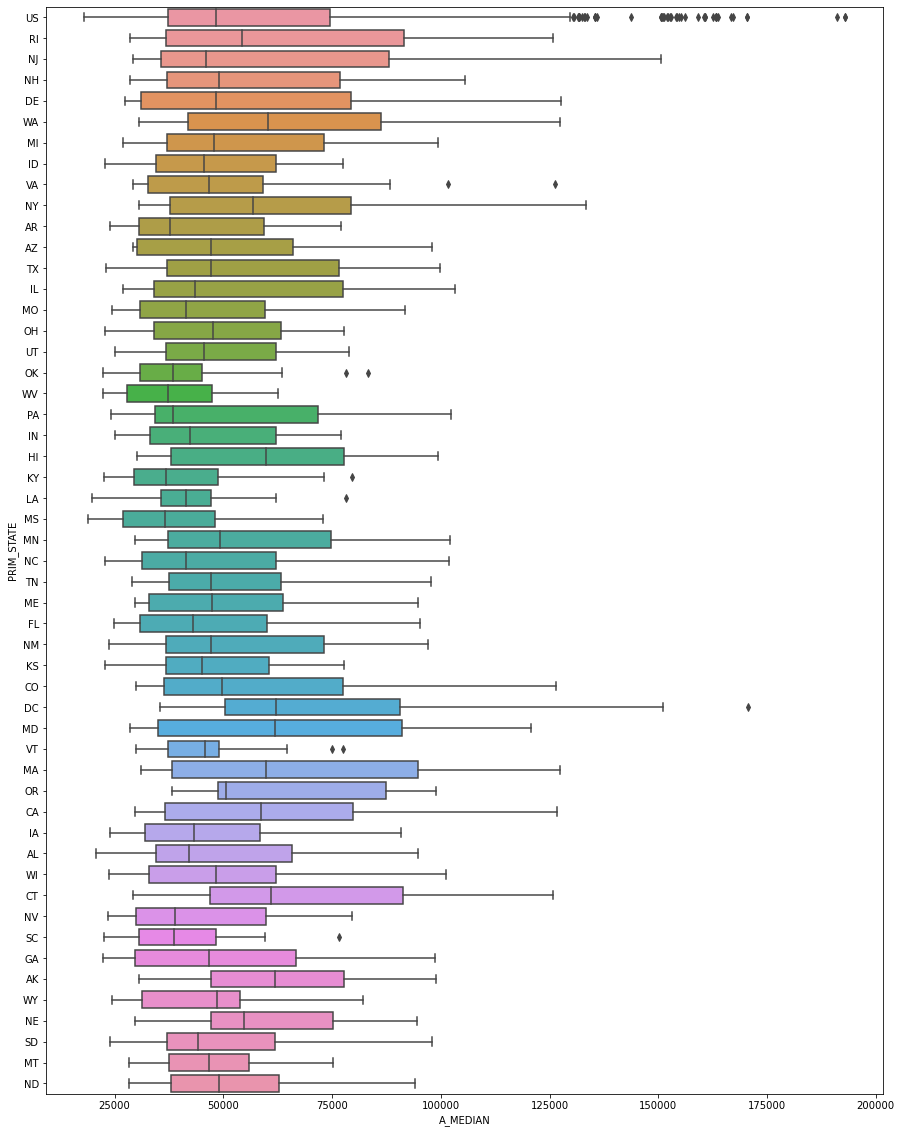

In [35]:
fig = plt.figure(figsize = (15, 20))
sns.boxplot(data = df_train, y = 'PRIM_STATE', x = 'A_MEDIAN')
plt.show()

## *DC state has maximum value for A_MEDIAN after US*

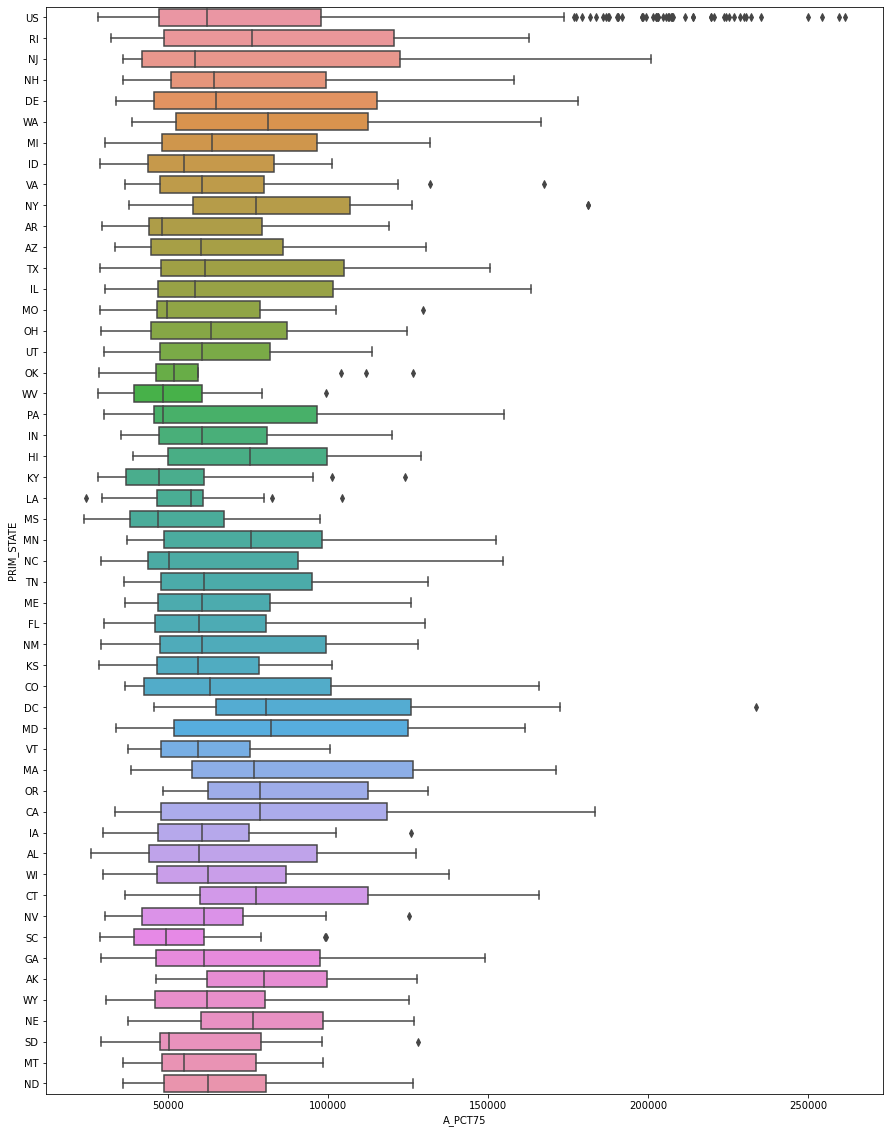

In [36]:
fig = plt.figure(figsize = (15, 20))
sns.boxplot(data = df_train, y = 'PRIM_STATE', x = 'A_PCT75')
plt.show()

# *DC state has maximum value for A_PCT75 after US*

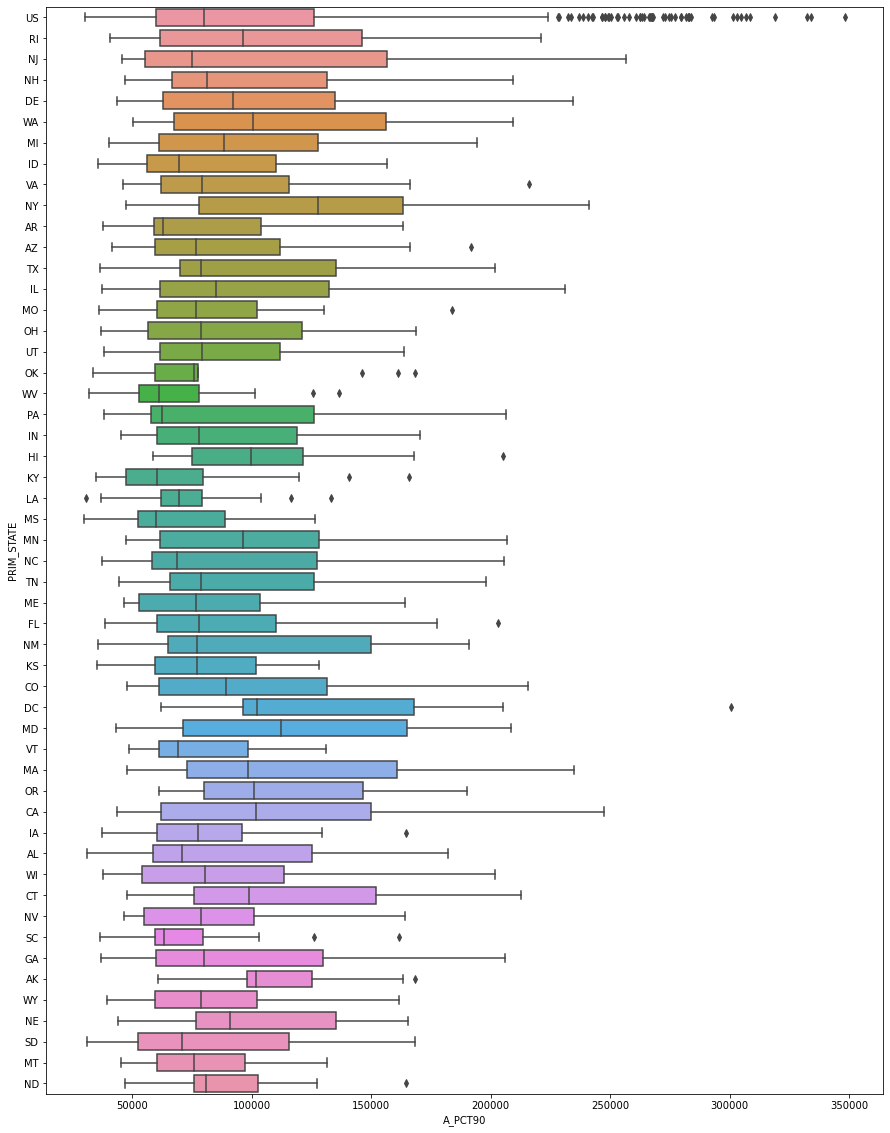

In [37]:
fig = plt.figure(figsize = (15, 20))
sns.boxplot(data = df_train, y = 'PRIM_STATE', x = 'A_PCT90')
plt.show()

## *DC state has maximum value for A_PCT90 after US*

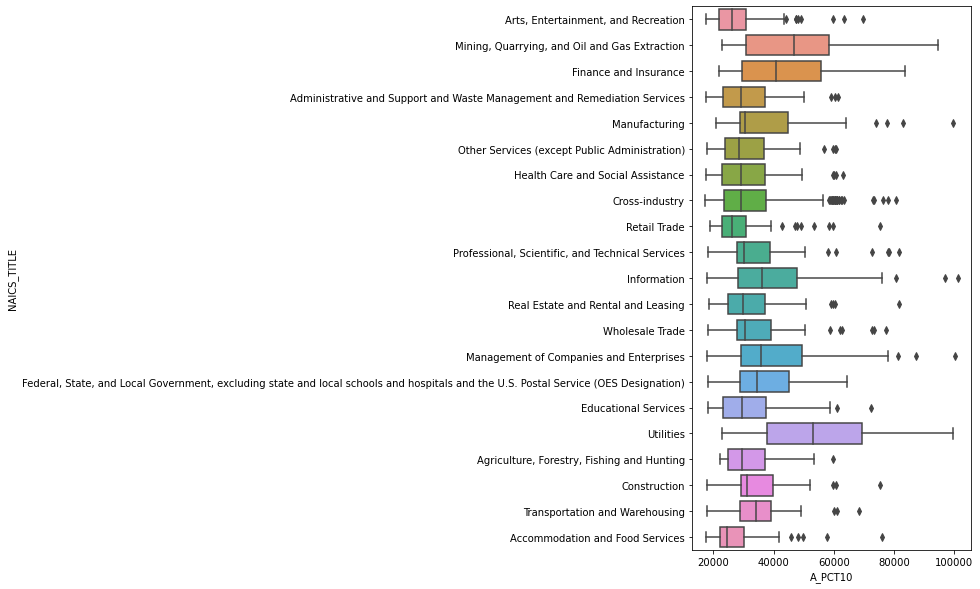

In [38]:
fig = plt.figure(figsize = (5, 10))
sns.boxplot(data = df_train, y = 'NAICS_TITLE', x = 'A_PCT10')
plt.show()

## *Information Industry is gaining more 10th percentile annual base salary than any other industries.*

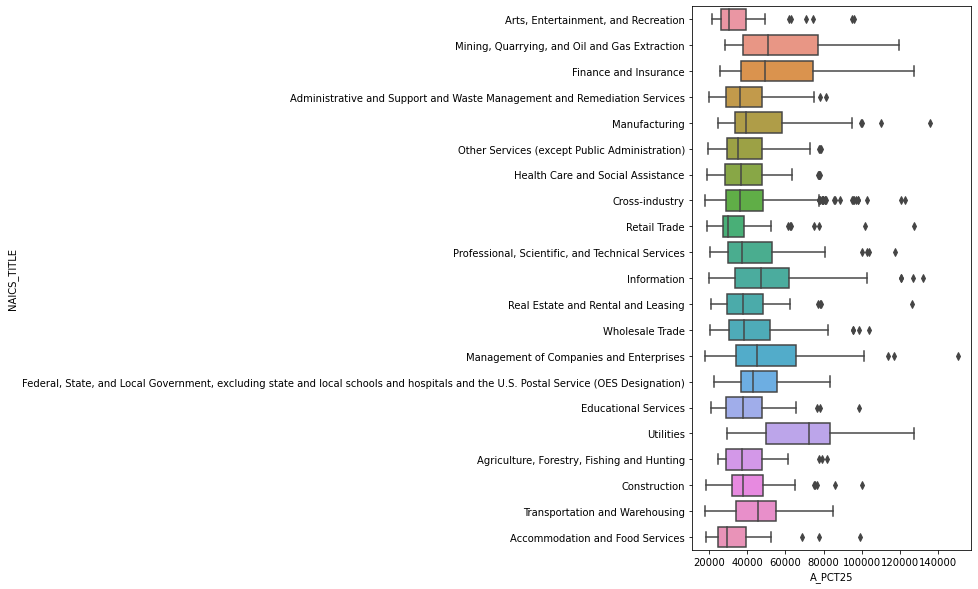

In [39]:
fig = plt.figure(figsize = (5, 10))
sns.boxplot(data = df_train, y = 'NAICS_TITLE', x = 'A_PCT25')
plt.show()

## *Management of Companies and Enterprises Industry is gaining more 25th percentile annual salary than any other industries.*

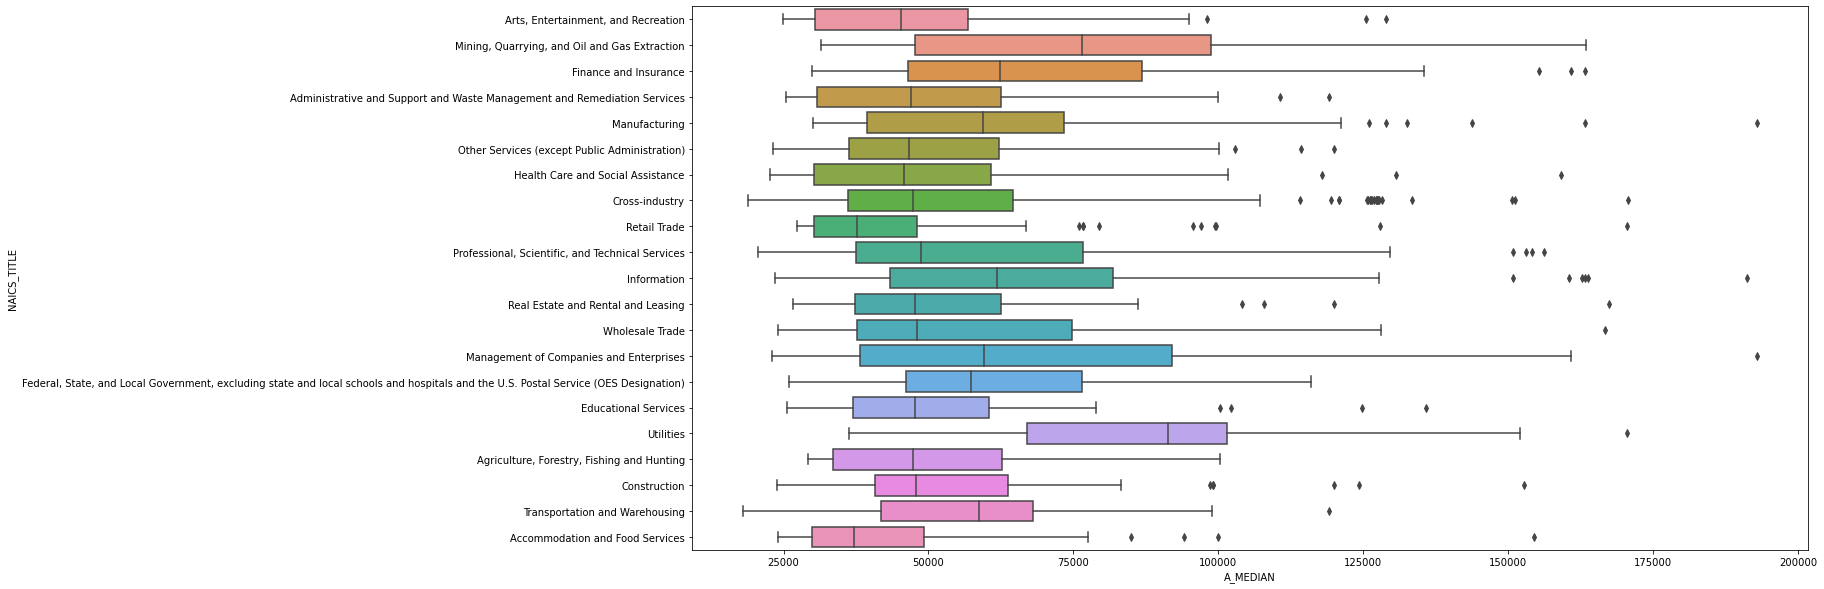

In [40]:
fig = plt.figure(figsize = (20, 10))
sns.boxplot(data = df_train, y = 'NAICS_TITLE', x = 'A_MEDIAN')
plt.show()

## *Management of Companies and Enterprises, Manufacturing Industries are equally gaining more 50th percentile annual salary than any other industries.*

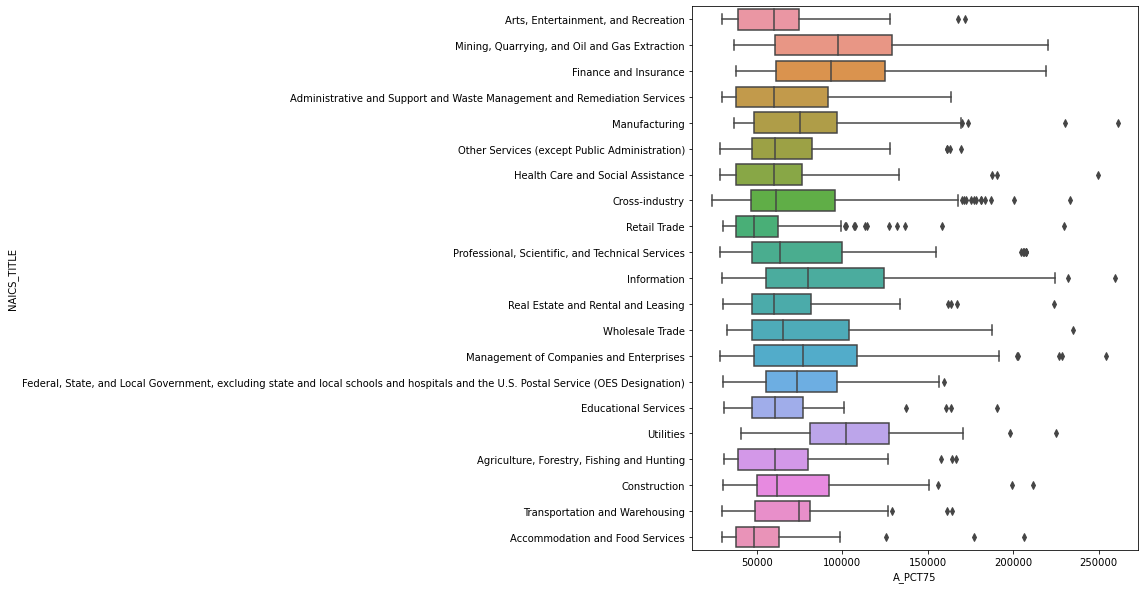

In [41]:
fig = plt.figure(figsize = (8, 10))
sns.boxplot(data = df_train, y = 'NAICS_TITLE', x = 'A_PCT75')
plt.show()

## *Manufacturing Industry is gaining more 75th percentile annual base salary than any other industries.*

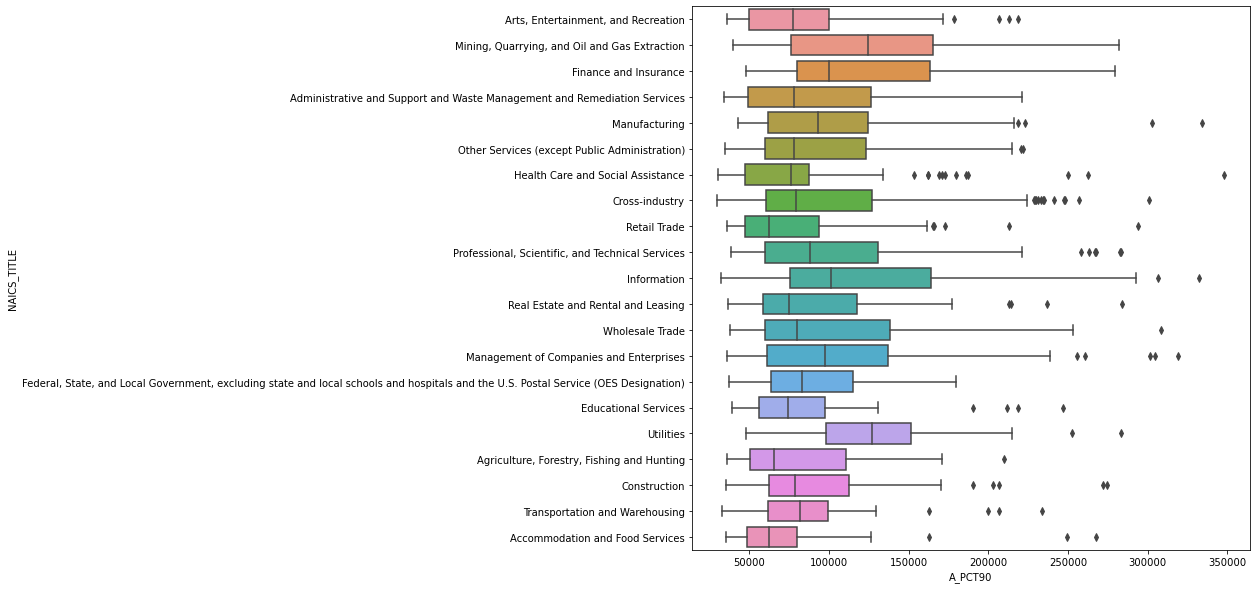

In [42]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(data = df_train, y = 'NAICS_TITLE', x = 'A_PCT90')
plt.show()

## *Health Care and Social Assitance industry is gaining more 90th percentile annual base salary than any other industries.*

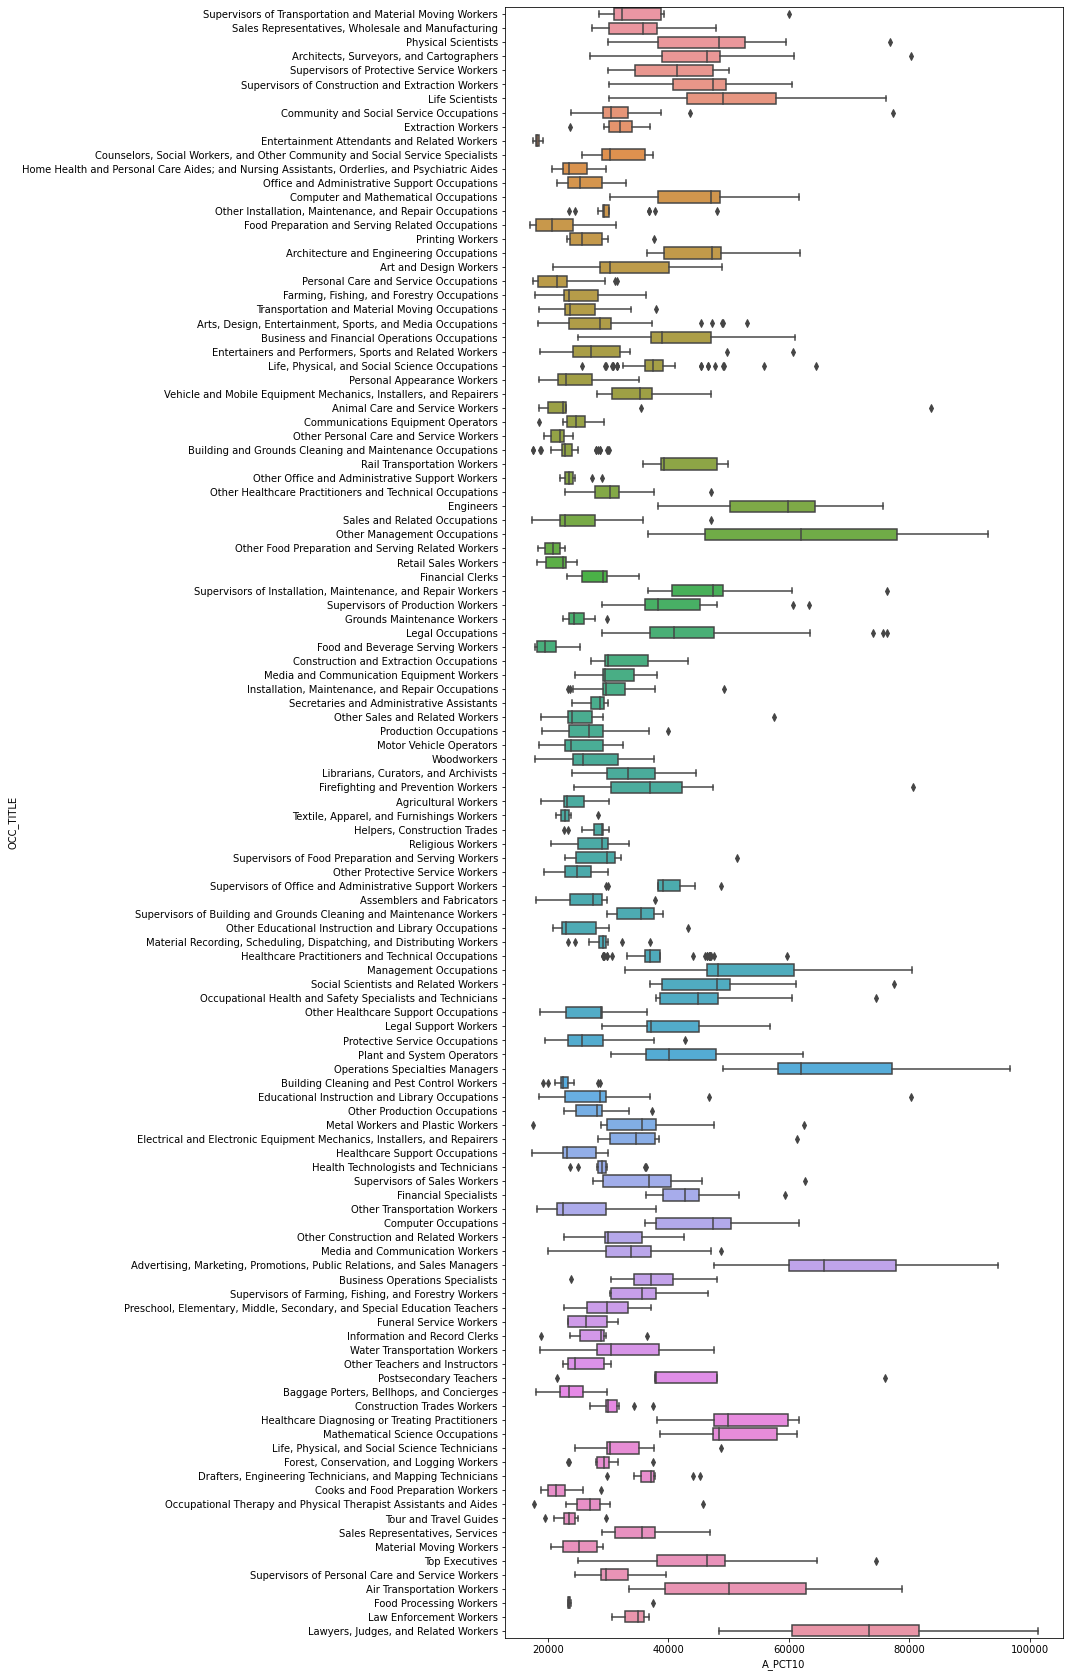

In [43]:
fig = plt.figure(figsize = (10, 30))
sns.boxplot(data = df_train, y = 'OCC_TITLE', x = 'A_PCT10')
plt.show()

## *"Lawyers, Judges, and Related Workers" occupation is gaining more 10th percentile base annual salary than any other occupation.* 

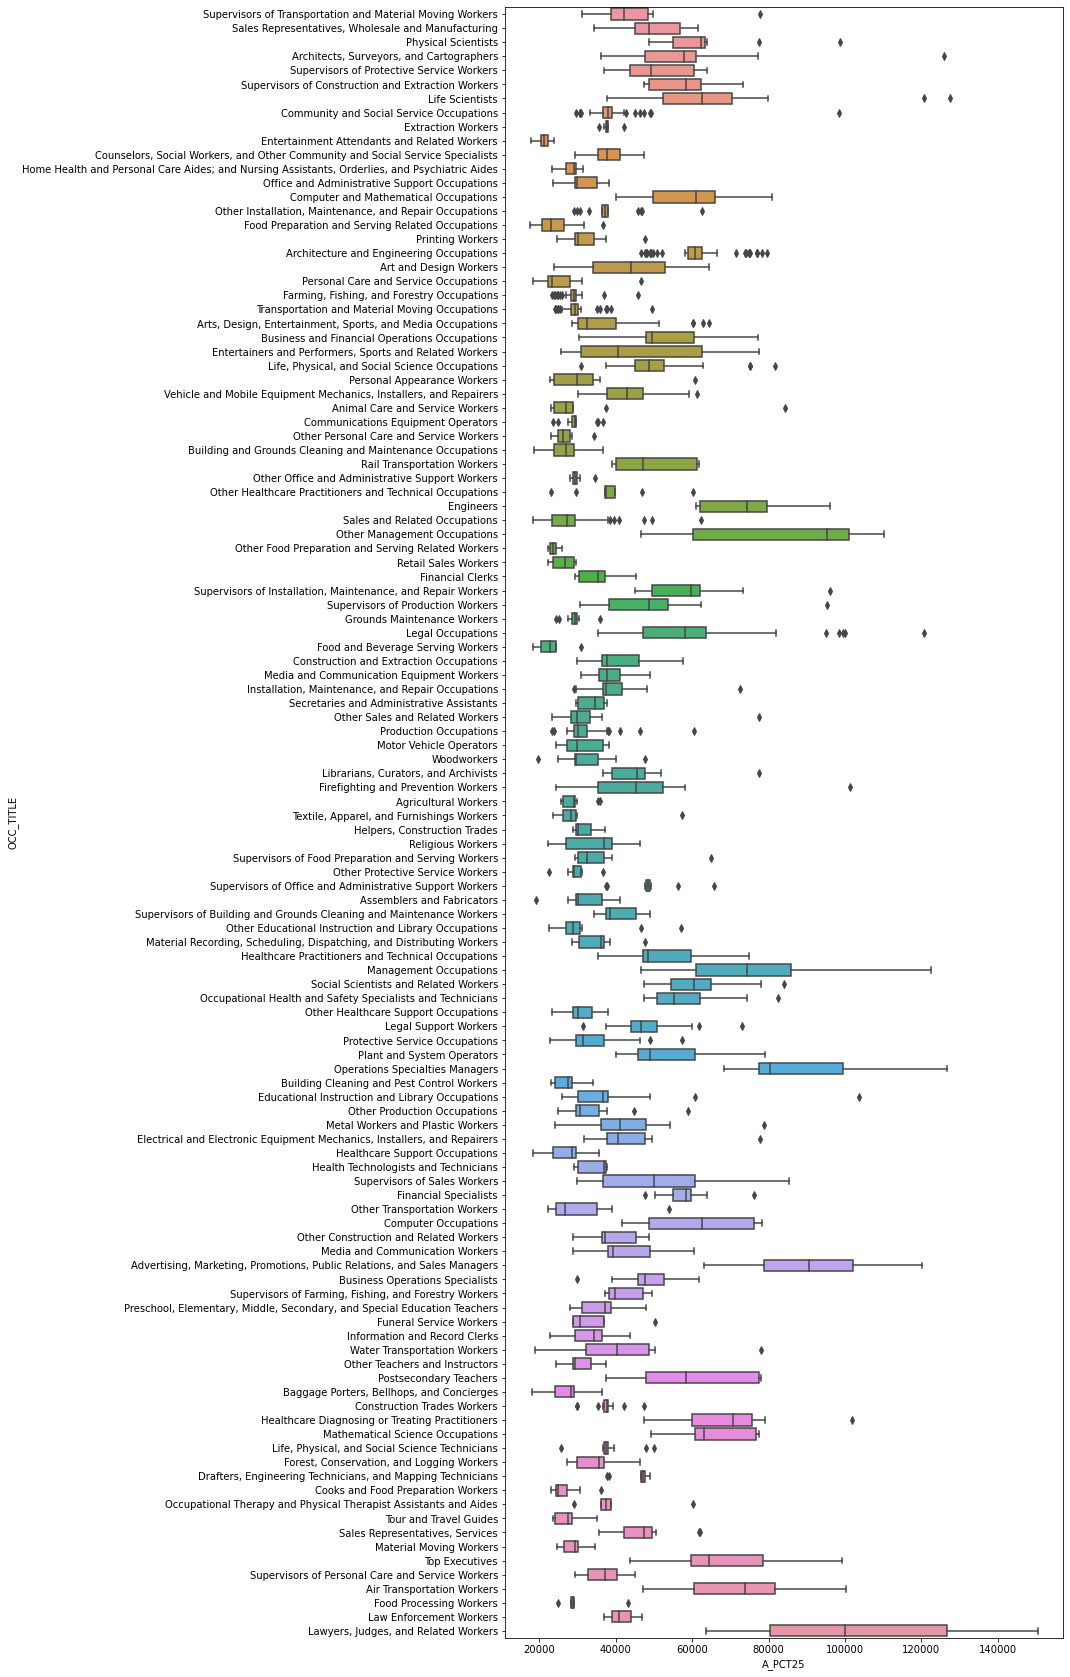

In [44]:
fig = plt.figure(figsize = (10, 30))
sns.boxplot(data = df_train, y = 'OCC_TITLE', x = 'A_PCT25')
plt.show()

## *"Lawyers, Judges, and Related Workers" Occupation is gaining more 25th percentile base annual salary than anyother occupations*

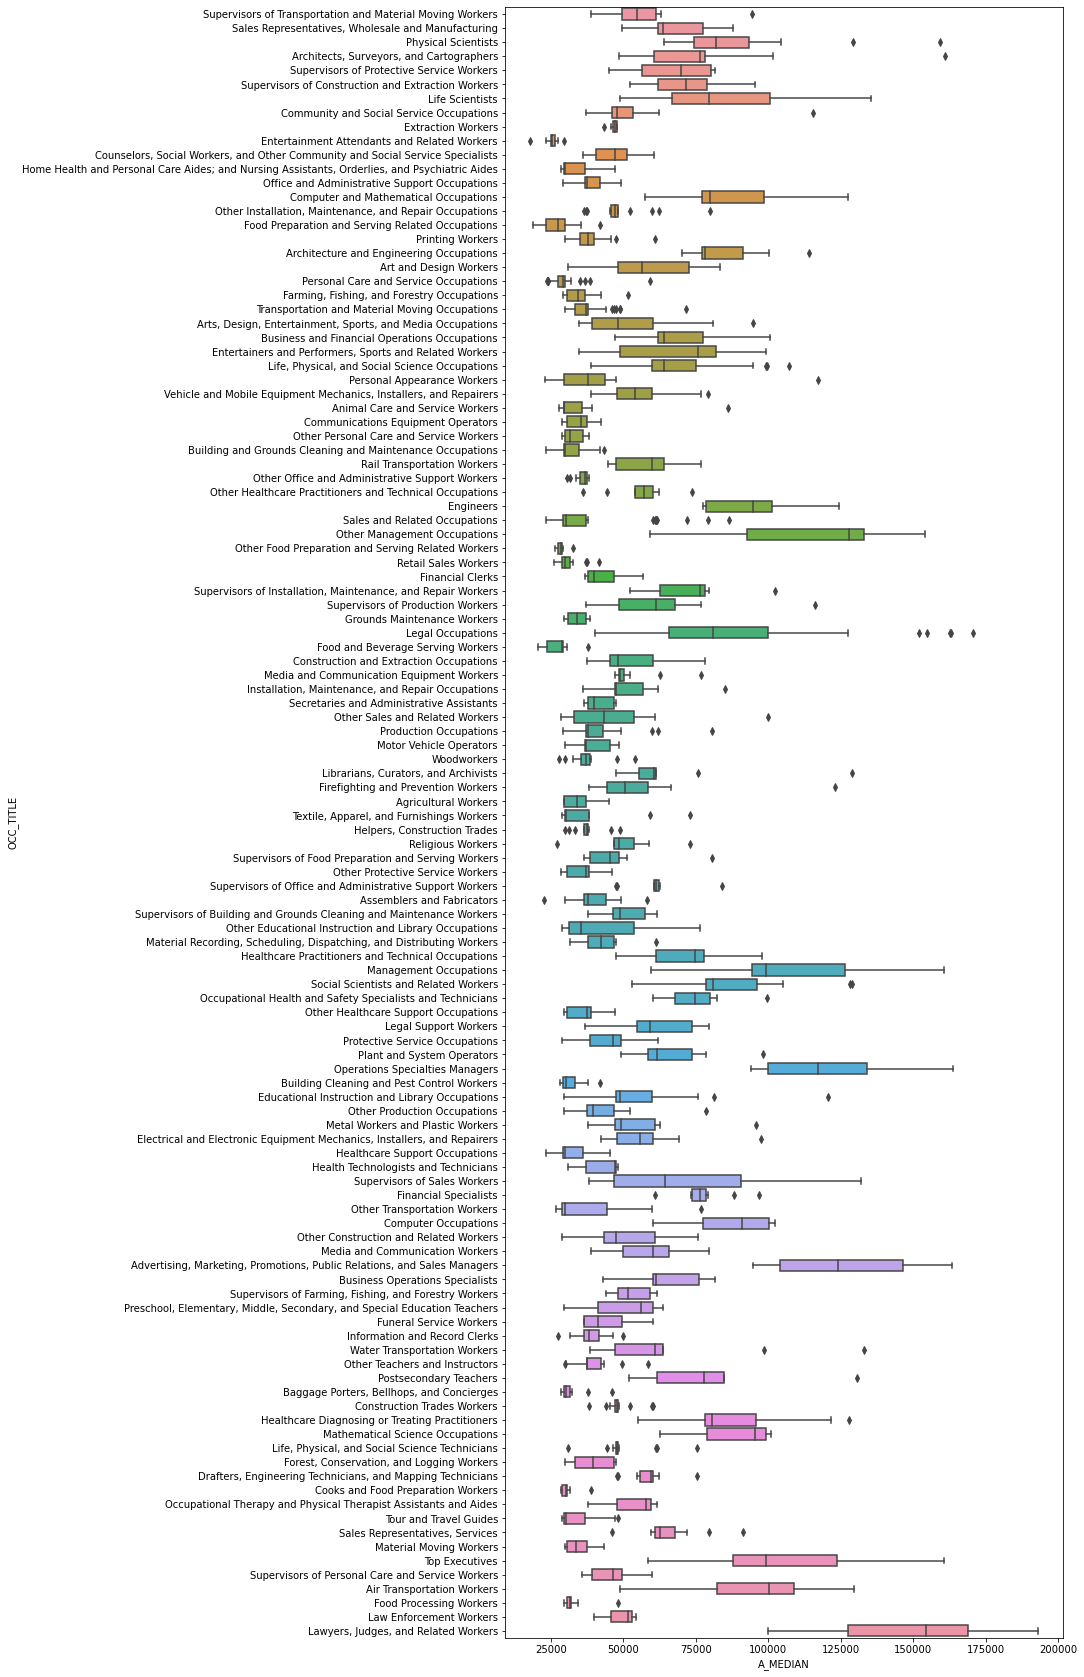

In [45]:
fig = plt.figure(figsize = (10, 30))
sns.boxplot(data = df_train, y = 'OCC_TITLE', x = 'A_MEDIAN')
plt.show()

## *"Lawyers, Judges, and Related Workers" Occupation is gaining more 50th percentile base annual salary than anyother occupations**

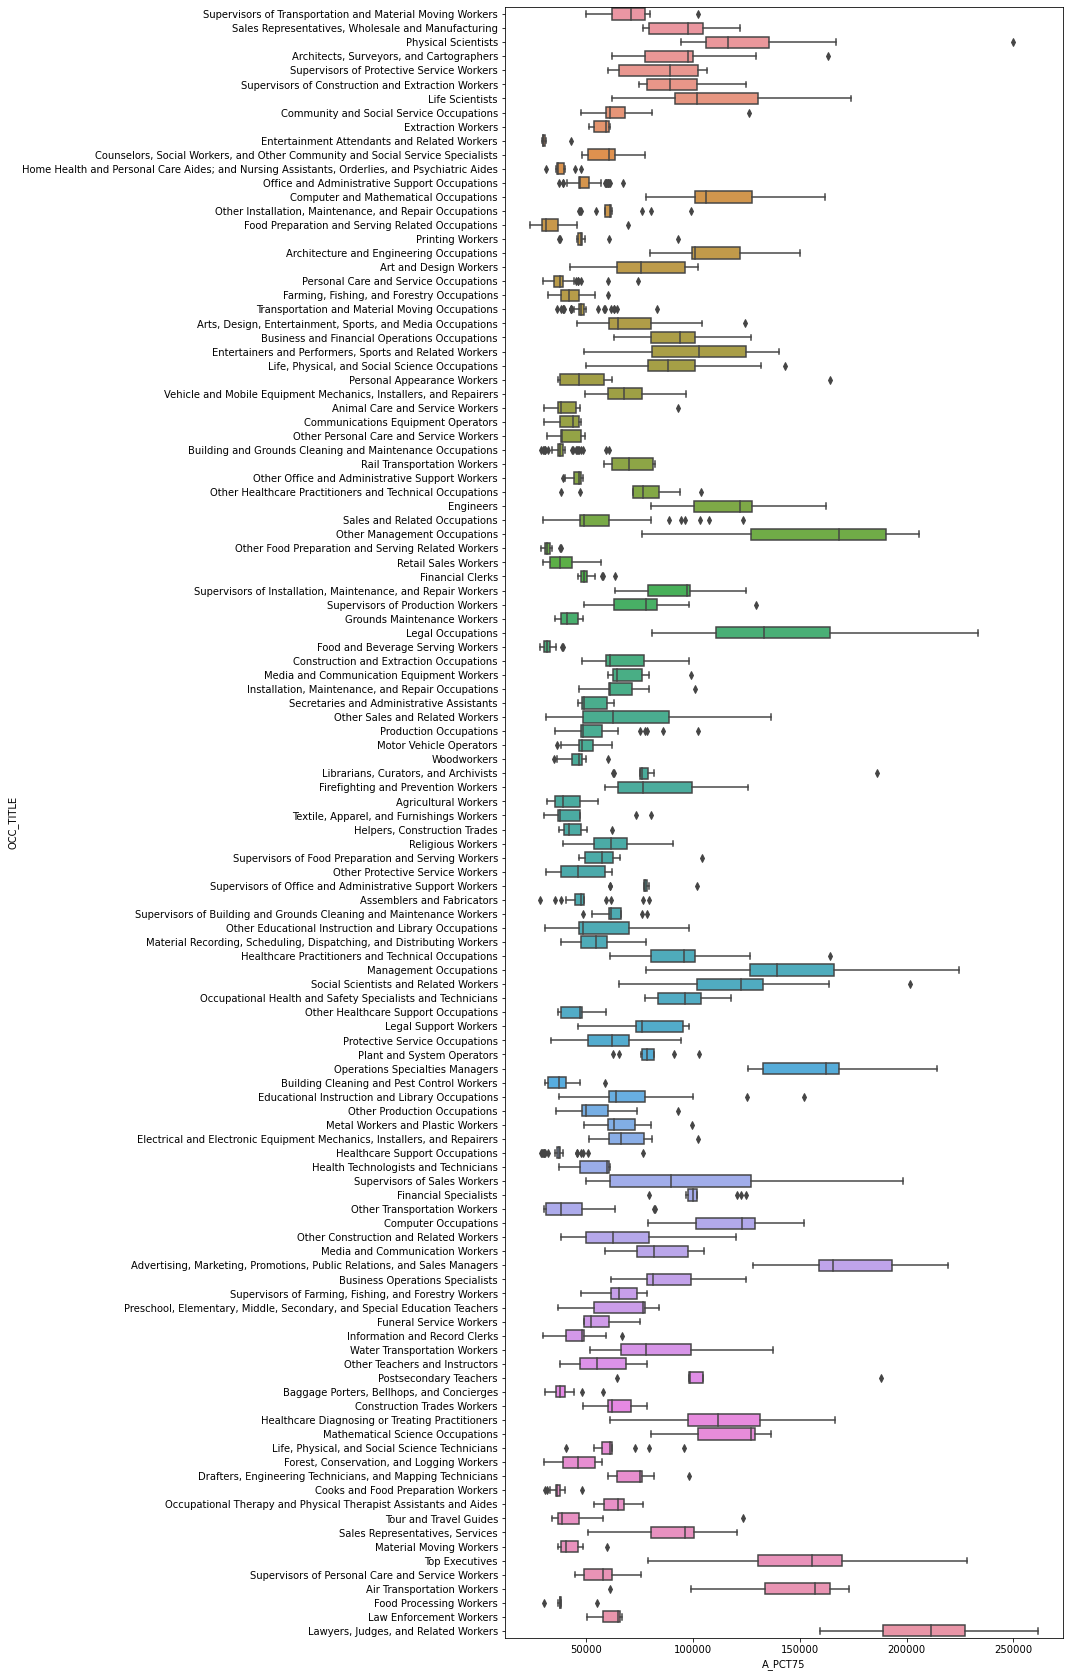

In [46]:
fig = plt.figure(figsize = (10, 30))
sns.boxplot(data = df_train, y = 'OCC_TITLE', x = 'A_PCT75')
plt.show()

## *Lawyers, Judges, and Related Workers Occupation is gaining more 75th percentile base annual salary than any other occupations.*

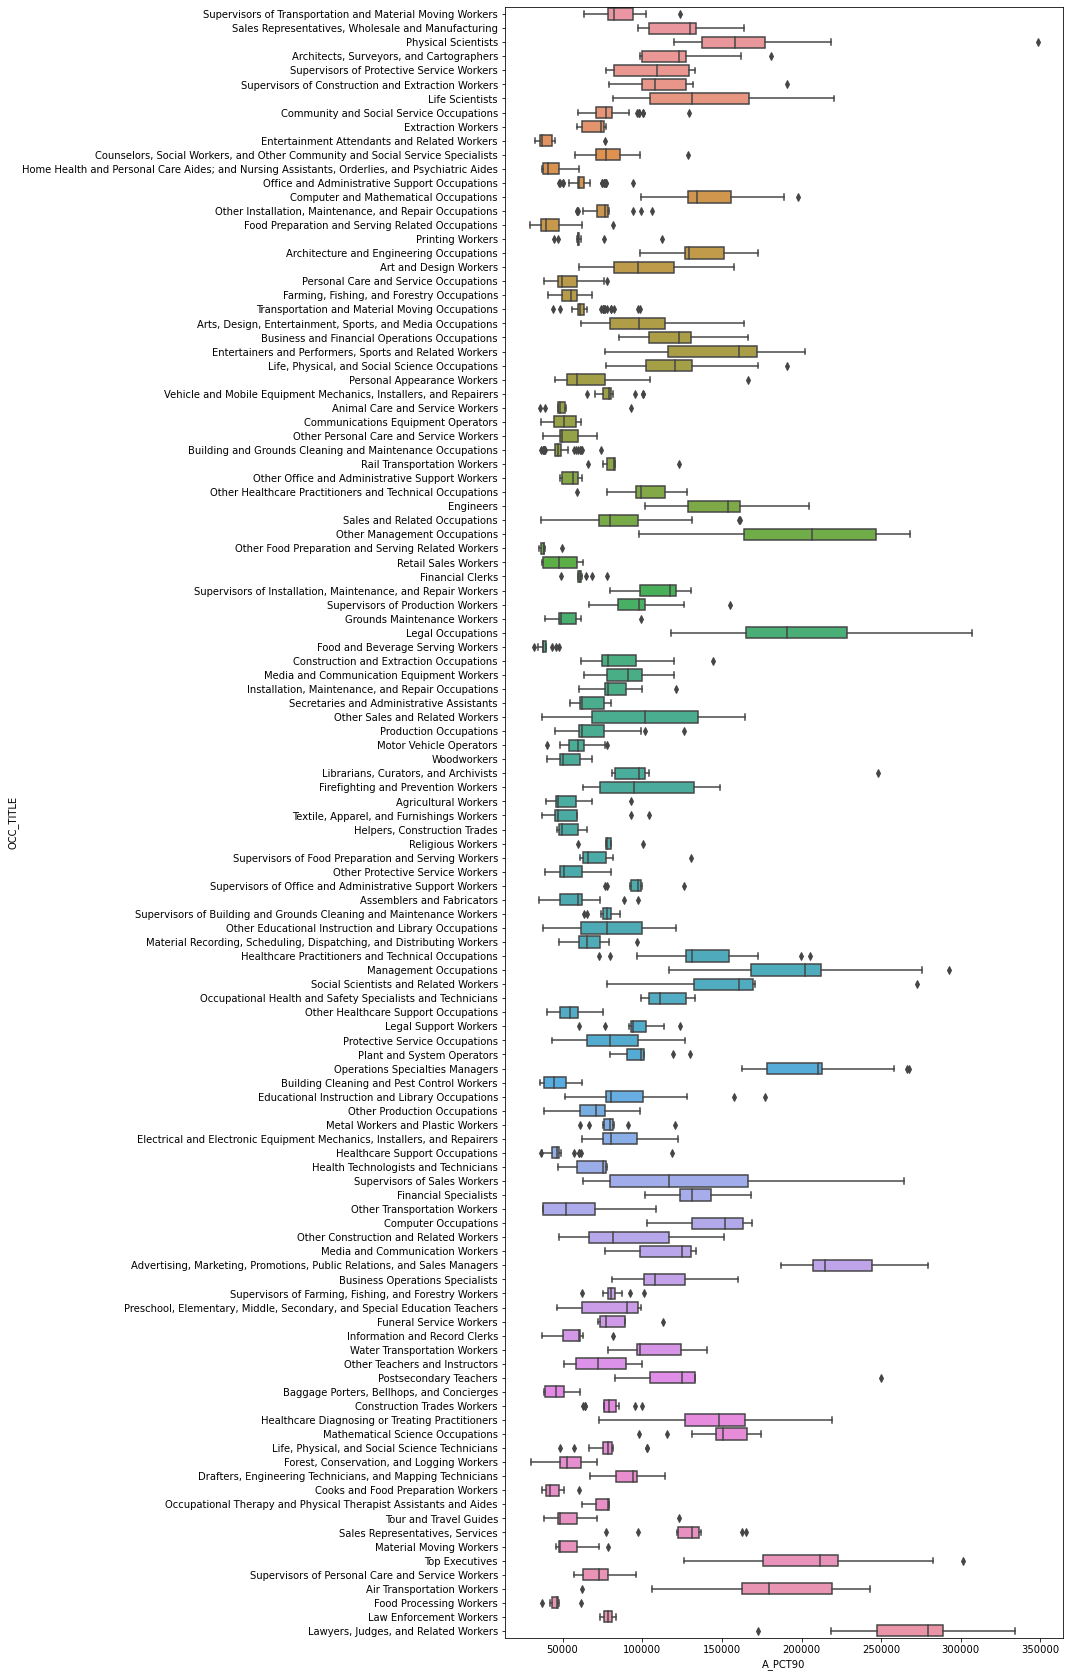

In [47]:
fig = plt.figure(figsize = (10, 30))
sns.boxplot(data = df_train, y = 'OCC_TITLE', x = 'A_PCT90')
plt.show()

## *Physical Scientists Occupation is gaining more 90th percentile annual base salary than any other occupations.*

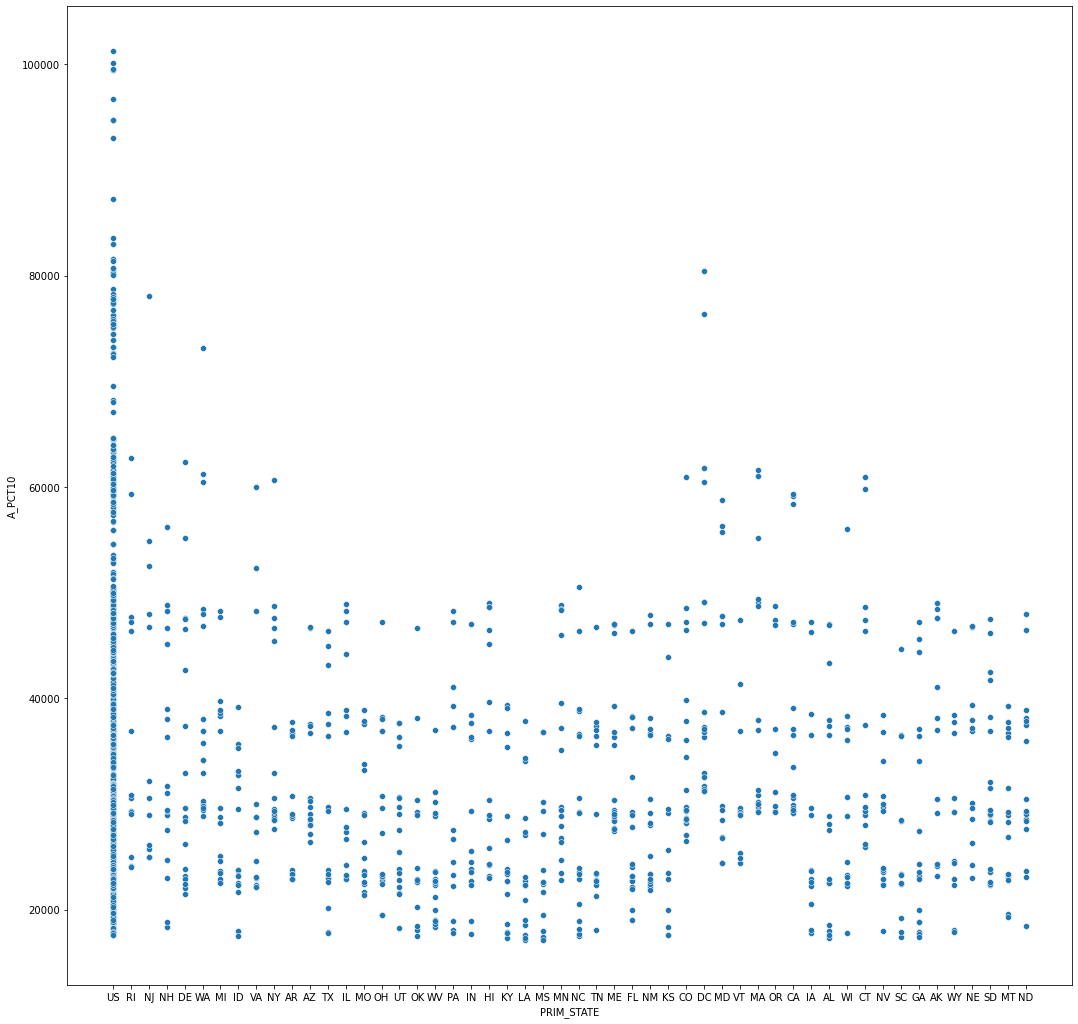

In [48]:
# Scatter plot
fig = plt.figure(figsize= (18, 18))
sns.scatterplot(x = 'PRIM_STATE', y = 'A_PCT10', data = df_train)
plt.show()

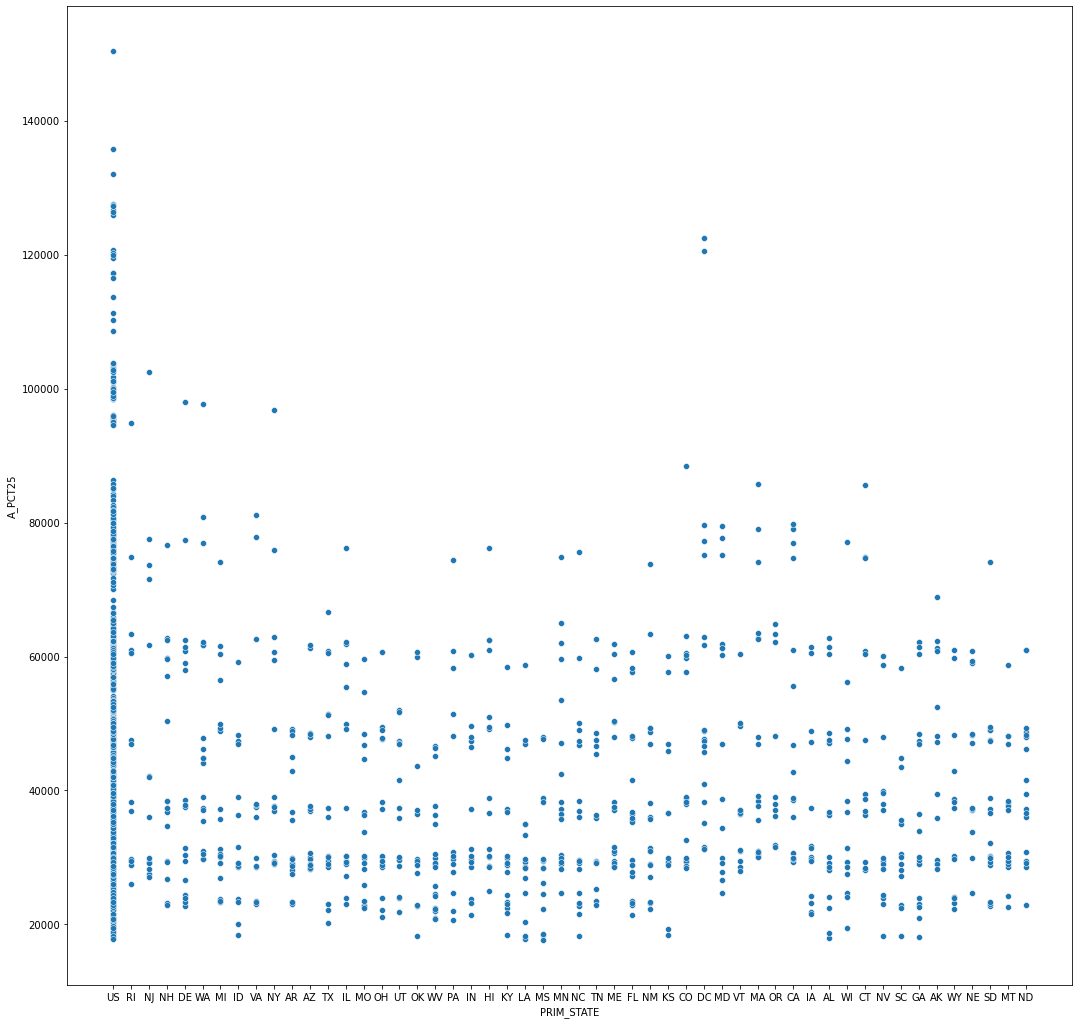

In [49]:
fig = plt.figure(figsize= (18, 18))
sns.scatterplot(x = 'PRIM_STATE', y = 'A_PCT25', data = df_train)
plt.show()

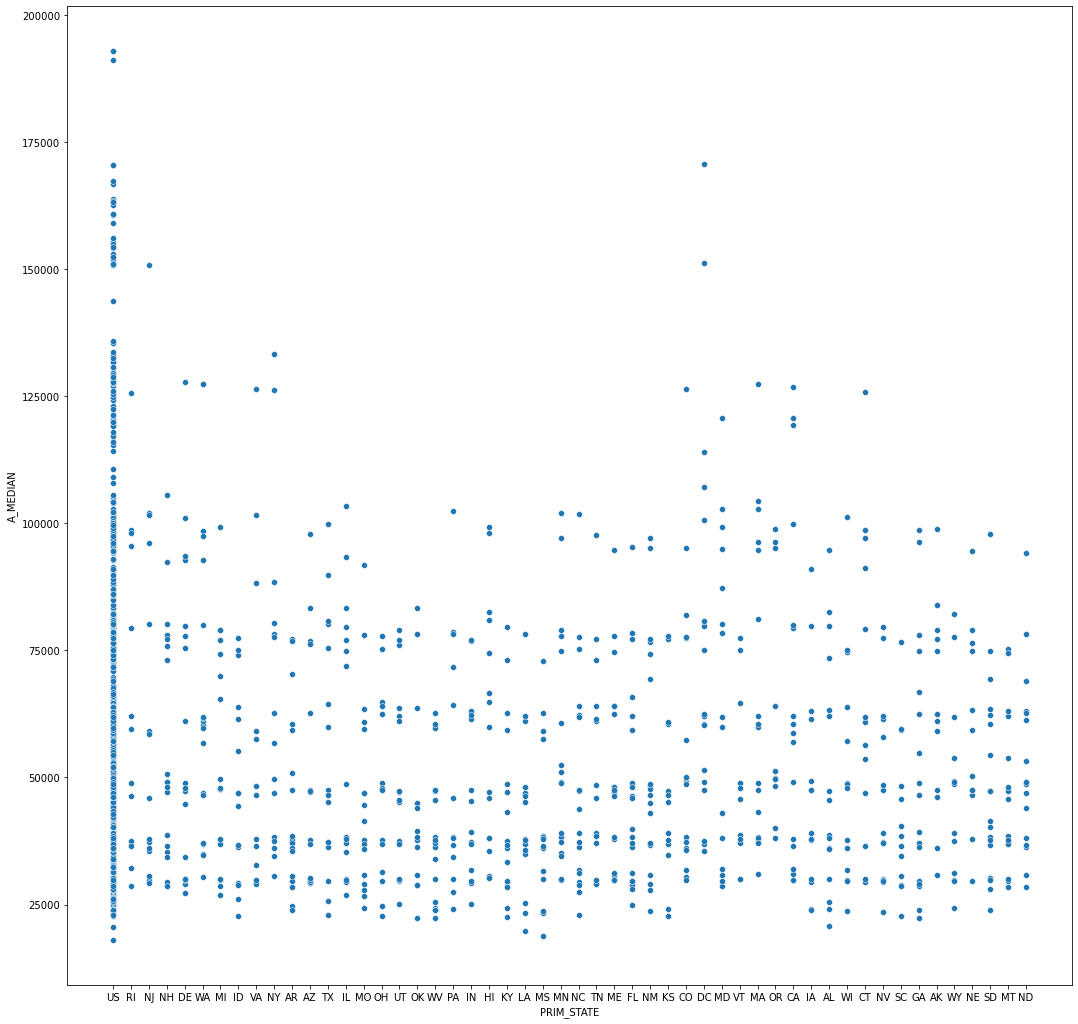

In [50]:
fig = plt.figure(figsize= (18, 18))
sns.scatterplot(x = 'PRIM_STATE', y = 'A_MEDIAN', data = df_train)
plt.show()

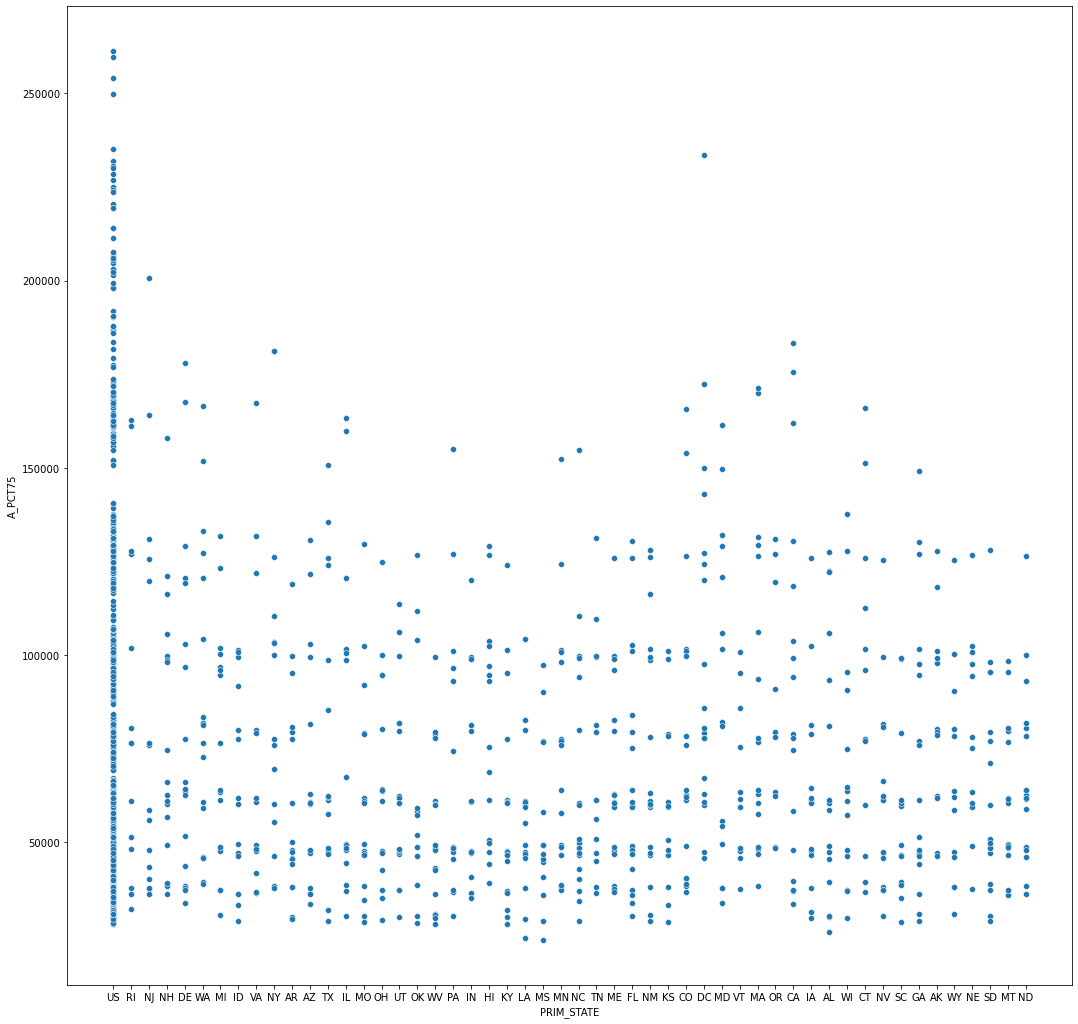

In [51]:
fig = plt.figure(figsize= (18, 18))
sns.scatterplot(x = 'PRIM_STATE', y = 'A_PCT75', data = df_train)
plt.show()

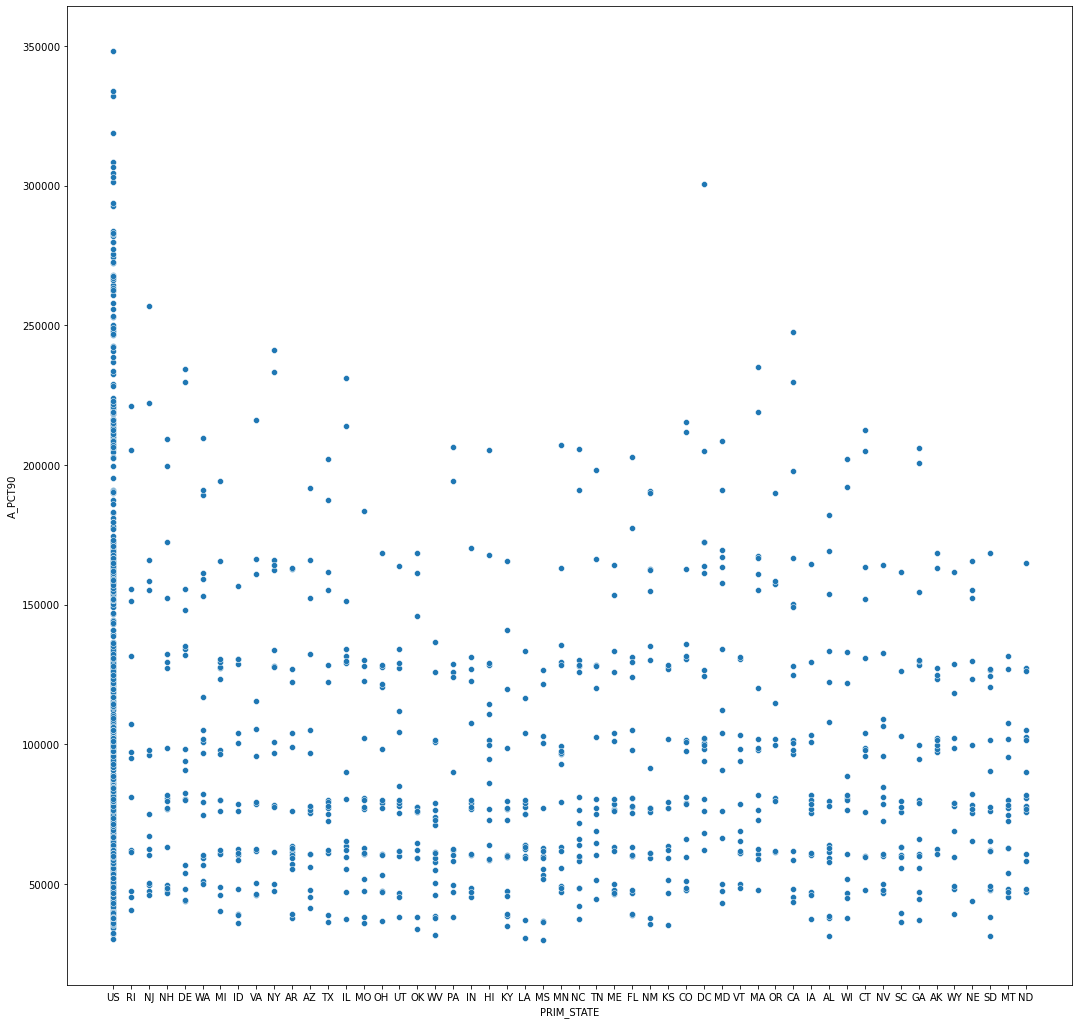

In [52]:
fig = plt.figure(figsize= (18, 18))
sns.scatterplot(x = 'PRIM_STATE', y = 'A_PCT90', data = df_train)
plt.show()

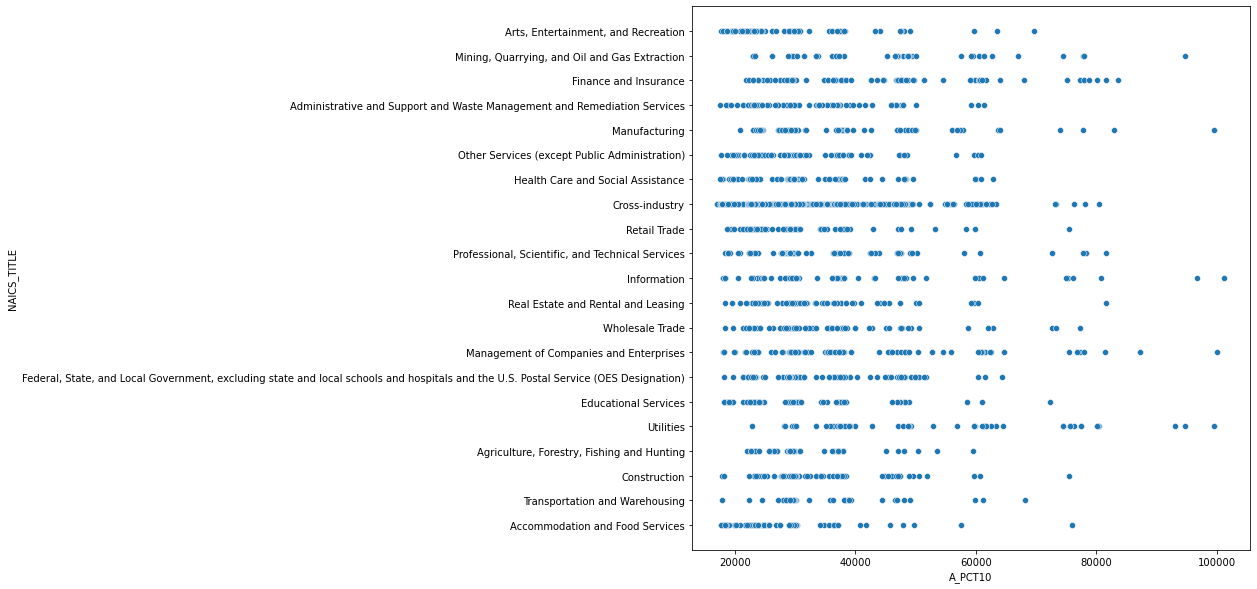

In [53]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(y = 'NAICS_TITLE', x = 'A_PCT10', data = df_train)
plt.show()

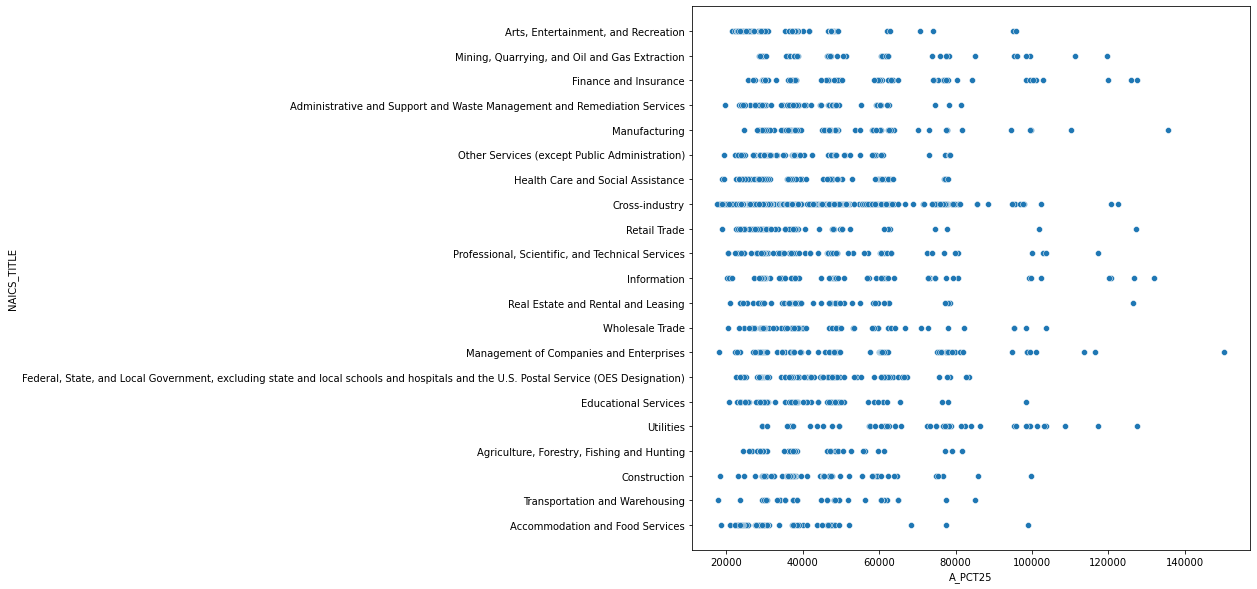

In [54]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(y = 'NAICS_TITLE', x = 'A_PCT25', data = df_train)
plt.show()

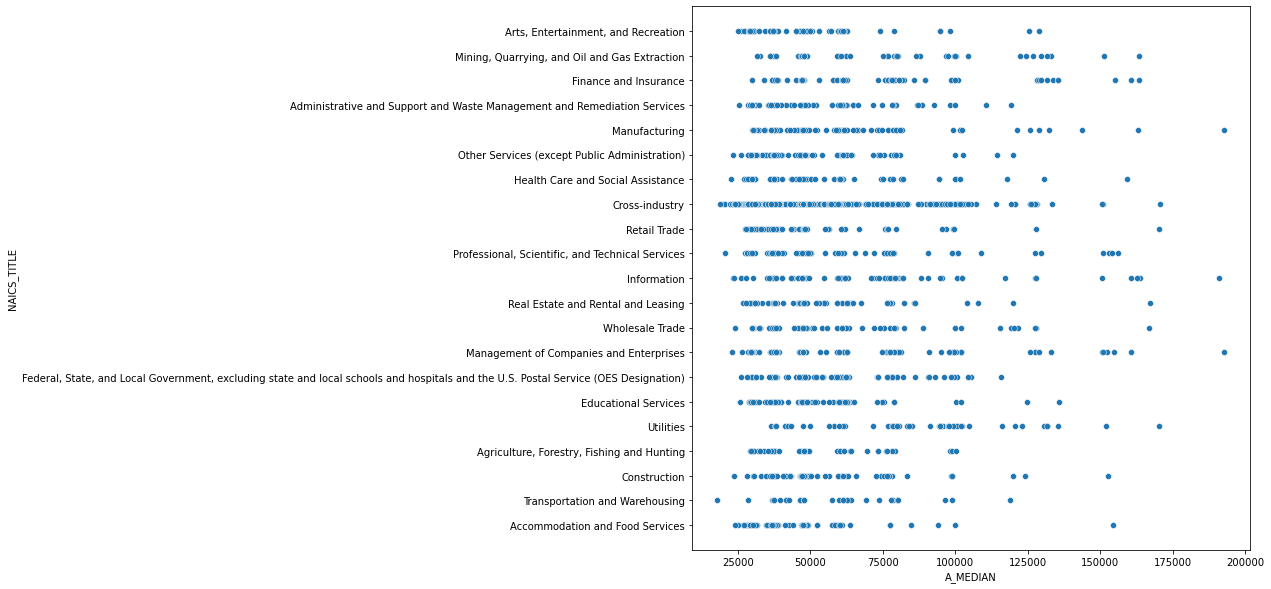

In [55]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(y = 'NAICS_TITLE', x = 'A_MEDIAN', data = df_train)
plt.show()

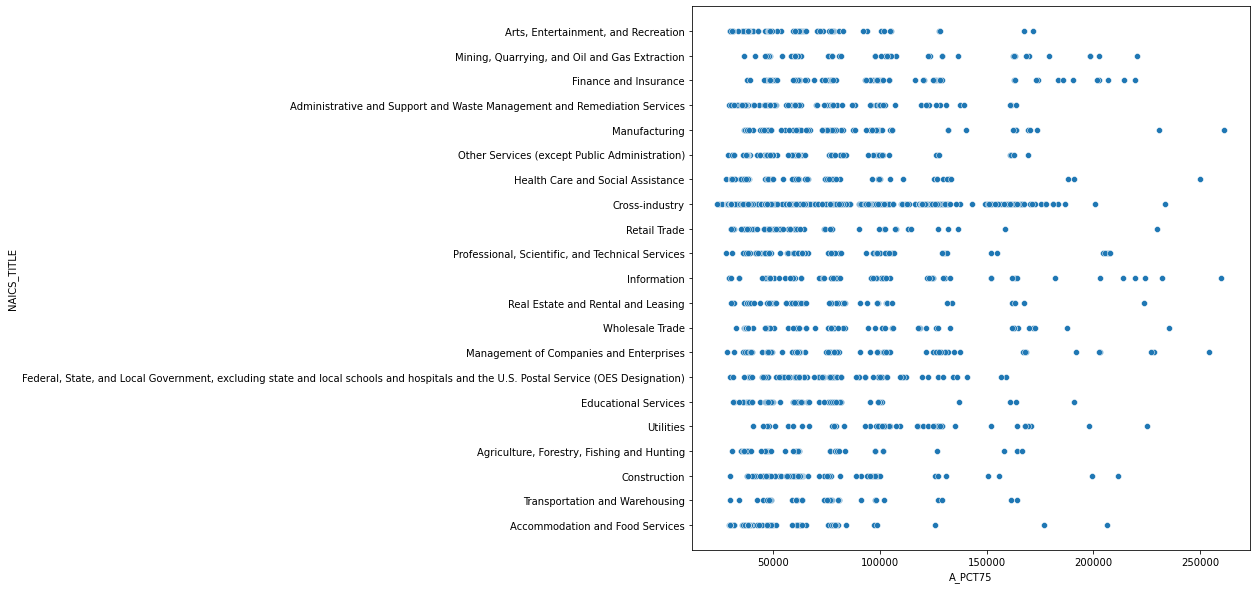

In [56]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(y = 'NAICS_TITLE', x = 'A_PCT75', data = df_train)
plt.show()

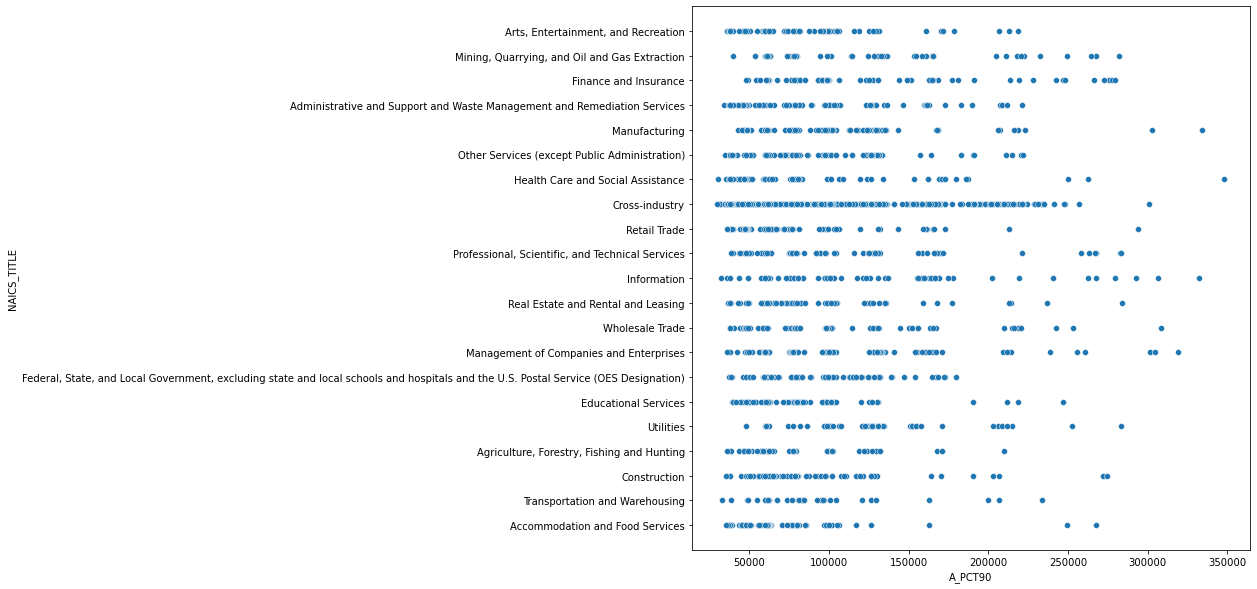

In [57]:
fig = plt.figure(figsize= (10, 10))
sns.scatterplot(y = 'NAICS_TITLE', x = 'A_PCT90', data = df_train)
plt.show()

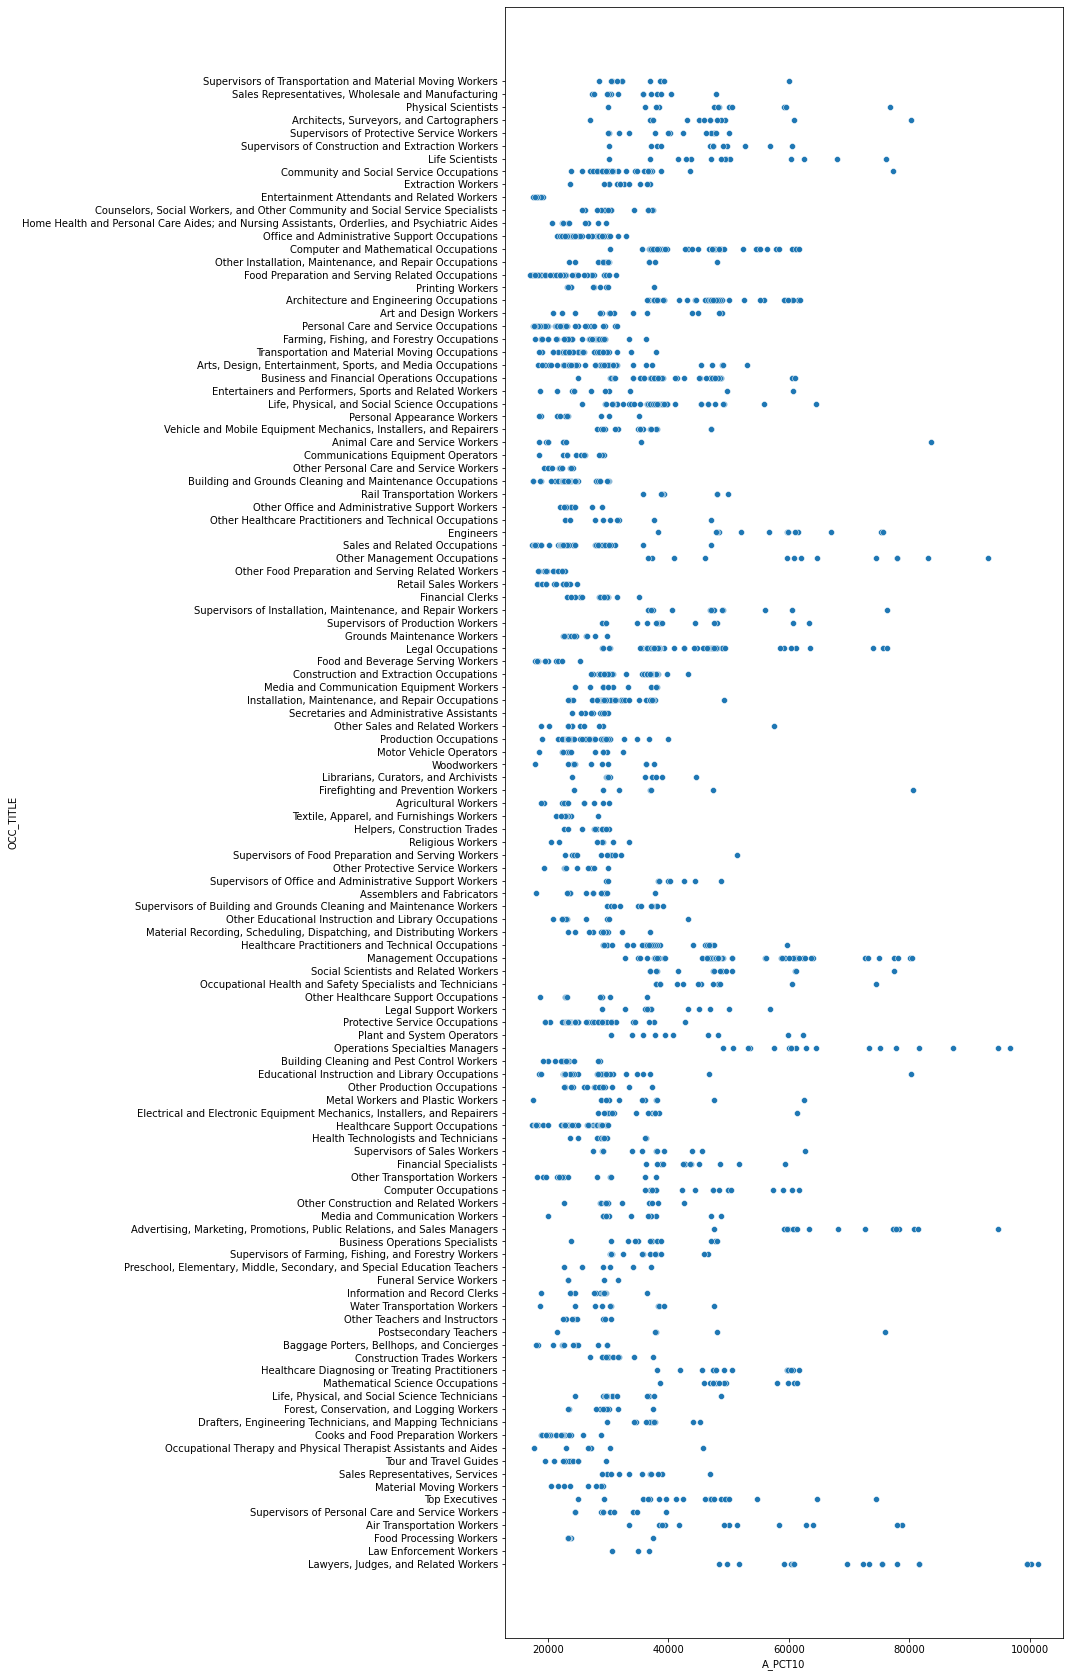

In [58]:
fig = plt.figure(figsize= (10, 30))
sns.scatterplot(y = 'OCC_TITLE', x = 'A_PCT10', data = df_train)
plt.show()

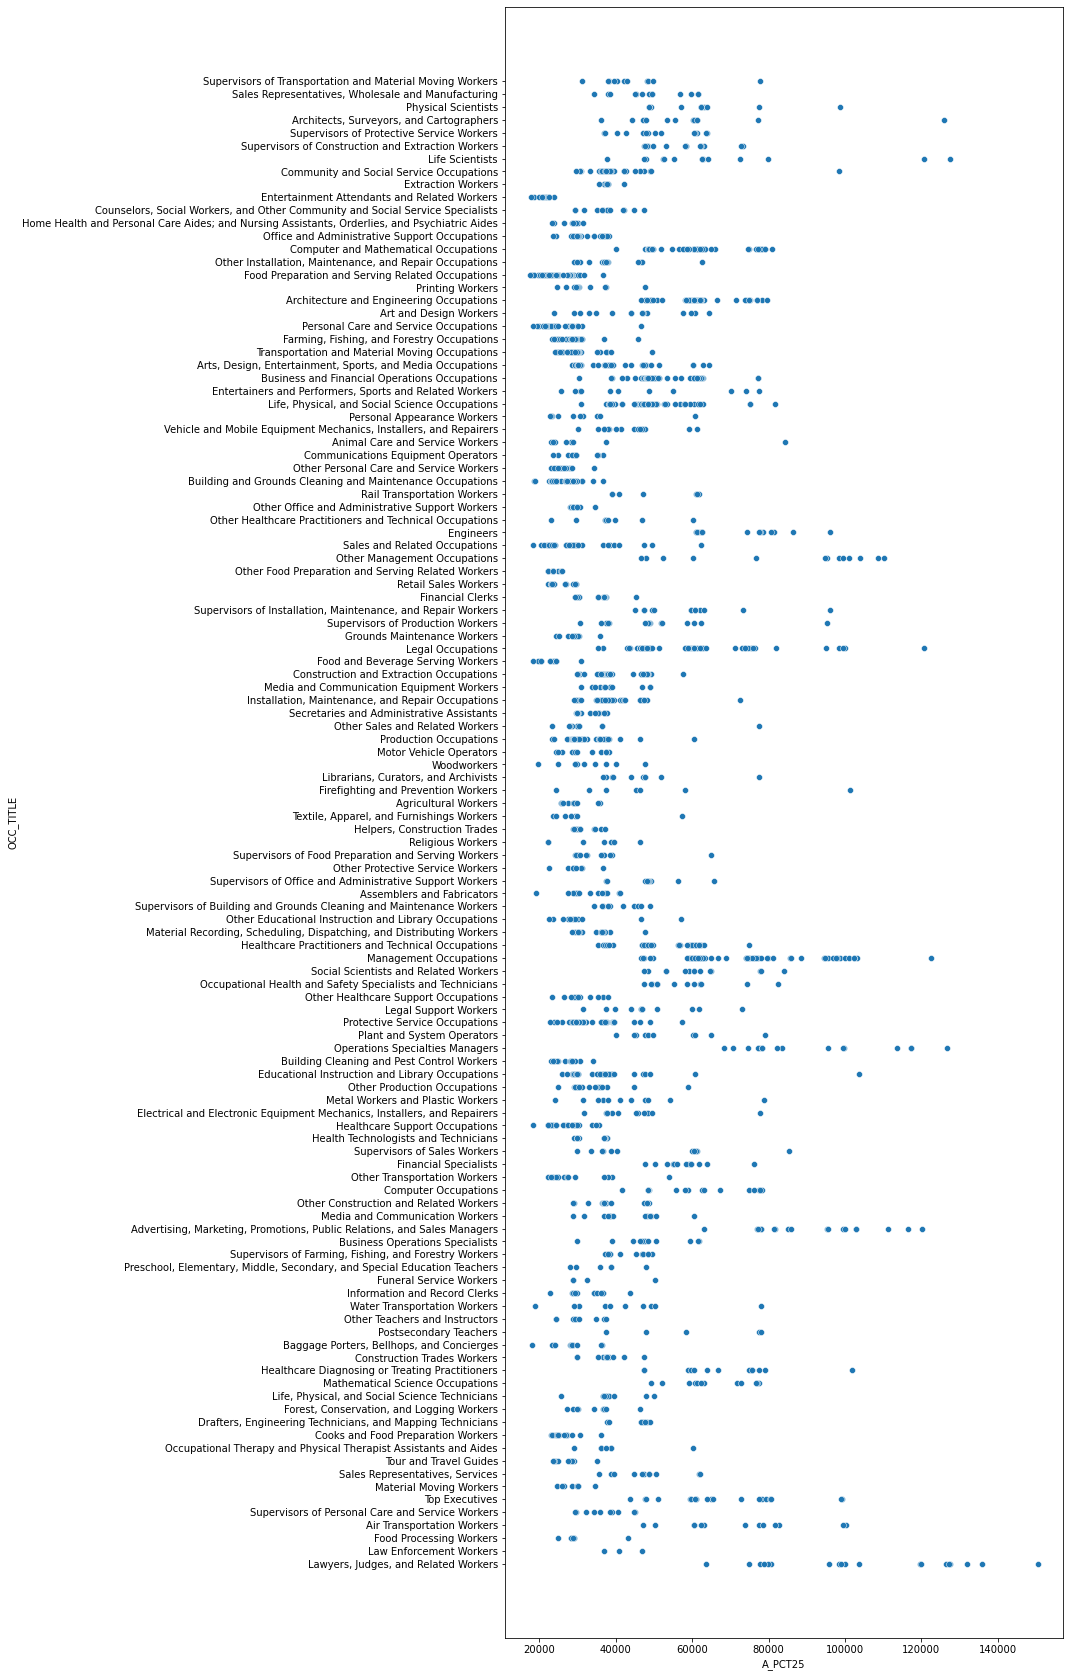

In [59]:
fig = plt.figure(figsize= (10, 30))
sns.scatterplot(y = 'OCC_TITLE', x = 'A_PCT25', data = df_train)
plt.show()

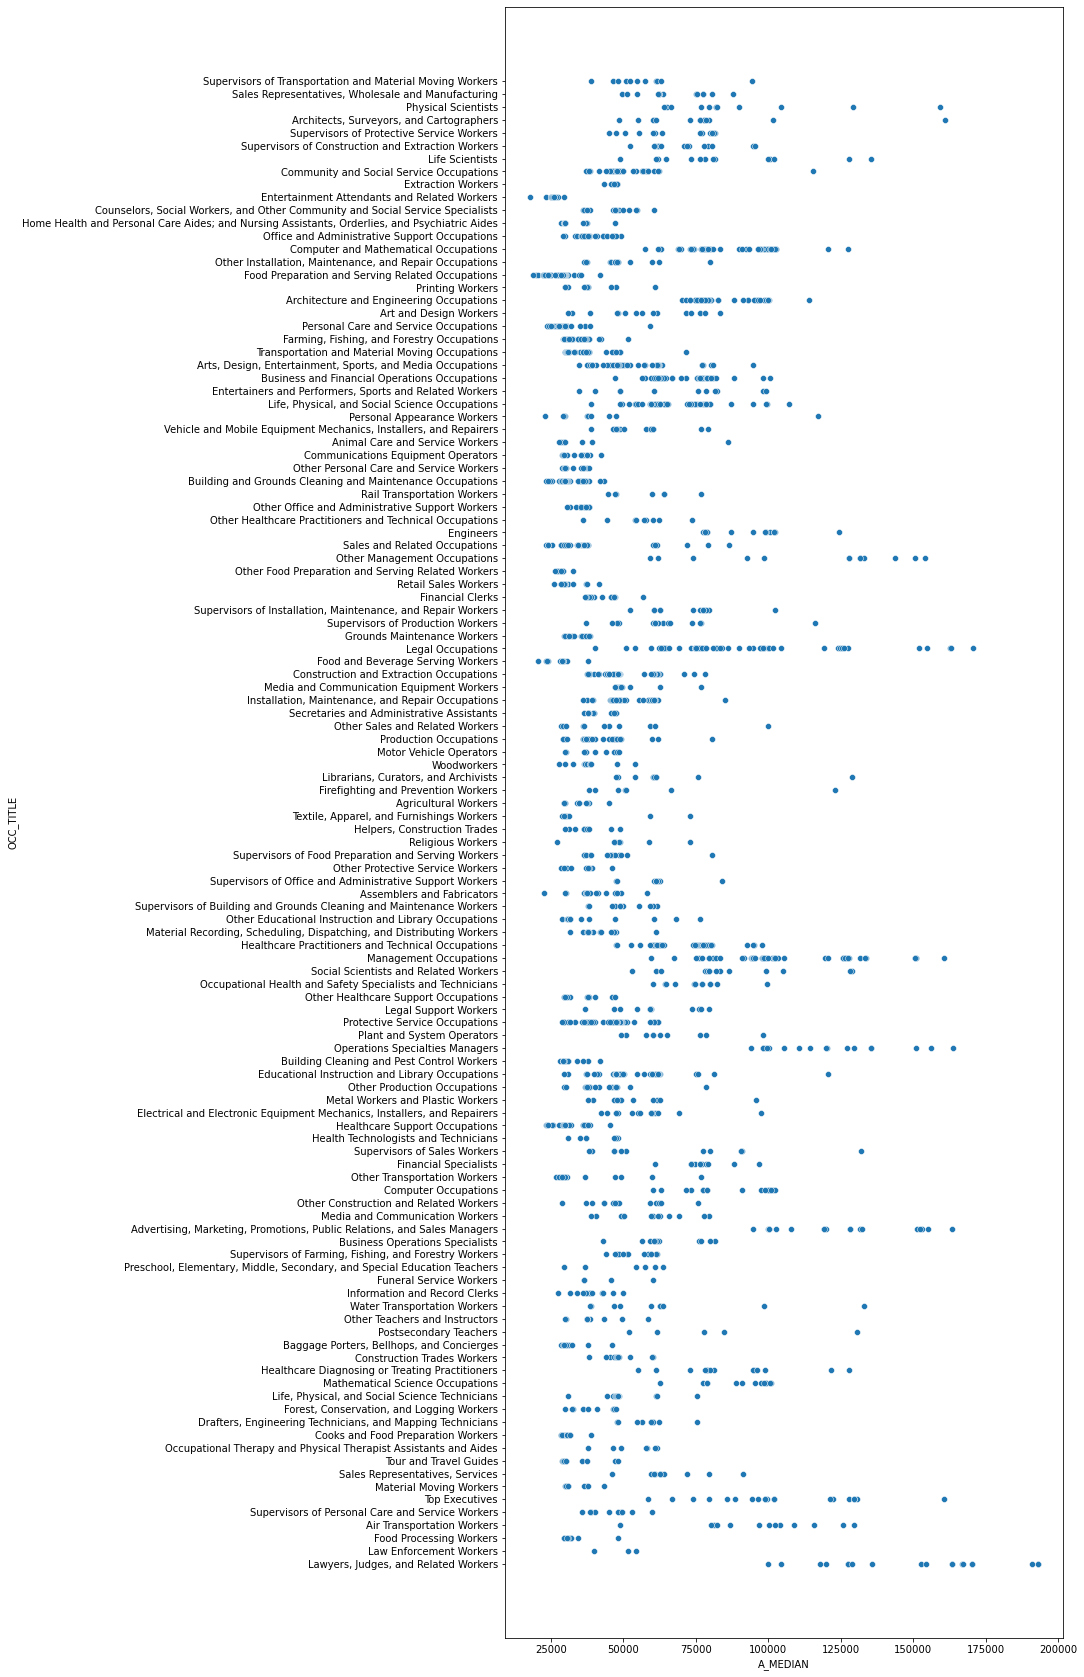

In [60]:
fig = plt.figure(figsize= (10, 30))
sns.scatterplot(y = 'OCC_TITLE', x = 'A_MEDIAN', data = df_train)
plt.show()

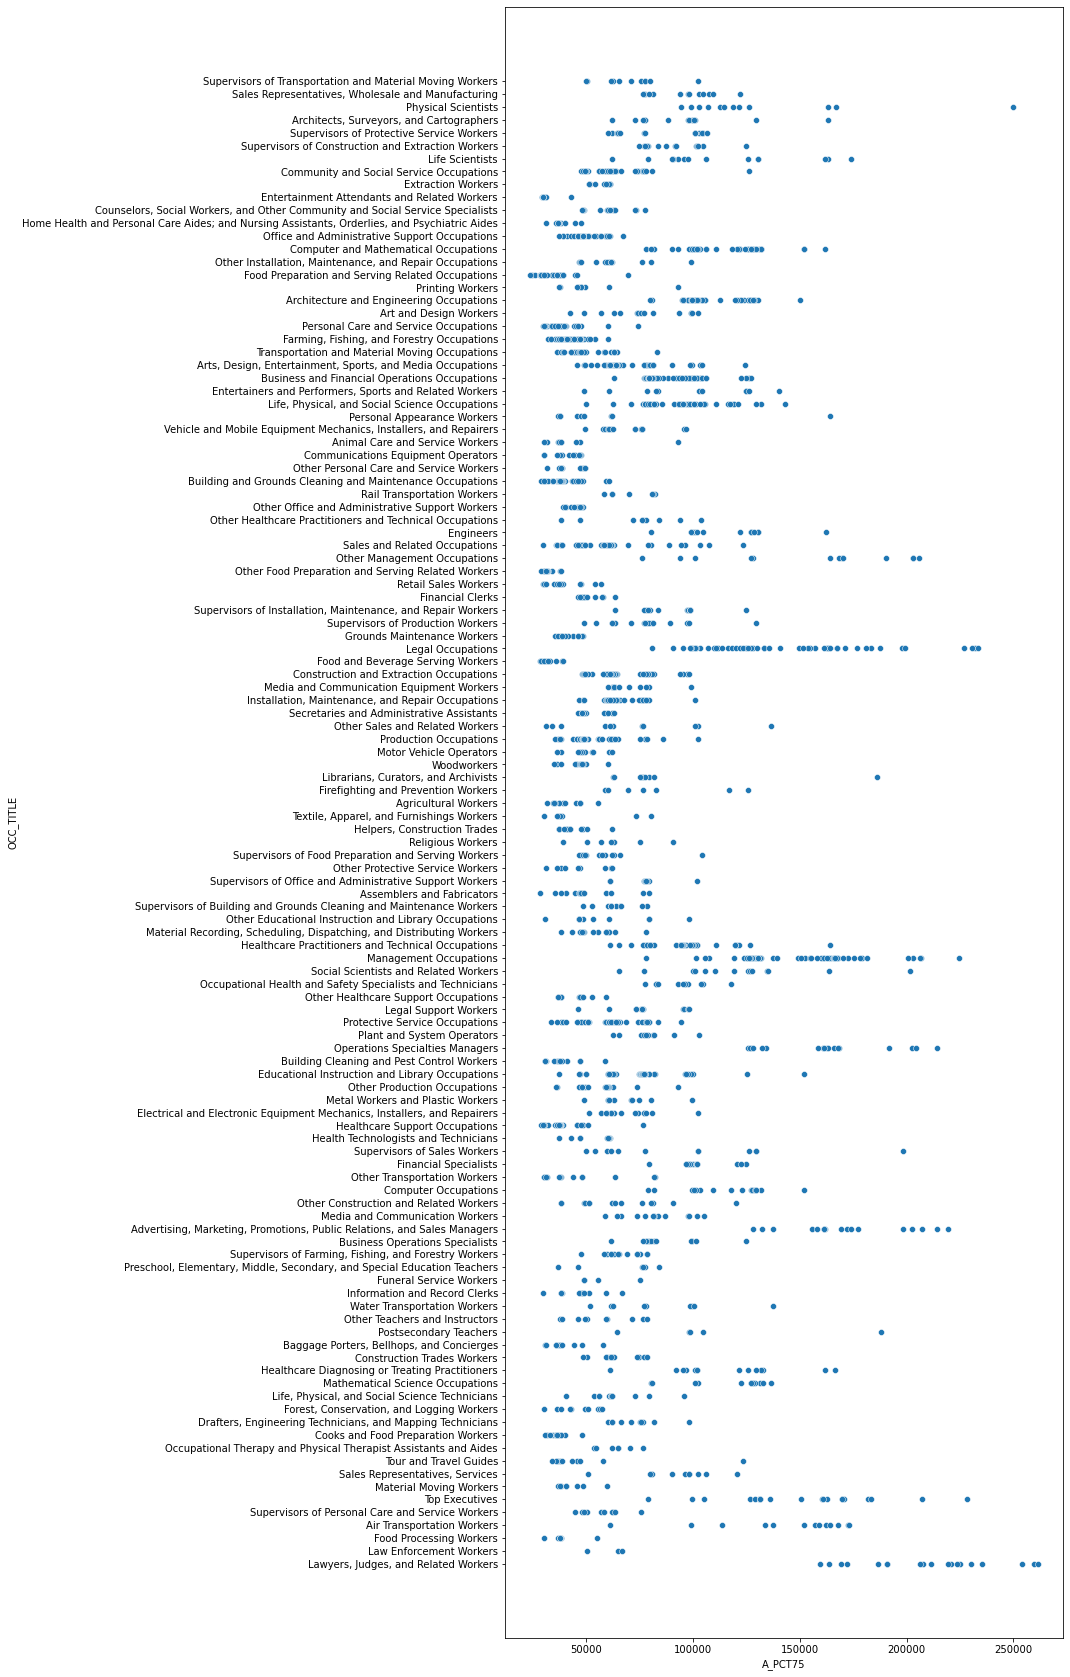

In [61]:
fig = plt.figure(figsize= (10, 30))
sns.scatterplot(y = 'OCC_TITLE', x = 'A_PCT75', data = df_train)
plt.show()

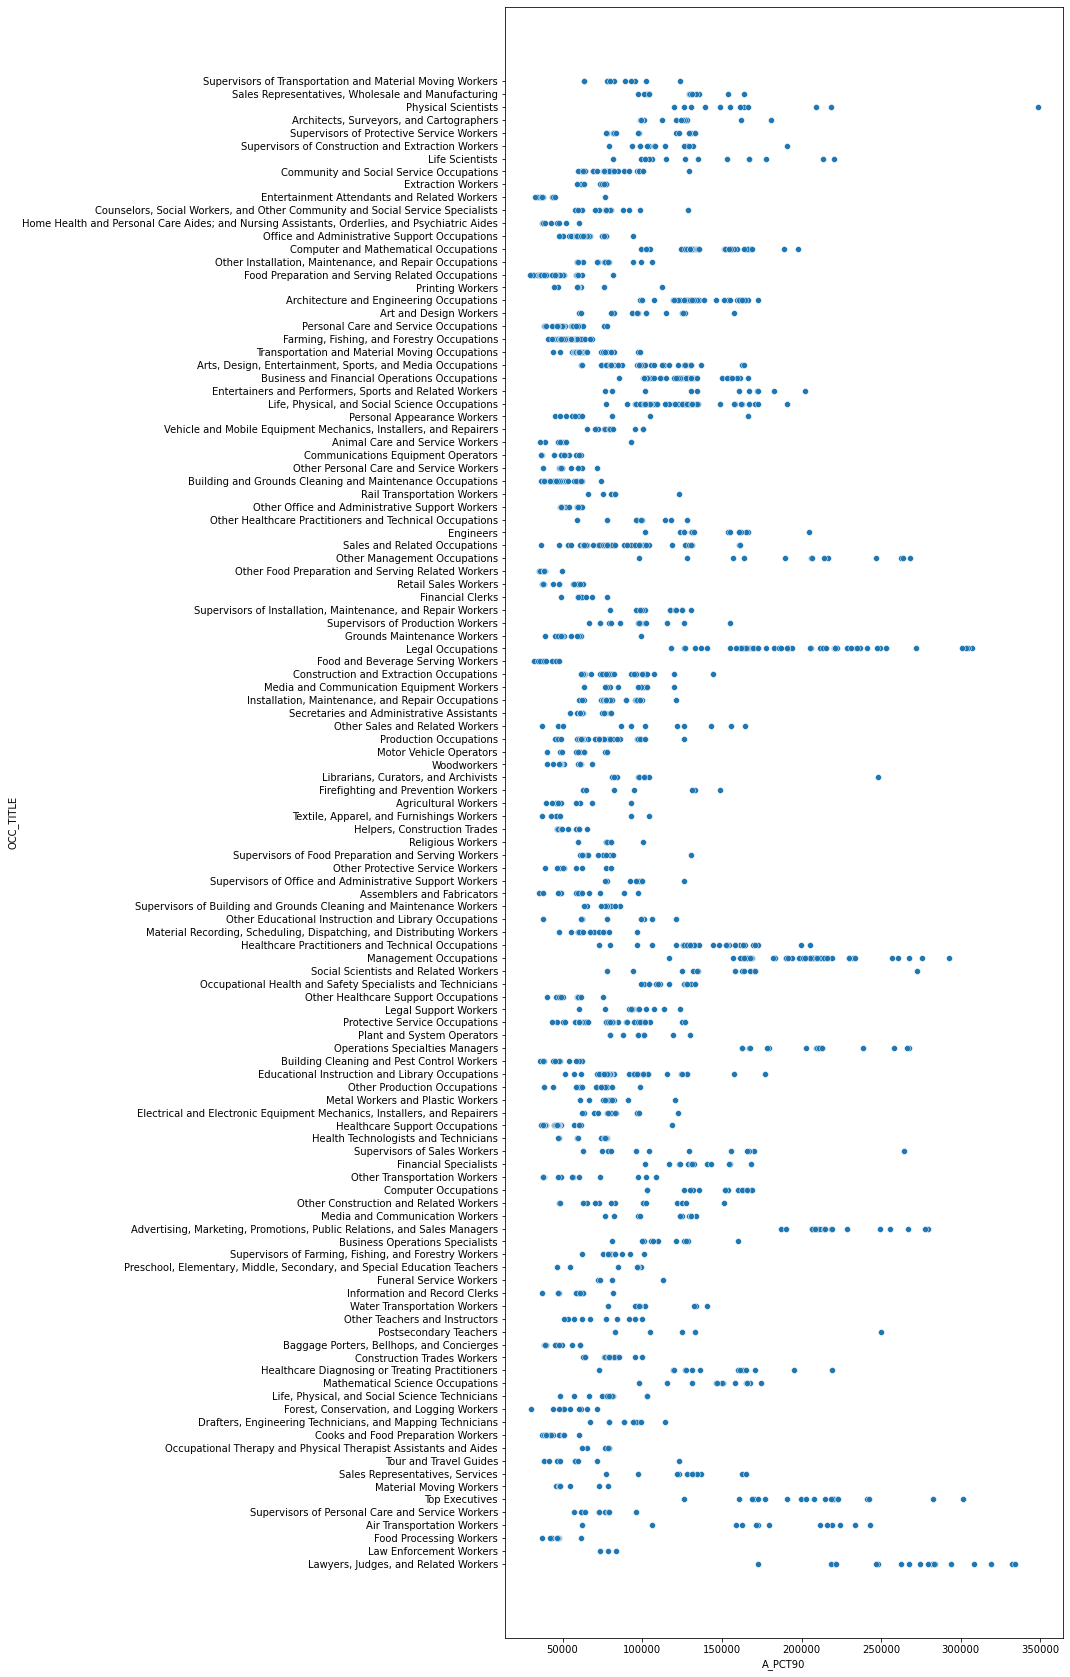

In [62]:
fig = plt.figure(figsize= (10, 30))
sns.scatterplot(y = 'OCC_TITLE', x = 'A_PCT90', data = df_train)
plt.show()

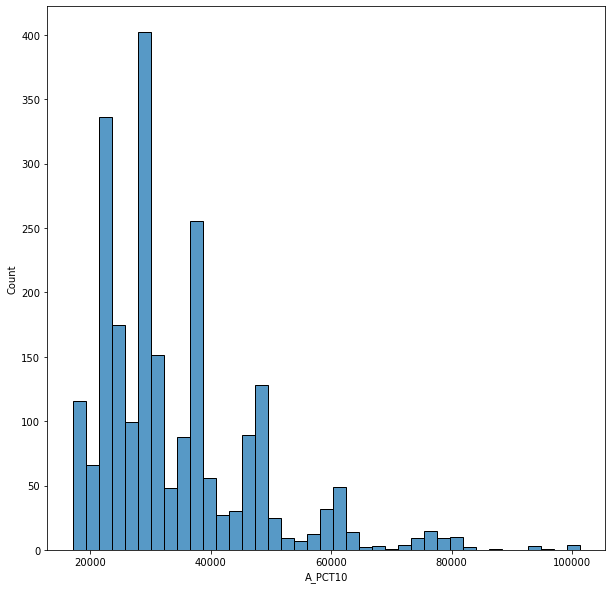

In [63]:
#Histplot
fig = plt.figure(figsize= (10, 10))
sns.histplot(x = df_train['A_PCT10'])
plt.show()

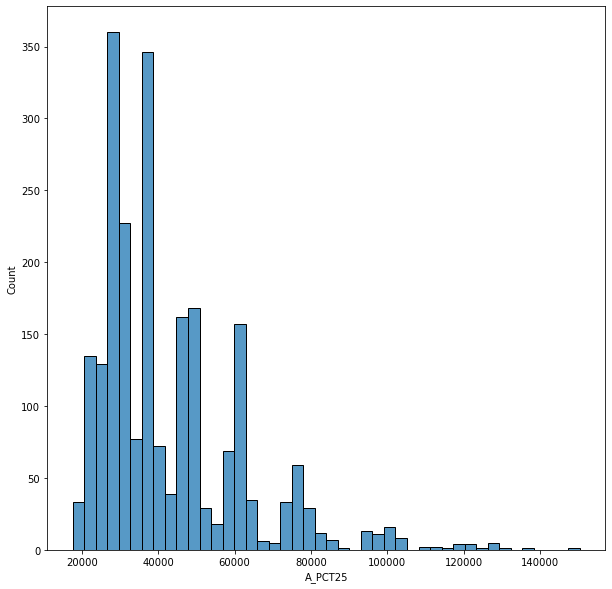

In [64]:
#Histplot
fig = plt.figure(figsize= (10, 10))
sns.histplot(x = df_train['A_PCT25'])
plt.show()

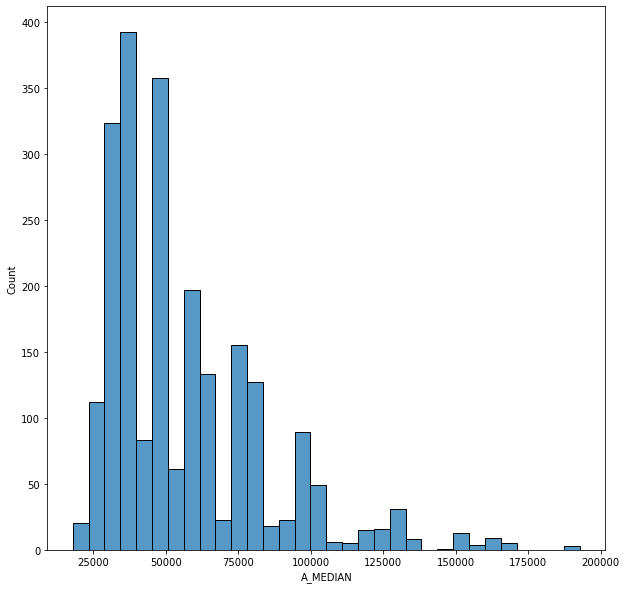

In [65]:
#Histplot
fig = plt.figure(figsize= (10, 10))
sns.histplot(x = df_train['A_MEDIAN'])
plt.show()

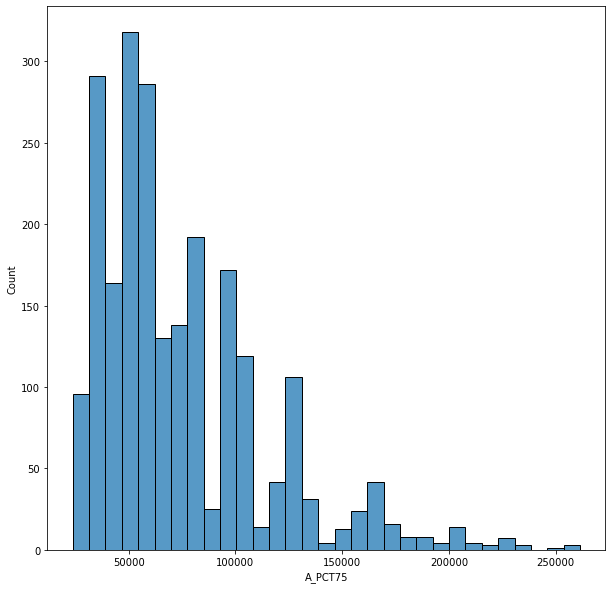

In [66]:
#Histplot
fig = plt.figure(figsize= (10, 10))
sns.histplot(x = df_train['A_PCT75'])
plt.show()

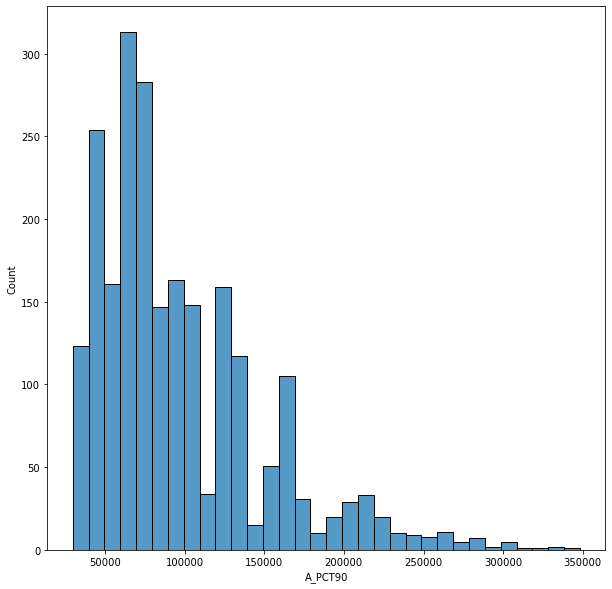

In [67]:
#Histplot
fig = plt.figure(figsize= (10, 10))
sns.histplot(x = df_train['A_PCT90'])
plt.show()

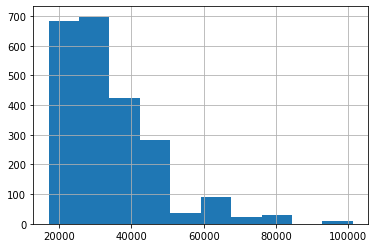

In [68]:
df_train['A_PCT10'].hist()
plt.show()

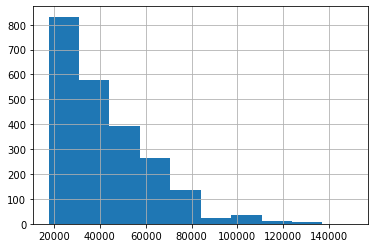

In [69]:
df_train['A_PCT25'].hist()
plt.show()

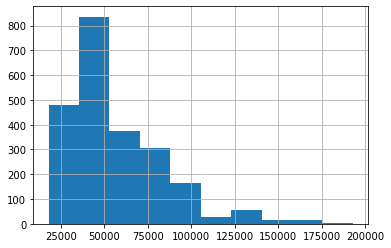

In [70]:
df_train['A_MEDIAN'].hist()
plt.show()

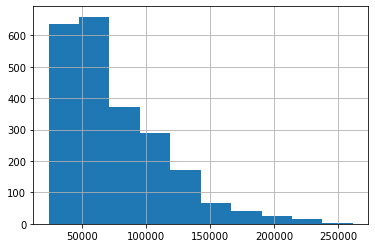

In [71]:
df_train['A_PCT75'].hist()
plt.show()

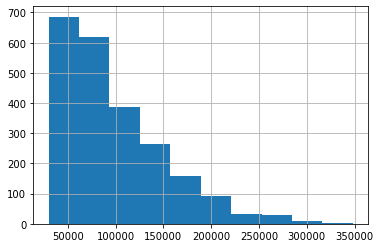

In [72]:
df_train['A_PCT90'].hist()
plt.show()

In [73]:
df_train[out_features].skew()

A_PCT10     1.578946
A_PCT25     1.577034
A_MEDIAN    1.470959
A_PCT75     1.451539
A_PCT90     1.410977
dtype: float64

In [74]:
df_train[df_train['A_PCT10'] == df_train['A_PCT10'].max()]

PRIM_STATE  NAICS_TITLE                             OCC_TITLE   A_PCT10  \
2181         US  Information  Lawyers, Judges, and Related Workers  101270.0   

       A_PCT25  A_MEDIAN        A_PCT75        A_PCT90  
2181  132010.0  191130.0  259640.397492  332224.501999

In [75]:
df_train[df_train['A_PCT25'] == df_train['A_PCT25'].max()]

PRIM_STATE                              NAICS_TITLE  \
2214         US  Management of Companies and Enterprises   

                                 OCC_TITLE   A_PCT10   A_PCT25  A_MEDIAN  \
2214  Lawyers, Judges, and Related Workers  100100.0  150400.0  192900.0   

            A_PCT75        A_PCT90  
2214  254235.387112  318989.756171

In [76]:
df_train[df_train['A_MEDIAN'] == df_train['A_MEDIAN'].max()]

PRIM_STATE                              NAICS_TITLE  \
2214         US  Management of Companies and Enterprises   
2241         US                            Manufacturing   

                                 OCC_TITLE   A_PCT10   A_PCT25  A_MEDIAN  \
2214  Lawyers, Judges, and Related Workers  100100.0  150400.0  192900.0   
2241  Lawyers, Judges, and Related Workers   99510.0  135720.0  192900.0   

            A_PCT75        A_PCT90  
2214  254235.387112  318989.756171  
2241  261378.428542  333896.386919

In [77]:
df_train[df_train['A_PCT75'] == df_train['A_PCT75'].max()]

PRIM_STATE    NAICS_TITLE                             OCC_TITLE  A_PCT10  \
2241         US  Manufacturing  Lawyers, Judges, and Related Workers  99510.0   

       A_PCT25  A_MEDIAN        A_PCT75        A_PCT90  
2241  135720.0  192900.0  261378.428542  333896.386919

In [78]:
df_train[df_train['A_PCT90'] == df_train['A_PCT90'].max()]

PRIM_STATE                        NAICS_TITLE            OCC_TITLE  \
2223         US  Health Care and Social Assistance  Physical Scientists   

      A_PCT10  A_PCT25  A_MEDIAN        A_PCT75        A_PCT90  
2223  29890.0  62260.0  159120.0  249977.661433  348227.843242

* A_PCT10, A_PCT25 have skew value slightly more than 1 which means they are highly skewed(right skewed). To avoid this we do normalization.
Plots show that there are few outliers, but this according to the salary estimation we can think them as valid data and not handle them.

* 25th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Management of Companies and Enterprises industry across the data aggregated data of all the states in US.

* 50th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Management of Companies and Enterprises and Manufacturing industries equally across the aggregated data of all the states in US.

* 75th percentile of the annual base salary is highly earned by Lawyers, Judges, and Related workers occupation in Manufacturing industry across the aggregated data of all the states in US.

* 90th percentile of the annual base salary is highly earned by Physical Scientists occupation in the HealthCare and Social Assistance Industry across the aggregated data of all the states in US.

# Feature Engineering

We have 3 input features. They all are categorical features. Let's convert them into numerical features for our model. Initially my plan was to use one-hot encoding, tf-idf vectorization and target encoding. But after experimentation I skipped target encoding due to target leakage issues and final predictions obtained on test data are almost same. 

Our Proposed feature engineering technique is to use(after experiments and checking with Cross validation score) TF-IDF and One-Hot-Encoding:

1. TF-IDF Vectorization on the column "text" obtained by merging all the inp_features with max_features = 500 and removing few stop words. I have included only few stopwords, few more words like "occupations", "workers" can also be added to stopwords list. Removing them might improve the final model results.
2. One-Hot Encoding on inp_features.
3. Leave-one-out Target encoding on each of the target feature(out_feature) to obtain new 3*5 features. This somehow I'm getting same predictions on test data and as target encoding is prone to target leakage, I just used to experiment and see the results. It showed improvement in the Mean CV score, but due to generalization issues, I've skipped this. 


In [79]:
# Train data shape
df_train.shape

(2278, 8)

In [80]:
# Test data shape
submn.shape

(926, 8)

In [81]:
# no. of rows of resulting data after concat
df_train.shape[0] + submn.shape[0]

3204

In [82]:
# Lets concat the both train and test data to do our feature engineering
df_all = pd.concat([df_train, submn], axis = 0)
df_all

PRIM_STATE                                        NAICS_TITLE  \
0           US                Arts, Entertainment, and Recreation   
1           US      Mining, Quarrying, and Oil and Gas Extraction   
2           US                              Finance and Insurance   
3           US  Administrative and Support and Waste Managemen...   
4           US                                      Manufacturing   
..         ...                                                ...   
921         US                                          Utilities   
922         US                Arts, Entertainment, and Recreation   
923         WI                                     Cross-industry   
924         PA                                     Cross-industry   
925         US                                       Construction   

                                             OCC_TITLE  A_PCT10  A_PCT25  \
0    Supervisors of Transportation and Material Mov...  32350.0  40200.0   
1    Sales Representatives, Wholesale and Manufactu...  47860.0  61600.0   
2                                  Physical Scientists  59240.0  63050.0   
3             Architects, Surveyors, and Cartographers  37320.0  47630.0   
4            Supervisors of Protective Service Workers  50130.0  63840.0   
..                                                 ...      ...      ...   
921  Other Educational Instruction and Library Occu...  10000.0  20000.0   
922           Community and Social Service Occupations  10000.0  20000.0   
923  Arts, Design, Entertainment, Sports, and Media...  10000.0  20000.0   
924              Computer and Mathematical Occupations  10000.0  20000.0   
925                   Other Protective Service Workers  10000.0  20000.0   

     A_MEDIAN   A_PCT75   A_PCT90  
0     50790.0   62560.0   78520.0  
1     87810.0  107460.0  153600.0  
2     89740.0  126320.0  149070.0  
3     60550.0   77450.0   98990.0  
4     81770.0  104530.0  133180.0  
..        ...       ...       ...  
921   30000.0   40000.0   50000.0  
922   30000.0   40000.0   50000.0  
923   30000.0   40000.0   50000.0  
924   30000.0   40000.0   50000.0  
925   30000.0   40000.0   50000.0  

[3204 rows x 8 columns]

# TF-IDF Vectorization

In [83]:
# Merge inp_features and get a new feature
df_all['text'] = df_all['PRIM_STATE'] + ' ' + df_all['NAICS_TITLE'] + ' ' + df_all['OCC_TITLE']

In [84]:
df_all

PRIM_STATE                                        NAICS_TITLE  \
0           US                Arts, Entertainment, and Recreation   
1           US      Mining, Quarrying, and Oil and Gas Extraction   
2           US                              Finance and Insurance   
3           US  Administrative and Support and Waste Managemen...   
4           US                                      Manufacturing   
..         ...                                                ...   
921         US                                          Utilities   
922         US                Arts, Entertainment, and Recreation   
923         WI                                     Cross-industry   
924         PA                                     Cross-industry   
925         US                                       Construction   

                                             OCC_TITLE  A_PCT10  A_PCT25  \
0    Supervisors of Transportation and Material Mov...  32350.0  40200.0   
1    Sales Representatives, Wholesale and Manufactu...  47860.0  61600.0   
2                                  Physical Scientists  59240.0  63050.0   
3             Architects, Surveyors, and Cartographers  37320.0  47630.0   
4            Supervisors of Protective Service Workers  50130.0  63840.0   
..                                                 ...      ...      ...   
921  Other Educational Instruction and Library Occu...  10000.0  20000.0   
922           Community and Social Service Occupations  10000.0  20000.0   
923  Arts, Design, Entertainment, Sports, and Media...  10000.0  20000.0   
924              Computer and Mathematical Occupations  10000.0  20000.0   
925                   Other Protective Service Workers  10000.0  20000.0   

     A_MEDIAN   A_PCT75   A_PCT90  \
0     50790.0   62560.0   78520.0   
1     87810.0  107460.0  153600.0   
2     89740.0  126320.0  149070.0   
3     60550.0   77450.0   98990.0   
4     81770.0  104530.0  133180.0   
..        ...       ...       ...   
921   30000.0   40000.0   50000.0   
922   30000.0   40000.0   50000.0   
923   30000.0   40000.0   50000.0   
924   30000.0   40000.0   50000.0   
925   30000.0   40000.0   50000.0   

                                                  text  
0    US Arts, Entertainment, and Recreation Supervi...  
1    US Mining, Quarrying, and Oil and Gas Extracti...  
2         US Finance and Insurance Physical Scientists  
3    US Administrative and Support and Waste Manage...  
4    US Manufacturing Supervisors of Protective Ser...  
..                                                 ...  
921  US Utilities Other Educational Instruction and...  
922  US Arts, Entertainment, and Recreation Communi...  
923  WI Cross-industry Arts, Design, Entertainment,...  
924  PA Cross-industry Computer and Mathematical Oc...  
925   US Construction Other Protective Service Workers  

[3204 rows x 9 columns]

In [85]:
# Declaring words that are not needed and needs to be removed
stopwords = [',', 'and', 'of', 'in', 'moving']

# Applying tf-idf vectorization
tfidf = TfidfVectorizer(ngram_range = (1,3), max_features = 500, stop_words = stopwords)
t = tfidf.fit_transform(df_all['text'])
df = pd.DataFrame(t.toarray(), index = range(0,df_all.shape[0]), columns = tfidf.get_feature_names_out())

In [86]:
# Dropping 'text' column and obtaining the tf-idf features 
df_all.reset_index(drop = True, inplace =True)
df.reset_index(drop = True, inplace = True)

df_all.drop(['text'], axis = 1, inplace = True)
df_all = pd.concat([df_all, df], axis = 1)
df_all

PRIM_STATE                                        NAICS_TITLE  \
0            US                Arts, Entertainment, and Recreation   
1            US      Mining, Quarrying, and Oil and Gas Extraction   
2            US                              Finance and Insurance   
3            US  Administrative and Support and Waste Managemen...   
4            US                                      Manufacturing   
...         ...                                                ...   
3199         US                                          Utilities   
3200         US                Arts, Entertainment, and Recreation   
3201         WI                                     Cross-industry   
3202         PA                                     Cross-industry   
3203         US                                       Construction   

                                              OCC_TITLE  A_PCT10  A_PCT25  \
0     Supervisors of Transportation and Material Mov...  32350.0  40200.0   
1     Sales Representatives, Wholesale and Manufactu...  47860.0  61600.0   
2                                   Physical Scientists  59240.0  63050.0   
3              Architects, Surveyors, and Cartographers  37320.0  47630.0   
4             Supervisors of Protective Service Workers  50130.0  63840.0   
...                                                 ...      ...      ...   
3199  Other Educational Instruction and Library Occu...  10000.0  20000.0   
3200           Community and Social Service Occupations  10000.0  20000.0   
3201  Arts, Design, Entertainment, Sports, and Media...  10000.0  20000.0   
3202              Computer and Mathematical Occupations  10000.0  20000.0   
3203                   Other Protective Service Workers  10000.0  20000.0   

      A_MEDIAN   A_PCT75   A_PCT90  accommodation  accommodation food  ...  \
0      50790.0   62560.0   78520.0            0.0                 0.0  ...   
1      87810.0  107460.0  153600.0            0.0                 0.0  ...   
2      89740.0  126320.0  149070.0            0.0                 0.0  ...   
3      60550.0   77450.0   98990.0            0.0                 0.0  ...   
4      81770.0  104530.0  133180.0            0.0                 0.0  ...   
...        ...       ...       ...            ...                 ...  ...   
3199   30000.0   40000.0   50000.0            0.0                 0.0  ...   
3200   30000.0   40000.0   50000.0            0.0                 0.0  ...   
3201   30000.0   40000.0   50000.0            0.0                 0.0  ...   
3202   30000.0   40000.0   50000.0            0.0                 0.0  ...   
3203   30000.0   40000.0   50000.0            0.0                 0.0  ...   

      wholesale  wholesale trade        wi  wi cross  wi cross industry  \
0      0.000000              0.0  0.000000  0.000000           0.000000   
1      0.206815              0.0  0.000000  0.000000           0.000000   
2      0.000000              0.0  0.000000  0.000000           0.000000   
3      0.000000              0.0  0.000000  0.000000           0.000000   
4      0.000000              0.0  0.000000  0.000000           0.000000   
...         ...              ...       ...       ...                ...   
3199   0.000000              0.0  0.000000  0.000000           0.000000   
3200   0.000000              0.0  0.000000  0.000000           0.000000   
3201   0.000000              0.0  0.266714  0.266714           0.266714   
3202   0.000000              0.0  0.000000  0.000000           0.000000   
3203   0.000000              0.0  0.000000  0.000000           0.000000   

       workers   wv  wv cross  wv cross industry   wy  
0     0.146143  0.0       0.0                0.0  0.0  
1     0.000000  0.0       0.0                0.0  0.0  
2     0.000000  0.0       0.0                0.0  0.0  
3     0.000000  0.0       0.0                0.0  0.0  
4     0.183515  0.0       0.0                0.0  0.0  
...        ...  ...       ...                ...  ...  
3199  0.0

In [87]:
# statistics of data
df_all.describe()

A_PCT10        A_PCT25       A_MEDIAN        A_PCT75  \
count    3204.000000    3204.000000    3204.000000    3204.000000   
mean    27010.003121   36261.304619   48774.563046   64764.011499   
std     15451.609536   19008.344454   26196.018071   36740.394217   
min     10000.000000   17620.000000   17940.000000   23780.000000   
25%     10000.000000   20000.000000   30000.000000   40000.000000   
50%     25270.000000   29785.000000   37570.000000   47905.000000   
75%     36450.000000   46792.500000   60550.000000   78510.000000   
max    101270.000000  150400.000000  192900.000000  261378.428542   

             A_PCT90  accommodation  accommodation food  \
count    3204.000000    3204.000000         3204.000000   
mean    83414.766229       0.008875            0.008875   
std     49025.435235       0.051014            0.051014   
min     29740.000000       0.000000            0.000000   
25%     50000.000000       0.000000            0.000000   
50%     61345.000000       0.000000            0.000000   
75%    100722.500000       0.000000            0.000000   
max    348227.843242       0.375215            0.375215   

       accommodation food services  administration  administrative  ...  \
count                  3204.000000     3204.000000     3204.000000  ...   
mean                      0.008875        0.008669        0.015945  ...   
std                       0.051014        0.045160        0.056755  ...   
min                       0.000000        0.000000        0.000000  ...   
25%                       0.000000        0.000000        0.000000  ...   
50%                       0.000000        0.000000        0.000000  ...   
75%                       0.000000        0.000000        0.000000  ...   
max                       0.375215        0.277671        0.409533  ...   

         wholesale  wholesale trade           wi     wi cross  \
count  3204.000000      3204.000000  3204.000000  3204.000000   
mean      0.012615         0.011367     0.002275     0.002275   
std       0.063696         0.062178     0.027489     0.027489   
min       0.000000         0.000000     0.000000     0.000000   
25%       0.000000         0.000000     0.000000     0.000000   
50%       0.000000         0.000000     0.000000     0.000000   
75%       0.000000         0.000000     0.000000     0.000000   
max       0.552720         0.459091     0.391586     0.391586   

       wi cross industry      workers           wv     wv cross  \
count        3204.000000  3204.000000  3204.000000  3204.000000   
mean            0.002275     0.046522     0.002275     0.002275   
std             0.027489     0.082728     0.027489     0.027489   
min             0.000000     0.000000     0.000000     0.000000   
25%             0.000000     0.000000     0.000000     0.000000   
50%             0.000000     0.000000     0.000000     0.000000   
75%             0.000000     0.113230     0.000000     0.000000   
max             0.391586     0.612373     0.391586     0.391586   

       wv cross industry           wy  
count        3204.000000  3204.000000  
mean            0.002275     0.002588  
std             0.027489     0.031366  
min             0.000000     0.000000  
25%             0.000000     0.000000  
50%             0.000000     0.000000  
75%             0.000000     0.000000  
max             0.391586     0.470285  

[8 rows x 505 columns]

In [88]:
# Printing value counts of data
# for i in list(df_all.columns):
#     print(df_all[i].value_counts())

# Leave-one-out Target Encoding(I Commented this section as this is part of experimentation and as a result I'm not using it in proposed model.)

We have to be careful here with df_all as we have some random values in submission file which we need to predict and not use here. Also, we need to convert those test features as well from the target values from training data.

In [89]:
# Lets use targets values only for the range of train data
# loo_df = df_all.iloc[:df_train.shape[0], ]
# loo_df

In [90]:
# get a new dataframe for test data to create new features based on leave-one-out-encoding
# te_loo = df_all.iloc[df_train.shape[0]:, ]
# te_loo.reset_index(drop = True, inplace = True)
# te_loo

In [91]:
# call leaveoneout encoder
# LOO_encoder = LeaveOneOutEncoder()

# # Get new features
# for i in inp_features:
#     for j in out_features:
#         LOO_encoder.fit(loo_df[i], loo_df[j])
#         l = LOO_encoder.transform(loo_df[i])
#         k = LOO_encoder.transform(te_loo[i])
#         loo_df[i + '_' + j] = l[i]
#         te_loo[i + '_' + j] = k[i]

In [92]:
# loo_df

In [93]:
# te_loo

# One-Hot Encoding

In [94]:
# Combining train and test data to get one hot encoding features
# tr_te = pd.concat([loo_df, te_loo], axis = 0)
tr_te = df_all.copy()
tr_te.reset_index(drop = True, inplace = True)

In [95]:
tr_te = pd.get_dummies(tr_te, columns = inp_features, drop_first = True)

In [96]:
tr_te

A_PCT10  A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  accommodation  \
0     32350.0  40200.0   50790.0   62560.0   78520.0            0.0   
1     47860.0  61600.0   87810.0  107460.0  153600.0            0.0   
2     59240.0  63050.0   89740.0  126320.0  149070.0            0.0   
3     37320.0  47630.0   60550.0   77450.0   98990.0            0.0   
4     50130.0  63840.0   81770.0  104530.0  133180.0            0.0   
...       ...      ...       ...       ...       ...            ...   
3199  10000.0  20000.0   30000.0   40000.0   50000.0            0.0   
3200  10000.0  20000.0   30000.0   40000.0   50000.0            0.0   
3201  10000.0  20000.0   30000.0   40000.0   50000.0            0.0   
3202  10000.0  20000.0   30000.0   40000.0   50000.0            0.0   
3203  10000.0  20000.0   30000.0   40000.0   50000.0            0.0   

      accommodation food  accommodation food services  administration  \
0                    0.0                          0.0             0.0   
1                    0.0                          0.0             0.0   
2                    0.0                          0.0             0.0   
3                    0.0                          0.0             0.0   
4                    0.0                          0.0             0.0   
...                  ...                          ...             ...   
3199                 0.0                          0.0             0.0   
3200                 0.0                          0.0             0.0   
3201                 0.0                          0.0             0.0   
3202                 0.0                          0.0             0.0   
3203                 0.0                          0.0             0.0   

      administrative  ...  \
0           0.000000  ...   
1           0.000000  ...   
2           0.000000  ...   
3           0.212328  ...   
4           0.000000  ...   
...              ...  ...   
3199        0.000000  ...   
3200        0.000000  ...   
3201        0.000000  ...   
3202        0.000000  ...   
3203        0.000000  ...   

      OCC_TITLE_Supervisors of Protective Service Workers  \
0                                                     0     
1                                                     0     
2                                                     0     
3                                                     0     
4                                                     1     
...                                                 ...     
3199                                                  0     
3200                                                  0     
3201                                                  0     
3202                                                  0     
3203                                                  0     

      OCC_TITLE_Supervisors of Sales Workers  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
3199                                       0   
3200                                       0   
3201                                       0   
3202                                       0   
3203                                       0   

      OCC_TITLE_Supervisors of Transportation and Material Moving Workers  \
0                                                     1                     
1                                                     0                     
2                                                     0                     
3                                                     0                     
4                                                     0                     
...                                                 ...                     
3199                                                  0                     
3

# Model Building

In [97]:
# Splitting into train and test data
# tr = tr_te.iloc[:loo_df.shape[0], ]
# te = tr_te.iloc[loo_df.shape[0]:, ]
tr = tr_te.iloc[:df_train.shape[0],]
te = tr_te.iloc[df_train.shape[0]:,]

In [98]:
tr

A_PCT10  A_PCT25  A_MEDIAN        A_PCT75        A_PCT90  accommodation  \
0     32350.0  40200.0   50790.0   62560.000000   78520.000000            0.0   
1     47860.0  61600.0   87810.0  107460.000000  153600.000000            0.0   
2     59240.0  63050.0   89740.0  126320.000000  149070.000000            0.0   
3     37320.0  47630.0   60550.0   77450.000000   98990.000000            0.0   
4     50130.0  63840.0   81770.0  104530.000000  133180.000000            0.0   
...       ...      ...       ...            ...            ...            ...   
2273  47950.0  73720.0  101550.0  163990.000000  221987.370009            0.0   
2274  47580.0  75920.0  126220.0  181113.833669  241003.537454            0.0   
2275  46400.0  60560.0   98070.0  161120.000000  221224.046813            0.0   
2276  37540.0  51260.0   80850.0  135490.000000  187408.262837            0.0   
2277  46750.0  61680.0   80130.0  119690.000000  158346.820675            0.0   

      accommodation food  accommodation food services  administration  \
0                    0.0                          0.0             0.0   
1                    0.0                          0.0             0.0   
2                    0.0                          0.0             0.0   
3                    0.0                          0.0             0.0   
4                    0.0                          0.0             0.0   
...                  ...                          ...             ...   
2273                 0.0                          0.0             0.0   
2274                 0.0                          0.0             0.0   
2275                 0.0                          0.0             0.0   
2276                 0.0                          0.0             0.0   
2277                 0.0                          0.0             0.0   

      administrative  ...  \
0           0.000000  ...   
1           0.000000  ...   
2           0.000000  ...   
3           0.212328  ...   
4           0.000000  ...   
...              ...  ...   
2273        0.000000  ...   
2274        0.000000  ...   
2275        0.000000  ...   
2276        0.000000  ...   
2277        0.000000  ...   

      OCC_TITLE_Supervisors of Protective Service Workers  \
0                                                     0     
1                                                     0     
2                                                     0     
3                                                     0     
4                                                     1     
...                                                 ...     
2273                                                  0     
2274                                                  0     
2275                                                  0     
2276                                                  0     
2277                                                  0     

      OCC_TITLE_Supervisors of Sales Workers  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
2273                                       0   
2274                                       0   
2275                                       0   
2276                                       0   
2277                                       0   

      OCC_TITLE_Supervisors of Transportation and Material Moving Workers  \
0                                                     1                     
1                                                     0                     
2                                                     0                     
3                                                     0                     
4                                                     0                     
...                                

In [99]:
te.reset_index(drop = True, inplace = True)
te

A_PCT10  A_PCT25  A_MEDIAN  A_PCT75  A_PCT90  accommodation  \
0    10000.0  20000.0   30000.0  40000.0  50000.0       0.302437   
1    10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
2    10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
3    10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
4    10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
..       ...      ...       ...      ...      ...            ...   
921  10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
922  10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
923  10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
924  10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   
925  10000.0  20000.0   30000.0  40000.0  50000.0       0.000000   

     accommodation food  accommodation food services  administration  \
0              0.302437                     0.302437        0.000000   
1              0.000000                     0.000000        0.000000   
2              0.000000                     0.000000        0.000000   
3              0.000000                     0.000000        0.000000   
4              0.000000                     0.000000        0.200603   
..                  ...                          ...             ...   
921            0.000000                     0.000000        0.000000   
922            0.000000                     0.000000        0.000000   
923            0.000000                     0.000000        0.000000   
924            0.000000                     0.000000        0.000000   
925            0.000000                     0.000000        0.000000   

     administrative  ...  OCC_TITLE_Supervisors of Protective Service Workers  \
0               0.0  ...                                                  0     
1               0.0  ...                                                  0     
2               0.0  ...                                                  0     
3               0.0  ...                                                  0     
4               0.0  ...                                                  0     
..              ...  ...                                                ...     
921             0.0  ...                                                  0     
922             0.0  ...                                                  0     
923             0.0  ...                                                  0     
924             0.0  ...                                                  0     
925             0.0  ...                                                  0     

     OCC_TITLE_Supervisors of Sales Workers  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
921                                       0   
922                                       0   
923                                       0   
924                                       0   
925                                       0   

     OCC_TITLE_Supervisors of Transportation and Material Moving Workers  \
0                                                    0                     
1                                                    0                     
2                                                    0                     
3                                                    0                     
4                                                    0                     
..                                                 ...                     
921                                                  0                     
922                                                  0                     
923                                                  0                     
924                      

In [100]:
# Split into X, y
X = tr.drop(out_features, axis = 1)
y = tr[out_features]

# Feature Scaling

In [101]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

# Feature Selection

In [102]:
estimator = Lasso(random_state = 42, max_iter = 100000)
selector = RFECV(estimator, cv = 5, verbose = True)
selector = selector.fit(x, y)
selector.support_

In [103]:
# Best Features
fs = X.columns[selector.support_].to_list()
fs

## These are the best features obtained. Feature Selection takes too long time and hence I've stored it in the list to save time without executing.
fs = ['accommodation',
 'administration',
 'administrative',
 'administrative support',
 'administrative support waste',
 'administrative support workers',
 'agriculture',
 'architecture',
 'arts',
 'assistants',
 'building',
 'building grounds',
 'business financial',
 'care service',
 'care service occupations',
 'care service workers',
 'cleaning',
 'clerks',
 'communication',
 'community',
 'companies',
 'computer',
 'computer mathematical',
 'construction',
 'construction extraction',
 'construction trades',
 'cross',
 'cross industry architecture',
 'cross industry arts',
 'cross industry building',
 'cross industry business',
 'cross industry community',
 'cross industry computer',
 'cross industry educational',
 'cross industry farming',
 'cross industry food',
 'cross industry healthcare',
 'cross industry installation',
 'cross industry legal',
 'cross industry life',
 'cross industry management',
 'cross industry office',
 'cross industry personal',
 'cross industry production',
 'cross industry protective',
 'cross industry sales',
 'cross industry transportation',
 'ct',
 'dc',
 'de',
 'design',
 'educational instruction',
 'engineering',
 'enterprises',
 'entertainment',
 'entertainment recreation',
 'equipment',
 'estate',
 'except',
 'extraction',
 'extraction workers',
 'finance',
 'financial',
 'fishing',
 'fishing forestry occupations',
 'fishing hunting',
 'fl',
 'food',
 'food preparation serving',
 'food services',
 'forestry',
 'gas',
 'grounds',
 'grounds cleaning',
 'health',
 'healthcare',
 'healthcare practitioners',
 'healthcare support',
 'il cross industry',
 'industry',
 'industry architecture',
 'industry arts',
 'industry business',
 'industry business financial',
 'industry computer',
 'industry computer mathematical',
 'industry construction extraction',
 'industry educational',
 'industry food',
 'industry healthcare',
 'industry healthcare practitioners',
 'industry healthcare support',
 'industry legal',
 'industry legal occupations',
 'industry production',
 'industry sales related',
 'information',
 'installation',
 'installers',
 'legal',
 'legal occupations',
 'life',
 'life physical',
 'maintenance repair occupations',
 'maintenance workers',
 'management',
 'management occupations',
 'management remediation',
 'managers',
 'manufacturing',
 'material',
 'material occupations',
 'mathematical occupations',
 'md cross industry',
 'me',
 'media communication',
 'mi',
 'mo',
 'nc',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'occupational',
 'occupations',
 'oh',
 'oil',
 'operations',
 'operators',
 'other',
 'personal',
 'personal care',
 'personal care service',
 'physical',
 'physical social',
 'practitioners',
 'practitioners technical',
 'preparation serving related',
 'production',
 'professional',
 'protective service occupations',
 'protective service workers',
 'public',
 'public administration',
 'related',
 'related workers',
 'repair',
 'repair occupations',
 'representatives',
 'sales',
 'sales related',
 'sales related occupations',
 'sales representatives',
 'sales workers',
 'scientists',
 'service',
 'service occupations',
 'service workers',
 'services',
 'services other',
 'services supervisors',
 'serving',
 'serving related',
 'serving related occupations',
 'social',
 'social science occupations',
 'social service',
 'social service occupations',
 'specialists',
 'sports',
 'sports media',
 'supervisors',
 'support',
 'support occupations',
 'support waste',
 'teachers',
 'technical',
 'technical occupations',
 'technical services',
 'technicians',
 'trade',
 'trade other',
 'trades',
 'transportation material',
 'transportation material occupations',
 'transportation warehousing',
 'transportation workers',
 'tx',
 'us',
 'us construction',
 'us cross',
 'us information',
 'us manufacturing',
 'us real',
 'us transportation',
 'us utilities',
 'us wholesale',
 'va',
 'vehicle',
 'vt',
 'wa',
 'workers',
 'wv',
 'wy',
 'PRIM_STATE_AL',
 'PRIM_STATE_AR',
 'PRIM_STATE_AZ',
 'PRIM_STATE_CA',
 'PRIM_STATE_CO',
 'PRIM_STATE_DC',
 'PRIM_STATE_DE',
 'PRIM_STATE_FL',
 'PRIM_STATE_GA',
 'PRIM_STATE_HI',
 'PRIM_STATE_IA',
 'PRIM_STATE_ID',
 'PRIM_STATE_IL',
 'PRIM_STATE_IN',
 'PRIM_STATE_KS',
 'PRIM_STATE_KY',
 'PRIM_STATE_LA',
 'PRIM_STATE_MA',
 'PRIM_STATE_MD',
 'PRIM_STATE_ME',
 'PRIM_STATE_MI',
 'PRIM_STATE_MN',
 'PRIM_STATE_MO',
 'PRIM_STATE_MS',
 'PRIM_STATE_MT',
 'PRIM_STATE_NC',
 'PRIM_STATE_ND',
 'PRIM_STATE_NE',
 'PRIM_STATE_NJ',
 'PRIM_STATE_NM',
 'PRIM_STATE_NY',
 'PRIM_STATE_OH',
 'PRIM_STATE_OK',
 'PRIM_STATE_OR',
 'PRIM_STATE_PA',
 'PRIM_STATE_RI',
 'PRIM_STATE_SC',
 'PRIM_STATE_SD',
 'PRIM_STATE_TN',
 'PRIM_STATE_TX',
 'PRIM_STATE_US',
 'PRIM_STATE_UT',
 'PRIM_STATE_VT',
 'PRIM_STATE_WA',
 'PRIM_STATE_WI',
 'PRIM_STATE_WV',
 'PRIM_STATE_WY',
 'NAICS_TITLE_Administrative and Support and Waste Management and Remediation Services',
 'NAICS_TITLE_Agriculture, Forestry, Fishing and Hunting',
 'NAICS_TITLE_Arts, Entertainment, and Recreation',
 'NAICS_TITLE_Construction',
 'NAICS_TITLE_Cross-industry',
 'NAICS_TITLE_Educational Services',
 'NAICS_TITLE_Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)',
 'NAICS_TITLE_Finance and Insurance',
 'NAICS_TITLE_Health Care and Social Assistance',
 'NAICS_TITLE_Information',
 'NAICS_TITLE_Management of Companies and Enterprises',
 'NAICS_TITLE_Manufacturing',
 'NAICS_TITLE_Mining, Quarrying, and Oil and Gas Extraction',
 'NAICS_TITLE_Other Services (except Public Administration)',
 'NAICS_TITLE_Professional, Scientific, and Technical Services',
 'NAICS_TITLE_Real Estate and Rental and Leasing',
 'NAICS_TITLE_Retail Trade',
 'NAICS_TITLE_Transportation and Warehousing',
 'NAICS_TITLE_Utilities',
 'NAICS_TITLE_Wholesale Trade',
 'OCC_TITLE_Agricultural Workers',
 'OCC_TITLE_Air Transportation Workers',
 'OCC_TITLE_Animal Care and Service Workers',
 'OCC_TITLE_Architects, Surveyors, and Cartographers',
 'OCC_TITLE_Architecture and Engineering Occupations',
 'OCC_TITLE_Art and Design Workers',
 'OCC_TITLE_Arts, Design, Entertainment, Sports, and Media Occupations',
 'OCC_TITLE_Assemblers and Fabricators',
 'OCC_TITLE_Baggage Porters, Bellhops, and Concierges',
 'OCC_TITLE_Building Cleaning and Pest Control Workers',
 'OCC_TITLE_Building and Grounds Cleaning and Maintenance Occupations',
 'OCC_TITLE_Business Operations Specialists',
 'OCC_TITLE_Business and Financial Operations Occupations',
 'OCC_TITLE_Communications Equipment Operators',
 'OCC_TITLE_Community and Social Service Occupations',
 'OCC_TITLE_Computer Occupations',
 'OCC_TITLE_Computer and Mathematical Occupations',
 'OCC_TITLE_Construction Trades Workers',
 'OCC_TITLE_Construction and Extraction Occupations',
 'OCC_TITLE_Cooks and Food Preparation Workers',
 'OCC_TITLE_Counselors, Social Workers, and Other Community and Social Service Specialists',
 'OCC_TITLE_Drafters, Engineering Technicians, and Mapping Technicians',
 'OCC_TITLE_Educational Instruction and Library Occupations',
 'OCC_TITLE_Electrical and Electronic Equipment Mechanics, Installers, and Repairers',
 'OCC_TITLE_Engineers',
 'OCC_TITLE_Entertainers and Performers, Sports and Related Workers',
 'OCC_TITLE_Entertainment Attendants and Related Workers',
 'OCC_TITLE_Extraction Workers',
 'OCC_TITLE_Farming, Fishing, and Forestry Occupations',
 'OCC_TITLE_Financial Clerks',
 'OCC_TITLE_Financial Specialists',
 'OCC_TITLE_Firefighting and Prevention Workers',
 'OCC_TITLE_Food Preparation and Serving Related Occupations',
 'OCC_TITLE_Food Processing Workers',
 'OCC_TITLE_Food and Beverage Serving Workers',
 'OCC_TITLE_Forest, Conservation, and Logging Workers',
 'OCC_TITLE_Funeral Service Workers',
 'OCC_TITLE_Grounds Maintenance Workers',
 'OCC_TITLE_Health Technologists and Technicians',
 'OCC_TITLE_Healthcare Diagnosing or Treating Practitioners',
 'OCC_TITLE_Healthcare Practitioners and Technical Occupations',
 'OCC_TITLE_Healthcare Support Occupations',
 'OCC_TITLE_Helpers, Construction Trades',
 'OCC_TITLE_Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides',
 'OCC_TITLE_Information and Record Clerks',
 'OCC_TITLE_Installation, Maintenance, and Repair Occupations',
 'OCC_TITLE_Law Enforcement Workers',
 'OCC_TITLE_Lawyers, Judges, and Related Workers',
 'OCC_TITLE_Legal Occupations',
 'OCC_TITLE_Legal Support Workers',
 'OCC_TITLE_Librarians, Curators, and Archivists',
 'OCC_TITLE_Life Scientists',
 'OCC_TITLE_Life, Physical, and Social Science Occupations',
 'OCC_TITLE_Life, Physical, and Social Science Technicians',
 'OCC_TITLE_Management Occupations',
 'OCC_TITLE_Material Moving Workers',
 'OCC_TITLE_Material Recording, Scheduling, Dispatching, and Distributing Workers',
 'OCC_TITLE_Mathematical Science Occupations',
 'OCC_TITLE_Media and Communication Equipment Workers',
 'OCC_TITLE_Media and Communication Workers',
 'OCC_TITLE_Metal Workers and Plastic Workers',
 'OCC_TITLE_Motor Vehicle Operators',
 'OCC_TITLE_Occupational Health and Safety Specialists and Technicians',
 'OCC_TITLE_Occupational Therapy and Physical Therapist Assistants and Aides',
 'OCC_TITLE_Office and Administrative Support Occupations',
 'OCC_TITLE_Operations Specialties Managers',
 'OCC_TITLE_Other Construction and Related Workers',
 'OCC_TITLE_Other Educational Instruction and Library Occupations',
 'OCC_TITLE_Other Food Preparation and Serving Related Workers',
 'OCC_TITLE_Other Healthcare Practitioners and Technical Occupations',
 'OCC_TITLE_Other Healthcare Support Occupations',
 'OCC_TITLE_Other Installation, Maintenance, and Repair Occupations',
 'OCC_TITLE_Other Management Occupations',
 'OCC_TITLE_Other Office and Administrative Support Workers',
 'OCC_TITLE_Other Personal Care and Service Workers',
 'OCC_TITLE_Other Production Occupations',
 'OCC_TITLE_Other Protective Service Workers',
 'OCC_TITLE_Other Sales and Related Workers',
 'OCC_TITLE_Other Teachers and Instructors',
 'OCC_TITLE_Other Transportation Workers',
 'OCC_TITLE_Personal Appearance Workers',
 'OCC_TITLE_Personal Care and Service Occupations',
 'OCC_TITLE_Physical Scientists',
 'OCC_TITLE_Plant and System Operators',
 'OCC_TITLE_Postsecondary Teachers',
 'OCC_TITLE_Preschool, Elementary, Middle, Secondary, and Special Education Teachers',
 'OCC_TITLE_Printing Workers',
 'OCC_TITLE_Production Occupations',
 'OCC_TITLE_Protective Service Occupations',
 'OCC_TITLE_Rail Transportation Workers',
 'OCC_TITLE_Religious Workers',
 'OCC_TITLE_Retail Sales Workers',
 'OCC_TITLE_Sales Representatives, Services',
 'OCC_TITLE_Sales Representatives, Wholesale and Manufacturing',
 'OCC_TITLE_Sales and Related Occupations',
 'OCC_TITLE_Secretaries and Administrative Assistants',
 'OCC_TITLE_Social Scientists and Related Workers',
 'OCC_TITLE_Supervisors of Building and Grounds Cleaning and Maintenance Workers',
 'OCC_TITLE_Supervisors of Construction and Extraction Workers',
 'OCC_TITLE_Supervisors of Farming, Fishing, and Forestry Workers',
 'OCC_TITLE_Supervisors of Installation, Maintenance, and Repair Workers',
 'OCC_TITLE_Supervisors of Office and Administrative Support Workers',
 'OCC_TITLE_Supervisors of Personal Care and Service Workers',
 'OCC_TITLE_Supervisors of Production Workers',
 'OCC_TITLE_Supervisors of Protective Service Workers',
 'OCC_TITLE_Supervisors of Sales Workers',
 'OCC_TITLE_Supervisors of Transportation and Material Moving Workers',
 'OCC_TITLE_Textile, Apparel, and Furnishings Workers',
 'OCC_TITLE_Top Executives',
 'OCC_TITLE_Tour and Travel Guides',
 'OCC_TITLE_Transportation and Material Moving Occupations',
 'OCC_TITLE_Vehicle and Mobile Equipment Mechanics, Installers, and Repairers',
 'OCC_TITLE_Water Transportation Workers',
 'OCC_TITLE_Woodworkers']

In [104]:
# Selected Features List
fs = ['accommodation',
 'administration',
 'administrative',
 'administrative support',
 'administrative support waste',
 'administrative support workers',
 'agriculture',
 'architecture',
 'arts',
 'assistants',
 'building',
 'building grounds',
 'business financial',
 'care service',
 'care service occupations',
 'care service workers',
 'cleaning',
 'clerks',
 'communication',
 'community',
 'companies',
 'computer',
 'computer mathematical',
 'construction',
 'construction extraction',
 'construction trades',
 'cross',
 'cross industry architecture',
 'cross industry arts',
 'cross industry building',
 'cross industry business',
 'cross industry community',
 'cross industry computer',
 'cross industry educational',
 'cross industry farming',
 'cross industry food',
 'cross industry healthcare',
 'cross industry installation',
 'cross industry legal',
 'cross industry life',
 'cross industry management',
 'cross industry office',
 'cross industry personal',
 'cross industry production',
 'cross industry protective',
 'cross industry sales',
 'cross industry transportation',
 'ct',
 'dc',
 'de',
 'design',
 'educational instruction',
 'engineering',
 'enterprises',
 'entertainment',
 'entertainment recreation',
 'equipment',
 'estate',
 'except',
 'extraction',
 'extraction workers',
 'finance',
 'financial',
 'fishing',
 'fishing forestry occupations',
 'fishing hunting',
 'fl',
 'food',
 'food preparation serving',
 'food services',
 'forestry',
 'gas',
 'grounds',
 'grounds cleaning',
 'health',
 'healthcare',
 'healthcare practitioners',
 'healthcare support',
 'il cross industry',
 'industry',
 'industry architecture',
 'industry arts',
 'industry business',
 'industry business financial',
 'industry computer',
 'industry computer mathematical',
 'industry construction extraction',
 'industry educational',
 'industry food',
 'industry healthcare',
 'industry healthcare practitioners',
 'industry healthcare support',
 'industry legal',
 'industry legal occupations',
 'industry production',
 'industry sales related',
 'information',
 'installation',
 'installers',
 'legal',
 'legal occupations',
 'life',
 'life physical',
 'maintenance repair occupations',
 'maintenance workers',
 'management',
 'management occupations',
 'management remediation',
 'managers',
 'manufacturing',
 'material',
 'material occupations',
 'mathematical occupations',
 'md cross industry',
 'me',
 'media communication',
 'mi',
 'mo',
 'nc',
 'ne',
 'nh',
 'nj',
 'nm',
 'nv',
 'ny',
 'occupational',
 'occupations',
 'oh',
 'oil',
 'operations',
 'operators',
 'other',
 'personal',
 'personal care',
 'personal care service',
 'physical',
 'physical social',
 'practitioners',
 'practitioners technical',
 'preparation serving related',
 'production',
 'professional',
 'protective service occupations',
 'protective service workers',
 'public',
 'public administration',
 'related',
 'related workers',
 'repair',
 'repair occupations',
 'representatives',
 'sales',
 'sales related',
 'sales related occupations',
 'sales representatives',
 'sales workers',
 'scientists',
 'service',
 'service occupations',
 'service workers',
 'services',
 'services other',
 'services supervisors',
 'serving',
 'serving related',
 'serving related occupations',
 'social',
 'social science occupations',
 'social service',
 'social service occupations',
 'specialists',
 'sports',
 'sports media',
 'supervisors',
 'support',
 'support occupations',
 'support waste',
 'teachers',
 'technical',
 'technical occupations',
 'technical services',
 'technicians',
 'trade',
 'trade other',
 'trades',
 'transportation material',
 'transportation material occupations',
 'transportation warehousing',
 'transportation workers',
 'tx',
 'us',
 'us construction',
 'us cross',
 'us information',
 'us manufacturing',
 'us real',
 'us transportation',
 'us utilities',
 'us wholesale',
 'va',
 'vehicle',
 'vt',
 'wa',
 'workers',
 'wv',
 'wy',
 'PRIM_STATE_AL',
 'PRIM_STATE_AR',
 'PRIM_STATE_AZ',
 'PRIM_STATE_CA',
 'PRIM_STATE_CO',
 'PRIM_STATE_DC',
 'PRIM_STATE_DE',
 'PRIM_STATE_FL',
 'PRIM_STATE_GA',
 'PRIM_STATE_HI',
 'PRIM_STATE_IA',
 'PRIM_STATE_ID',
 'PRIM_STATE_IL',
 'PRIM_STATE_IN',
 'PRIM_STATE_KS',
 'PRIM_STATE_KY',
 'PRIM_STATE_LA',
 'PRIM_STATE_MA',
 'PRIM_STATE_MD',
 'PRIM_STATE_ME',
 'PRIM_STATE_MI',
 'PRIM_STATE_MN',
 'PRIM_STATE_MO',
 'PRIM_STATE_MS',
 'PRIM_STATE_MT',
 'PRIM_STATE_NC',
 'PRIM_STATE_ND',
 'PRIM_STATE_NE',
 'PRIM_STATE_NJ',
 'PRIM_STATE_NM',
 'PRIM_STATE_NY',
 'PRIM_STATE_OH',
 'PRIM_STATE_OK',
 'PRIM_STATE_OR',
 'PRIM_STATE_PA',
 'PRIM_STATE_RI',
 'PRIM_STATE_SC',
 'PRIM_STATE_SD',
 'PRIM_STATE_TN',
 'PRIM_STATE_TX',
 'PRIM_STATE_US',
 'PRIM_STATE_UT',
 'PRIM_STATE_VT',
 'PRIM_STATE_WA',
 'PRIM_STATE_WI',
 'PRIM_STATE_WV',
 'PRIM_STATE_WY',
 'NAICS_TITLE_Administrative and Support and Waste Management and Remediation Services',
 'NAICS_TITLE_Agriculture, Forestry, Fishing and Hunting',
 'NAICS_TITLE_Arts, Entertainment, and Recreation',
 'NAICS_TITLE_Construction',
 'NAICS_TITLE_Cross-industry',
 'NAICS_TITLE_Educational Services',
 'NAICS_TITLE_Federal, State, and Local Government, excluding state and local schools and hospitals and the U.S. Postal Service (OES Designation)',
 'NAICS_TITLE_Finance and Insurance',
 'NAICS_TITLE_Health Care and Social Assistance',
 'NAICS_TITLE_Information',
 'NAICS_TITLE_Management of Companies and Enterprises',
 'NAICS_TITLE_Manufacturing',
 'NAICS_TITLE_Mining, Quarrying, and Oil and Gas Extraction',
 'NAICS_TITLE_Other Services (except Public Administration)',
 'NAICS_TITLE_Professional, Scientific, and Technical Services',
 'NAICS_TITLE_Real Estate and Rental and Leasing',
 'NAICS_TITLE_Retail Trade',
 'NAICS_TITLE_Transportation and Warehousing',
 'NAICS_TITLE_Utilities',
 'NAICS_TITLE_Wholesale Trade',
 'OCC_TITLE_Agricultural Workers',
 'OCC_TITLE_Air Transportation Workers',
 'OCC_TITLE_Animal Care and Service Workers',
 'OCC_TITLE_Architects, Surveyors, and Cartographers',
 'OCC_TITLE_Architecture and Engineering Occupations',
 'OCC_TITLE_Art and Design Workers',
 'OCC_TITLE_Arts, Design, Entertainment, Sports, and Media Occupations',
 'OCC_TITLE_Assemblers and Fabricators',
 'OCC_TITLE_Baggage Porters, Bellhops, and Concierges',
 'OCC_TITLE_Building Cleaning and Pest Control Workers',
 'OCC_TITLE_Building and Grounds Cleaning and Maintenance Occupations',
 'OCC_TITLE_Business Operations Specialists',
 'OCC_TITLE_Business and Financial Operations Occupations',
 'OCC_TITLE_Communications Equipment Operators',
 'OCC_TITLE_Community and Social Service Occupations',
 'OCC_TITLE_Computer Occupations',
 'OCC_TITLE_Computer and Mathematical Occupations',
 'OCC_TITLE_Construction Trades Workers',
 'OCC_TITLE_Construction and Extraction Occupations',
 'OCC_TITLE_Cooks and Food Preparation Workers',
 'OCC_TITLE_Counselors, Social Workers, and Other Community and Social Service Specialists',
 'OCC_TITLE_Drafters, Engineering Technicians, and Mapping Technicians',
 'OCC_TITLE_Educational Instruction and Library Occupations',
 'OCC_TITLE_Electrical and Electronic Equipment Mechanics, Installers, and Repairers',
 'OCC_TITLE_Engineers',
 'OCC_TITLE_Entertainers and Performers, Sports and Related Workers',
 'OCC_TITLE_Entertainment Attendants and Related Workers',
 'OCC_TITLE_Extraction Workers',
 'OCC_TITLE_Farming, Fishing, and Forestry Occupations',
 'OCC_TITLE_Financial Clerks',
 'OCC_TITLE_Financial Specialists',
 'OCC_TITLE_Firefighting and Prevention Workers',
 'OCC_TITLE_Food Preparation and Serving Related Occupations',
 'OCC_TITLE_Food Processing Workers',
 'OCC_TITLE_Food and Beverage Serving Workers',
 'OCC_TITLE_Forest, Conservation, and Logging Workers',
 'OCC_TITLE_Funeral Service Workers',
 'OCC_TITLE_Grounds Maintenance Workers',
 'OCC_TITLE_Health Technologists and Technicians',
 'OCC_TITLE_Healthcare Diagnosing or Treating Practitioners',
 'OCC_TITLE_Healthcare Practitioners and Technical Occupations',
 'OCC_TITLE_Healthcare Support Occupations',
 'OCC_TITLE_Helpers, Construction Trades',
 'OCC_TITLE_Home Health and Personal Care Aides; and Nursing Assistants, Orderlies, and Psychiatric Aides',
 'OCC_TITLE_Information and Record Clerks',
 'OCC_TITLE_Installation, Maintenance, and Repair Occupations',
 'OCC_TITLE_Law Enforcement Workers',
 'OCC_TITLE_Lawyers, Judges, and Related Workers',
 'OCC_TITLE_Legal Occupations',
 'OCC_TITLE_Legal Support Workers',
 'OCC_TITLE_Librarians, Curators, and Archivists',
 'OCC_TITLE_Life Scientists',
 'OCC_TITLE_Life, Physical, and Social Science Occupations',
 'OCC_TITLE_Life, Physical, and Social Science Technicians',
 'OCC_TITLE_Management Occupations',
 'OCC_TITLE_Material Moving Workers',
 'OCC_TITLE_Material Recording, Scheduling, Dispatching, and Distributing Workers',
 'OCC_TITLE_Mathematical Science Occupations',
 'OCC_TITLE_Media and Communication Equipment Workers',
 'OCC_TITLE_Media and Communication Workers',
 'OCC_TITLE_Metal Workers and Plastic Workers',
 'OCC_TITLE_Motor Vehicle Operators',
 'OCC_TITLE_Occupational Health and Safety Specialists and Technicians',
 'OCC_TITLE_Occupational Therapy and Physical Therapist Assistants and Aides',
 'OCC_TITLE_Office and Administrative Support Occupations',
 'OCC_TITLE_Operations Specialties Managers',
 'OCC_TITLE_Other Construction and Related Workers',
 'OCC_TITLE_Other Educational Instruction and Library Occupations',
 'OCC_TITLE_Other Food Preparation and Serving Related Workers',
 'OCC_TITLE_Other Healthcare Practitioners and Technical Occupations',
 'OCC_TITLE_Other Healthcare Support Occupations',
 'OCC_TITLE_Other Installation, Maintenance, and Repair Occupations',
 'OCC_TITLE_Other Management Occupations',
 'OCC_TITLE_Other Office and Administrative Support Workers',
 'OCC_TITLE_Other Personal Care and Service Workers',
 'OCC_TITLE_Other Production Occupations',
 'OCC_TITLE_Other Protective Service Workers',
 'OCC_TITLE_Other Sales and Related Workers',
 'OCC_TITLE_Other Teachers and Instructors',
 'OCC_TITLE_Other Transportation Workers',
 'OCC_TITLE_Personal Appearance Workers',
 'OCC_TITLE_Personal Care and Service Occupations',
 'OCC_TITLE_Physical Scientists',
 'OCC_TITLE_Plant and System Operators',
 'OCC_TITLE_Postsecondary Teachers',
 'OCC_TITLE_Preschool, Elementary, Middle, Secondary, and Special Education Teachers',
 'OCC_TITLE_Printing Workers',
 'OCC_TITLE_Production Occupations',
 'OCC_TITLE_Protective Service Occupations',
 'OCC_TITLE_Rail Transportation Workers',
 'OCC_TITLE_Religious Workers',
 'OCC_TITLE_Retail Sales Workers',
 'OCC_TITLE_Sales Representatives, Services',
 'OCC_TITLE_Sales Representatives, Wholesale and Manufacturing',
 'OCC_TITLE_Sales and Related Occupations',
 'OCC_TITLE_Secretaries and Administrative Assistants',
 'OCC_TITLE_Social Scientists and Related Workers',
 'OCC_TITLE_Supervisors of Building and Grounds Cleaning and Maintenance Workers',
 'OCC_TITLE_Supervisors of Construction and Extraction Workers',
 'OCC_TITLE_Supervisors of Farming, Fishing, and Forestry Workers',
 'OCC_TITLE_Supervisors of Installation, Maintenance, and Repair Workers',
 'OCC_TITLE_Supervisors of Office and Administrative Support Workers',
 'OCC_TITLE_Supervisors of Personal Care and Service Workers',
 'OCC_TITLE_Supervisors of Production Workers',
 'OCC_TITLE_Supervisors of Protective Service Workers',
 'OCC_TITLE_Supervisors of Sales Workers',
 'OCC_TITLE_Supervisors of Transportation and Material Moving Workers',
 'OCC_TITLE_Textile, Apparel, and Furnishings Workers',
 'OCC_TITLE_Top Executives',
 'OCC_TITLE_Tour and Travel Guides',
 'OCC_TITLE_Transportation and Material Moving Occupations',
 'OCC_TITLE_Vehicle and Mobile Equipment Mechanics, Installers, and Repairers',
 'OCC_TITLE_Water Transportation Workers',
 'OCC_TITLE_Woodworkers']
len(fs)

387

In [105]:
# Selecting Best Features
X = pd.DataFrame(x, columns = X.columns)
y = pd.DataFrame(y, columns = y.columns)
X = X[fs]
df_test = te[fs]

In [106]:
# Function to calculate evaluation metric
def mnwae(y_true, y_pred):
    abs_pred = np.abs((y_pred-y_true))
    # print(abs_pred)
    weigh = [0.1, 0.2, 0.4, 0.2, 0.1]
    sm = 0
    for i in range(len(abs_pred)):
        for j in range(len(weigh)):
            # if (y_true[i][j] > 0) or (y_true[i][j] < 0):
            sm += ((weigh[j] * abs_pred[i][j])/y_true[i][j])
    # print(len(abs_pred))
    sm = sm/len(abs_pred)
    # print(sm)
    return sm

# Multi-Output Supported Models

In [107]:
df_test[fs] = scaler.fit_transform(df_test[fs])
# df_test = pd.DataFrame()
df_test

/tmp/ipykernel_259920/4149634097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[fs] = scaler.fit_transform(df_test[fs])


accommodation  administration  administrative  administrative support  \
0         0.806037        0.000000             0.0                     0.0   
1         0.000000        0.000000             0.0                     0.0   
2         0.000000        0.000000             0.0                     0.0   
3         0.000000        0.000000             0.0                     0.0   
4         0.000000        0.722449             0.0                     0.0   
..             ...             ...             ...                     ...   
921       0.000000        0.000000             0.0                     0.0   
922       0.000000        0.000000             0.0                     0.0   
923       0.000000        0.000000             0.0                     0.0   
924       0.000000        0.000000             0.0                     0.0   
925       0.000000        0.000000             0.0                     0.0   

     administrative support waste  administrative support workers  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
..                            ...                             ...   
921                           0.0                             0.0   
922                           0.0                             0.0   
923                           0.0                             0.0   
924                           0.0                             0.0   
925                           0.0                             0.0   

     agriculture  architecture      arts  assistants  ...  \
0            0.0           0.0  0.000000         0.0  ...   
1            0.0           0.0  0.504927         0.0  ...   
2            0.0           0.0  0.000000         0.0  ...   
3            0.0           0.0  0.000000         0.0  ...   
4            0.0           0.0  0.000000         0.0  ...   
..           ...           ...       ...         ...  ...   
921          0.0           0.0  0.000000         0.0  ...   
922          0.0           0.0  0.657864         0.0  ...   
923          0.0           0.0  0.504927         0.0  ...   
924          0.0           0.0  0.000000         0.0  ...   
925          0.0           0.0  0.000000         0.0  ...   

     OCC_TITLE_Supervisors of Protective Service Workers  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
921                                                0.0     
922                                                0.0     
923                                                0.0     
924                                                0.0     
925                                                0.0     

     OCC_TITLE_Supervisors of Sales Workers  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
..                                      ...   
921                                     0.0   
922                                     0.0   
923                                     0.0   
924                                     0.0   
925                                     0.0   

     OCC_TITLE_Supervisors of Transportation and Material Moving Workers  \
0                                                  0.0                     
1                                                  0.0              

# 1. Random Forest

In [108]:
print("Random Forest Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RandomForestRegressor(random_state = 42, n_jobs = -1)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))
    
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Random Forest Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14847223447756083
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14604916252676475
3 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.15826533439224688
4 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1472296851674238
5 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.13650938690567294
Final CV MNWAE =  0.14730516069393385 0.006922707972346626


# 2. KNN

In [109]:
print("K Nearest Neighbor Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = KNeighborsRegressor()
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

K Nearest Neighbor Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.25258996010076834
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2635838257190519
3 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.29543776277551664
4 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2718263483180112
5 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2686981501360831
Final CV MNWAE =  0.27042720940988624 0.014110098359453092


# 3. Decision Tree Regressor

In [110]:
print("Decision Tree Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = DecisionTreeRegressor(random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Decision Tree Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.17210487397721172
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1847978365497565
3 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.19563491679291042
4 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.18032003384440828
5 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1639763834443604
Final CV MNWAE =  0.17936680892172946 0.010813481660139323


# 4. LinearRegression

In [111]:
print("Linear Regression")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = LinearRegression()
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Linear Regression
1 of KFold 5
Train non increasing order =  (7, {417, 357, 104, 105, 74, 123, 285})
---------------------------------------
TEST non increasing order =  (644, {0, 1, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29, 30, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 50, 52, 53, 55, 56, 57, 59, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 77, 78, 80, 81, 82, 84, 86, 88, 89, 90, 92, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 111, 112, 113, 115, 116, 118, 119, 120, 122, 123, 124, 126, 128, 129, 130, 131, 134, 137, 138, 140, 141, 143, 144, 145, 147, 149, 150, 151, 153, 156, 157, 158, 160, 161, 163, 165, 167, 170, 171, 174, 175, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 193, 195, 196, 200, 201, 203, 206, 207, 208, 209, 210, 211, 212, 215, 216, 218, 219, 220, 221, 222, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 243, 245, 247, 249, 250, 252, 253, 256, 258, 259, 260, 261, 262, 263, 265, 267, 268, 269, 

# 5. ExtraTreeRegressor

In [112]:
print("ExtraTree Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = ExtraTreeRegressor(random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

ExtraTree Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.17095675033423996
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16824538543244189
3 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.17273971100081575
4 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1704424013892809
5 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1675918297973726
Final CV MNWAE =  0.16999521559083025 0.001870558639120992


# 6. RANSAC Regressor

In [113]:
print("RANSAC Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RANSACRegressor()
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

RANSAC Regressor
1 of KFold 5
Train non increasing order =  (189, {6, 7, 8, 11, 13, 14, 15, 20, 21, 22, 23, 27, 28, 30, 32, 33, 35, 41, 42, 44, 47, 51, 52, 53, 54, 56, 58, 59, 60, 61, 62, 65, 71, 74, 75, 77, 79, 80, 81, 83, 84, 85, 91, 92, 93, 98, 100, 101, 105, 106, 109, 110, 113, 117, 121, 122, 123, 125, 126, 128, 130, 131, 132, 133, 134, 135, 140, 141, 142, 147, 152, 153, 157, 158, 159, 162, 163, 165, 166, 171, 174, 180, 182, 183, 186, 189, 190, 193, 196, 199, 203, 211, 214, 215, 218, 220, 222, 225, 229, 235, 237, 239, 240, 242, 247, 255, 259, 262, 263, 267, 268, 271, 272, 282, 284, 285, 286, 293, 294, 295, 296, 299, 308, 309, 310, 314, 316, 320, 323, 324, 325, 328, 330, 331, 333, 335, 336, 337, 339, 340, 341, 342, 344, 350, 351, 352, 354, 355, 357, 358, 360, 363, 364, 366, 367, 372, 375, 379, 384, 386, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 406, 408, 409, 413, 415, 418, 420, 428, 430, 433, 435, 440, 442, 443, 444, 448, 450, 452})
------------------------------------

# 7. LASSO

In [114]:
print("LASSO Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = Lasso(random_state = 42, max_iter = 100000)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

LASSO Regressor
1 of KFold 5
Train non increasing order =  (7, {417, 357, 104, 105, 74, 123, 126})
---------------------------------------
TEST non increasing order =  (33, {129, 645, 138, 907, 396, 15, 19, 30, 165, 550, 428, 559, 698, 188, 446, 574, 580, 710, 583, 459, 591, 337, 726, 603, 867, 616, 233, 749, 366, 751, 240, 883, 759})
Validation MNWAE = 0.1441815756651736
2 of KFold 5
Train non increasing order =  (8, {225, 163, 4, 339, 116, 212, 281, 315})
---------------------------------------
TEST non increasing order =  (26, {129, 138, 907, 15, 658, 19, 545, 550, 170, 559, 52, 698, 574, 446, 583, 459, 591, 337, 603, 867, 616, 751, 115, 883, 759, 895})
Validation MNWAE = 0.134187726479404
3 of KFold 5
Train non increasing order =  (6, {291, 4, 232, 395, 304, 402})
---------------------------------------
TEST non increasing order =  (22, {129, 645, 138, 907, 15, 272, 658, 19, 793, 550, 428, 57, 188, 574, 320, 583, 603, 867, 616, 490, 751, 759})
Validation MNWAE = 0.14223506363324842

# 8. Ridge

In [115]:
print("RIDGE Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = Ridge(random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

RIDGE Regressor
1 of KFold 5
Train non increasing order =  (2, {417, 74})
---------------------------------------
TEST non increasing order =  (9, {384, 800, 165, 616, 658, 19, 759, 603, 574})
Validation MNWAE = 0.14037602621125783
2 of KFold 5
Train non increasing order =  (4, {281, 339, 163, 116})
---------------------------------------
TEST non increasing order =  (12, {384, 165, 72, 616, 15, 658, 19, 52, 759, 793, 603, 574})
Validation MNWAE = 0.130486014108347
3 of KFold 5
Train non increasing order =  (3, {232, 402, 219})
---------------------------------------
TEST non increasing order =  (5, {800, 616, 658, 759, 603})
Validation MNWAE = 0.14383016042270907
4 of KFold 5
Train non increasing order =  (11, {192, 385, 230, 393, 235, 172, 142, 208, 315, 124, 350})
---------------------------------------
TEST non increasing order =  (9, {384, 800, 867, 616, 492, 658, 19, 759, 603})
Validation MNWAE = 0.14216808985130244
5 of KFold 5
Train non increasing order =  (3, {187, 237, 219})


# 9. Ridge CV

In [116]:
print("RIDGE CV Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RidgeCV()
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

RIDGE CV Regressor
1 of KFold 5
Train non increasing order =  (2, {417, 74})
---------------------------------------
TEST non increasing order =  (9, {384, 800, 165, 616, 658, 19, 759, 603, 574})
Validation MNWAE = 0.14037602621125284
2 of KFold 5
Train non increasing order =  (4, {281, 339, 163, 116})
---------------------------------------
TEST non increasing order =  (12, {384, 165, 72, 616, 15, 658, 19, 52, 759, 793, 603, 574})
Validation MNWAE = 0.1304860141083239
3 of KFold 5
Train non increasing order =  (3, {232, 402, 219})
---------------------------------------
TEST non increasing order =  (5, {800, 616, 658, 759, 603})
Validation MNWAE = 0.14383016042270338
4 of KFold 5
Train non increasing order =  (11, {192, 385, 230, 393, 235, 172, 142, 208, 315, 124, 350})
---------------------------------------
TEST non increasing order =  (9, {384, 800, 867, 616, 492, 658, 19, 759, 603})
Validation MNWAE = 0.14216808985130697
5 of KFold 5
Train non increasing order =  (3, {187, 237, 21

# 10. Elasticnet

In [117]:
print("Elasticnet Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = ElasticNet(random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test[fs])
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Elasticnet Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3910763789978743
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.37843198328572636
3 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3897985647087485
4 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3812566716225161
5 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3859717047345979
Final CV MNWAE =  0.3853070606698926 0.004849180027731991


# Regressor Chain Wrapper

# 1. Random Forest

In [118]:
print("Regressor Chain Wrapper Random Forest Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RandomForestRegressor(random_state = 42, n_jobs = -1)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Random Forest Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.166461413949429
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16177674497298777
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16850980822840753
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16519210992850578
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14788349221100558
Final CV MNWAE =  0.16196471385806716 0.007372798556847068


# 2. KNN

In [119]:
print("Regressor Chain Wrapper KNN Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = KNeighborsRegressor()
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper KNN Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2766550609642639
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2965603589423883
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3248402148953212
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.307071622999009
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3079423986955843
Final CV MNWAE =  0.30261393129931335 0.015828960483400444


# 3. Decision Tree Regressor

In [120]:
print("Regressor Chain Wrapper Decision Tree Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = DecisionTreeRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Decision Tree Regressor
1 of KFold 5
Train non increasing order =  (6, {225, 33, 291, 9, 185, 383})
-----------
TEST non increasing order =  (12, {801, 482, 700, 867, 199, 908, 753, 405, 825, 345, 572, 765})
Validation MNWAE = 0.17958362049567309
2 of KFold 5
Train non increasing order =  (2, {121, 181})
-----------
TEST non increasing order =  (6, {320, 743, 330, 751, 144, 820})
Validation MNWAE = 0.18490721806914695
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (5, {104, 617, 532, 886, 825})
Validation MNWAE = 0.2146468940939201
4 of KFold 5
Train non increasing order =  (1, {233})
-----------
TEST non increasing order =  (3, {544, 762, 750})
Validation MNWAE = 0.19792500043583366
5 of KFold 5
Train non increasing order =  (2, {432, 375})
-----------
TEST non increasing order =  (3, {778, 428, 381})
Validation MNWAE = 0.1919434810337023
Final CV MNWAE =  0.19380124282565522 0.012134597591915824


# 4. Linear Regression

In [121]:
print("Regressor Chain Wrapper Linear Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = LinearRegression()
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Linear Regressor
1 of KFold 5
Train non increasing order =  (7, {417, 357, 104, 105, 74, 123, 285})
-----------
TEST non increasing order =  (644, {0, 1, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29, 30, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 50, 52, 53, 55, 56, 57, 59, 61, 64, 65, 66, 67, 68, 69, 70, 71, 72, 75, 77, 78, 80, 81, 82, 84, 86, 88, 89, 90, 92, 94, 95, 98, 99, 100, 101, 102, 103, 104, 105, 106, 111, 112, 113, 115, 116, 118, 119, 120, 122, 123, 124, 126, 128, 129, 130, 131, 134, 137, 138, 140, 141, 143, 144, 145, 147, 149, 150, 151, 153, 156, 157, 158, 160, 161, 163, 165, 167, 170, 171, 174, 175, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 193, 195, 196, 200, 201, 203, 206, 207, 208, 209, 210, 211, 212, 215, 216, 218, 219, 220, 221, 222, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 243, 245, 247, 249, 250, 252, 253, 256, 258, 259, 260, 261, 262, 263, 265, 267, 268, 269, 271, 

# 5. Extra Tree Regressor

In [122]:
print("Regressor Chain Wrapper Extra Tree Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = ExtraTreeRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Extra Tree Regressor
1 of KFold 5
Train non increasing order =  (3, {219, 451, 55})
-----------
TEST non increasing order =  (8, {483, 712, 9, 42, 848, 434, 662, 828})
Validation MNWAE = 0.17351920829390907
2 of KFold 5
Train non increasing order =  (2, {17, 354})
-----------
TEST non increasing order =  (6, {261, 487, 265, 753, 115, 311})
Validation MNWAE = 0.18400268937344796
3 of KFold 5
Train non increasing order =  (6, {2, 201, 398, 437, 317, 414})
-----------
TEST non increasing order =  (7, {617, 658, 820, 825, 826, 667, 669})
Validation MNWAE = 0.19123432160492074
4 of KFold 5
Train non increasing order =  (6, {257, 294, 199, 24, 153, 219})
-----------
TEST non increasing order =  (15, {320, 288, 704, 551, 104, 362, 267, 844, 751, 817, 882, 691, 820, 473, 509})
Validation MNWAE = 0.19081317080287616
5 of KFold 5
Train non increasing order =  (1, {164})
-----------
TEST non increasing order =  (19, {129, 906, 144, 18, 659, 408, 799, 550, 48, 825, 830, 320

# 6. LightGBM

In [123]:
print("Regressor Chain Wrapper LightGBM Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = LGBMRegressor(random_state = 42, objective = 'regression')
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper LightGBM Regressor
1 of KFold 5
Train non increasing order =  (1, {70})
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.21814417394314334
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.21785279599805074
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (4, {72, 616, 165, 335})
Validation MNWAE = 0.2175649076320281
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.20113322583985316
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.20632847956935074
Final CV MNWAE =  0.21220471659648518 0.007113616121353886


# 7. XGBoost

In [124]:
print("Regressor Chain Wrapper XGB Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = xgb.XGBRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper XGB Regressor
1 of KFold 5
Train non increasing order =  (1, {308})
-----------
TEST non increasing order =  (5, {102, 881, 62, 603, 574})
Validation MNWAE = 0.15675283818909058
2 of KFold 5
Train non increasing order =  (4, {49, 258, 163, 386})
-----------
TEST non increasing order =  (8, {450, 102, 39, 679, 492, 527, 793, 732})
Validation MNWAE = 0.15302996032797714
3 of KFold 5
Train non increasing order =  (5, {32, 232, 270, 410, 414})
-----------
TEST non increasing order =  (12, {384, 800, 134, 842, 492, 144, 658, 276, 822, 759, 793, 603})
Validation MNWAE = 0.17161654863015685
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (3, {384, 732, 574})
Validation MNWAE = 0.1607897979598355
5 of KFold 5
Train non increasing order =  (3, {364, 110, 183})
-----------
TEST non increasing order =  (5, {616, 334, 881, 658, 603})
Validation MNWAE = 0.14959428737675495
Final CV MNWAE =  0.158356686496763 0.007608810085656187

# 8. LinearSVR

In [125]:
print("Regressor Chain Wrapper LinearSupportVector Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = LinearSVR(max_iter = 100000)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper LinearSupportVector Regressor
1 of KFold 5


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.8437743295157004
2 of KFold 5


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.8834975818825859
3 of KFold 5


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.8753671115714052
4 of KFold 5


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train non increasing order =  (406, {0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 98, 99, 100, 101, 103, 104, 105, 107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 181, 182, 184, 186, 187, 188, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 24

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.8920059529990317
Final CV MNWAE =  0.8806391428387315 0.021462716412497317


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 9. Huber Regressor

In [126]:
print("Regressor Chain Wrapper Huber Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = HuberRegressor(max_iter = 100000)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Huber Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.15644782963633358
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1629993487766031
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.1764434533853277
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.15580970376173411
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16641638129487174
Final CV MNWAE =  0.16362334337097403 0.007550981554438635


# 10. RANSAC Regressor

In [127]:
print("Regressor Chain Wrapper RANSAC Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RANSACRegressor()
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper RANSAC Regressor
1 of KFold 5
Train non increasing order =  (41, {257, 130, 133, 263, 136, 9, 383, 11, 22, 408, 153, 282, 155, 417, 34, 168, 45, 174, 47, 303, 305, 430, 431, 183, 70, 73, 74, 203, 78, 80, 211, 91, 92, 99, 229, 357, 105, 117, 376, 126, 255})
-----------
TEST non increasing order =  (356, {0, 4, 8, 14, 15, 16, 17, 19, 22, 27, 31, 34, 36, 37, 38, 39, 40, 42, 46, 47, 50, 52, 57, 59, 61, 64, 71, 74, 75, 76, 77, 82, 85, 88, 92, 98, 99, 100, 101, 104, 106, 107, 112, 118, 121, 124, 128, 129, 131, 132, 133, 135, 137, 138, 140, 142, 145, 147, 148, 150, 156, 157, 158, 159, 160, 161, 163, 167, 169, 174, 180, 181, 187, 190, 194, 195, 197, 201, 207, 208, 209, 211, 212, 215, 216, 218, 224, 231, 232, 235, 238, 239, 248, 255, 260, 261, 264, 267, 275, 277, 278, 279, 280, 282, 283, 286, 287, 293, 294, 295, 297, 298, 301, 302, 305, 308, 310, 314, 318, 319, 320, 321, 322, 327, 329, 336, 339, 341, 344, 345, 347, 349, 355, 356, 362, 363, 365, 366, 367, 368, 369, 370, 3

# 11. THEILSEN Regressor(I commented as it takes too much time for execution, because algorithm takes subset of data, just like folds of data in cross validation)

In [128]:
# print("Regressor Chain Wrapper Theilsen Regressor")
# skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# i = 1
# pred_val_full = []
# cv_mnwae = []
# for train_index, test_index in skf.split(X, y):
#     print('{} of KFold {}'.format(i, skf.n_splits))
    
#     xtr, xval = X.iloc[train_index], X.iloc[test_index]
#     ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

#     model = TheilSenRegressor()
#     wrapper = RegressorChain(model)
#     wrapper.fit(xtr,ytr)
#     test_pred = wrapper.predict(df_test[fs])
#     y_pred = wrapper.predict(xval)

#     print("Train non increasing order = ", incrs_order(np.array(y_pred)))
#     print("-----------")
#     print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

#     # check_pred(np.array(yval), np.array(y_pred))
#     score = mnwae(np.array(yval), np.array(y_pred))
#     print("Validation MNWAE = {}".format(score))
#     cv_mnwae.append(score)
#     pred_val_full.append(y_pred)
#     i += 1
# print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

# 12. LASSO

In [129]:
print("Regressor Chain Wrapper LASSO Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = Lasso(random_state = 42, max_iter = 100000)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper LASSO Regressor
1 of KFold 5
Train non increasing order =  (4, {104, 105, 74, 417})
-----------
TEST non increasing order =  (17, {384, 800, 867, 574, 616, 138, 366, 15, 591, 658, 19, 883, 759, 698, 603, 732, 446})
Validation MNWAE = 0.1419616411075876
2 of KFold 5
Train non increasing order =  (4, {281, 339, 163, 116})
-----------
TEST non increasing order =  (15, {867, 165, 583, 616, 233, 138, 15, 751, 658, 19, 52, 759, 793, 603, 574})
Validation MNWAE = 0.1322872247352134
3 of KFold 5
Train non increasing order =  (2, {232, 291})
-----------
TEST non increasing order =  (11, {616, 106, 394, 907, 15, 658, 19, 759, 603, 188, 349})
Validation MNWAE = 0.14404858456733274
4 of KFold 5
Train non increasing order =  (12, {192, 350, 385, 230, 8, 235, 172, 142, 208, 315, 124, 254})
-----------
TEST non increasing order =  (16, {384, 867, 583, 616, 138, 459, 492, 15, 591, 658, 19, 882, 759, 698, 603, 446})
Validation MNWAE = 0.1440822530019404
5 of KFold 5
Train non in

# 13. Ridge

In [130]:
print("Regressor Chain Wrapper Ridge Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = Ridge(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper Ridge Regressor
1 of KFold 5
Train non increasing order =  (2, {417, 74})
-----------
TEST non increasing order =  (9, {384, 800, 165, 616, 658, 19, 759, 603, 574})
Validation MNWAE = 0.1403760262112577
2 of KFold 5
Train non increasing order =  (4, {281, 339, 163, 116})
-----------
TEST non increasing order =  (12, {384, 165, 72, 616, 15, 658, 19, 52, 759, 793, 603, 574})
Validation MNWAE = 0.13048601410834693
3 of KFold 5
Train non increasing order =  (3, {232, 402, 219})
-----------
TEST non increasing order =  (5, {800, 616, 658, 759, 603})
Validation MNWAE = 0.14383016042270905
4 of KFold 5
Train non increasing order =  (11, {192, 385, 230, 393, 235, 172, 142, 208, 315, 124, 350})
-----------
TEST non increasing order =  (9, {384, 800, 867, 616, 492, 658, 19, 759, 603})
Validation MNWAE = 0.1421680898513025
5 of KFold 5
Train non increasing order =  (3, {187, 237, 219})
-----------
TEST non increasing order =  (10, {645, 616, 492, 559, 15, 658, 19, 759, 603

# 14. RidgeCV

In [131]:
print("Regressor Chain Wrapper RidgeCV Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = RidgeCV()
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper RidgeCV Regressor
1 of KFold 5
Train non increasing order =  (2, {417, 74})
-----------
TEST non increasing order =  (9, {384, 800, 165, 616, 658, 19, 759, 603, 574})
Validation MNWAE = 0.14050860246539887
2 of KFold 5
Train non increasing order =  (1, {281})
-----------
TEST non increasing order =  (3, {616, 603, 759})
Validation MNWAE = 0.1312855393592584
3 of KFold 5
Train non increasing order =  (1, {232})
-----------
TEST non increasing order =  (2, {800, 603})
Validation MNWAE = 0.14575447415831677
4 of KFold 5
Train non increasing order =  (5, {230, 393, 172, 142, 315})
-----------
TEST non increasing order =  (5, {800, 867, 616, 759, 603})
Validation MNWAE = 0.14195701169225977
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (4, {616, 759, 603, 15})
Validation MNWAE = 0.13154667898357392
Final CV MNWAE =  0.13821046133176154 0.0058067333555170035


# 15. ElasticNet

In [132]:
print("Regressor Chain Wrapper ElasticNet Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = ElasticNet(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper ElasticNet Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.39117629689863853
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3785389344159633
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.3898956581630281
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.38137639315048166
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.38607335203177645
Final CV MNWAE =  0.3854121269319776 0.004843404770494979


# 16. GradientBoostRegressor

In [133]:
print("Regressor Chain Wrapper GradientBoost Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = GradientBoostingRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper GradientBoost Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2272995522672806
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.21767428064327474
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.23934568191291872
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.21750567891914946
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.22001495115007766
Final CV MNWAE =  0.22436802897854027 0.008291819075561962


# 17. AdaBoostRegressor

In [134]:
print("Regressor Chain Wrapper AdaBoost Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    

    model = AdaBoostRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper AdaBoost Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.6040033617523677
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.4643200230373917
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.5199706920792059
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.55002432100333
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.5161617231727034
Final CV MNWAE =  0.5308960242089997 0.04578078413943646


# 18. CatBoostRegressor

In [135]:
print("Regressor Chain Wrapper CatBoost Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(random_state = 42, verbose = False)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper CatBoost Regressor
1 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.16095733404278753
2 of KFold 5
Train non increasing order =  (2, {386, 365})
-----------
TEST non increasing order =  (2, {250, 732})
Validation MNWAE = 0.15247430445671373
3 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (1, {44})
Validation MNWAE = 0.16149893043757588
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (5, {749, 334, 658, 595, 255})
Validation MNWAE = 0.16031479850559402
5 of KFold 5
Train non increasing order =  (1, {224})
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.15385241326256807
Final CV MNWAE =  0.15781955614104787 0.0038449868145306438


# 19. HistGradientBoostRegressor

In [136]:
print("Regressor Chain Wrapper HistGradientBoost Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = y.iloc[train_index], y.iloc[test_index]
    
    model = HistGradientBoostingRegressor(random_state = 42)
    wrapper = RegressorChain(model)
    wrapper.fit(xtr,ytr)
    test_pred = wrapper.predict(df_test[fs])
    y_pred = wrapper.predict(xval)

    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("-----------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    # check_pred(np.array(yval), np.array(y_pred))
    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    i += 1
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Regressor Chain Wrapper HistGradientBoost Regressor
1 of KFold 5
Train non increasing order =  (1, {70})
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2201548504964663
2 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (2, {153, 749})
Validation MNWAE = 0.2174715631364097
3 of KFold 5
Train non increasing order =  (3, {232, 253, 21})
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.22043413867348646
4 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.2035655364089538
5 of KFold 5
Train non increasing order =  (0, set())
-----------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.20255791924122638
Final CV MNWAE =  0.21283680159130855 0.008054392162625788


# Out of all models, the following model performed really well across all folds and also predicted results in an increasing order:

## *RandomForest in Multioutput models(Mean cv score - 0.147)*

In [162]:
print("Random Forest Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
pred_test_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y.loc[train_index], y.loc[test_index]
    

    model = RandomForestRegressor(random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    test_pred = model.predict(df_test)
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    pred_test_full.append(test_pred)
    i += 1
    print("Test prediction = ", test_pred)
    print("-----------------")
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

Random Forest Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14847223447756083
Test prediction =  [[ 23740.3  27830.1  34386.4  42251.   55352.1]
 [ 25006.8  32142.8  44124.3  61251.8  85651.9]
 [ 34797.3  41754.6  56709.5  68990.8  87488. ]
 ...
 [ 25006.8  32142.8  44124.3  61251.8  85651.9]
 [ 41979.7  58015.9  83254.9 109002.7 137917.8]
 [ 27055.5  31527.9  38380.7  52860.1  67583.7]]
-----------------
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14604916252676475
Test prediction =  [[ 23729.7  28189.   34730.9  43868.3  60879.6]
 [ 27575.1  34329.6  49100.   66191.4  94490.3]
 [ 33551.   40952.5  54381.3  67493.2  85063.9]
 ...
 [ 27575.1  34329.6  49100.   66191.4  94490.3]
 [ 45134.2  62993.9  84634.6 109482.1 138145. ]
 [ 27283.1  32883.5  41821.2  58222

# Hyperparameter Tuning the Best Model

In [163]:
# Lets obtain the parameters used by our best model
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [173]:
# Lets Create parameter grid

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2', 1.0]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# print Random Grid
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['sqrt', 'log2', 1.0], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [178]:
# Lets create a base random forest model and find best parameters using RandomizedSearchCV
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/conda/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['sqrt', 'log2', 1.0],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [328]:
print(rf_random.best_params_)
print("Random Forest Regressor")
skf = KFold(n_splits = 5, shuffle = True, random_state = 42)
i = 1
pred_val_full = []
pred_test_full = []
cv_mnwae = []
for train_index, test_index in skf.split(X, y):
    print('{} of KFold {}'.format(i, skf.n_splits))
    
    xtr, xval = X.loc[train_index], X.loc[test_index]
    ytr, yval = y.loc[train_index], y.loc[test_index]
    

    model = RandomForestRegressor(**rf_random.best_params_, random_state = 42)
    model.fit(xtr, ytr)
    
    y_pred = model.predict(xval)
    # y_pred = np.round(y_pred,0)
    test_pred = model.predict(df_test)
    # test_pred = np.round(test_pred, 0)
 
    print("Train non increasing order = ", incrs_order(np.array(y_pred)))
    print("---------------------------------------")
    print("TEST non increasing order = ", incrs_order(np.array(test_pred)))

    score = mnwae(np.array(yval), np.array(y_pred))
    print("Validation MNWAE = {}".format(score))
    cv_mnwae.append(score)
    pred_val_full.append(y_pred)
    pred_test_full.append(test_pred)
    i += 1
    print("Test prediction = ", test_pred)
    print("-----------------")
print("Final CV MNWAE = ", np.mean(cv_mnwae), np.std(cv_mnwae))

{'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 90, 'bootstrap': True}
Random Forest Regressor
1 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14857080744269316
Test prediction =  [[ 23121.1   27143.45  33008.7   40635.85  52959.3 ]
 [ 25588.2   32637.85  44344.9   61618.4   85733.3 ]
 [ 34290.65  41388.1   55968.05  68039.15  85907.5 ]
 ...
 [ 25588.2   32637.85  44344.9   61618.4   85733.3 ]
 [ 42428.    59205.35  83930.7  109678.35 138691.85]
 [ 26764.55  31291.05  38414.6   53017.4   69612.95]]
-----------------
2 of KFold 5
Train non increasing order =  (0, set())
---------------------------------------
TEST non increasing order =  (0, set())
Validation MNWAE = 0.14485469757812994
Test prediction =  [[ 24072.75  28622.55  35425.1   44357.7   61004.35]
 [ 27541.75  34469.05  49557.1   67257.45  95504.05]
 [ 34098.3   41470.    55367.05  68448.25 

# CV Score got reduced to 0.146857 from 0.147305 after Hyperparameter Tuning

Slightly improved the results after hyperparameter tuning

In [329]:
# Best parameters found using Randomized Search CV =3,5
# {'n_estimators': 800, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True} -> cv = 3, n_jobs = 1
# {'n_estimators': 200, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': 90, 'bootstrap': True} -> cv = 3, n_jobs = -1 ----> Our Chosen Hyperparameters
# {'n_estimators': 1600, 'min_samples_leaf': 1, 'max_features': 1.0, 'max_depth': None, 'bootstrap': True} -> cv = 5, n_jobs = -1

In [330]:
# All the predicitons of models trained on different folds
pred_test_full

[array([[ 23121.1 ,  27143.45,  33008.7 ,  40635.85,  52959.3 ],
        [ 25588.2 ,  32637.85,  44344.9 ,  61618.4 ,  85733.3 ],
        [ 34290.65,  41388.1 ,  55968.05,  68039.15,  85907.5 ],
        ...,
        [ 25588.2 ,  32637.85,  44344.9 ,  61618.4 ,  85733.3 ],
        [ 42428.  ,  59205.35,  83930.7 , 109678.35, 138691.85],
        [ 26764.55,  31291.05,  38414.6 ,  53017.4 ,  69612.95]]),
 array([[ 24072.75,  28622.55,  35425.1 ,  44357.7 ,  61004.35],
        [ 27541.75,  34469.05,  49557.1 ,  67257.45,  95504.05],
        [ 34098.3 ,  41470.  ,  55367.05,  68448.25,  86272.6 ],
        ...,
        [ 27541.75,  34469.05,  49557.1 ,  67257.45,  95504.05],
        [ 44188.8 ,  61706.9 ,  83783.05, 108799.7 , 137628.55],
        [ 27166.75,  32457.7 ,  41024.1 ,  57393.2 ,  75773.2 ]]),
 array([[ 22804.05      ,  26769.85      ,  32729.35      ,
          41273.45      ,  54983.        ],
        [ 26540.6       ,  34585.6       ,  48182.15      ,
          67020.5       , 

In [331]:
# Let's do the average of all the models predictions
np.mean(pred_test_full, axis = 0)

array([[ 24098.8       ,  28306.89      ,  35235.57      ,
         43546.94      ,  57693.        ],
       [ 26545.39      ,  34226.49      ,  47985.49      ,
         66443.42      ,  93421.92      ],
       [ 33667.91295996,  40990.69197593,  54754.13949168,
         68041.14920603,  86794.4324314 ],
       ...,
       [ 26545.39      ,  34226.49      ,  47985.49      ,
         66443.42      ,  93421.92      ],
       [ 43890.27      ,  59989.43      ,  83010.86      ,
        108210.24      , 137317.69      ],
       [ 27728.455     ,  32866.81714286,  40815.51642857,
         55223.69642857,  72655.37142857]])

In [332]:
# Convert these predicitons into a dataframe
final_predictions = pd.DataFrame(np.mean(pred_test_full, axis = 0), columns = out_features)

In [333]:
# Check whether predicitons are following increasing order or not
print("TEST non increasing order = ", incrs_order(np.array(final_predictions[out_features])))

TEST non increasing order =  (0, set())


In [334]:
# Print the dataframe
final_predictions

A_PCT10       A_PCT25      A_MEDIAN        A_PCT75        A_PCT90
0    24098.800000  28306.890000  35235.570000   43546.940000   57693.000000
1    26545.390000  34226.490000  47985.490000   66443.420000   93421.920000
2    33667.912960  40990.691976  54754.139492   68041.149206   86794.432431
3    27359.254531  31468.528437  37762.171501   47242.687805   58632.589321
4    30855.689714  36790.633571  45773.198286   58153.786429   72353.589939
..            ...           ...           ...            ...            ...
921  49260.677826  64511.386087  81226.219710  100467.570435  113429.785652
922  25214.234004  30548.162968  38560.339529   48413.079794   61661.329700
923  26545.390000  34226.490000  47985.490000   66443.420000   93421.920000
924  43890.270000  59989.430000  83010.860000  108210.240000  137317.690000
925  27728.455000  32866.817143  40815.516429   55223.696429   72655.371429

[926 rows x 5 columns]

In [335]:
# rounding predictions
final_predictions = np.round(final_predictions[out_features], 1)
final_predictions

A_PCT10  A_PCT25  A_MEDIAN   A_PCT75   A_PCT90
0    24098.8  28306.9   35235.6   43546.9   57693.0
1    26545.4  34226.5   47985.5   66443.4   93421.9
2    33667.9  40990.7   54754.1   68041.1   86794.4
3    27359.3  31468.5   37762.2   47242.7   58632.6
4    30855.7  36790.6   45773.2   58153.8   72353.6
..       ...      ...       ...       ...       ...
921  49260.7  64511.4   81226.2  100467.6  113429.8
922  25214.2  30548.2   38560.3   48413.1   61661.3
923  26545.4  34226.5   47985.5   66443.4   93421.9
924  43890.3  59989.4   83010.9  108210.2  137317.7
925  27728.5  32866.8   40815.5   55223.7   72655.4

[926 rows x 5 columns]

In [336]:
# Statistics of predictions
final_predictions.describe(include = 'all')

A_PCT10        A_PCT25       A_MEDIAN        A_PCT75  \
count    926.000000     926.000000     926.000000     926.000000   
mean   32458.142873   40738.609503   52996.041253   69634.265659   
std     9262.287439   13479.983870   19445.802718   27762.938474   
min    18937.100000   20424.800000   24140.800000   30056.000000   
25%    25363.500000   30402.100000   37794.825000   48648.875000   
50%    30235.800000   37402.050000   48679.600000   63871.850000   
75%    37968.425000   49530.050000   65762.200000   86030.900000   
max    78499.400000  101529.500000  130515.700000  172386.000000   

             A_PCT90  
count     926.000000  
mean    89979.808963  
std     37459.216319  
min     36699.100000  
25%     61449.625000  
50%     80455.600000  
75%    114688.275000  
max    218189.600000

In [337]:
df_test

accommodation  administration  administrative  administrative support  \
0         0.806037        0.000000             0.0                     0.0   
1         0.000000        0.000000             0.0                     0.0   
2         0.000000        0.000000             0.0                     0.0   
3         0.000000        0.000000             0.0                     0.0   
4         0.000000        0.722449             0.0                     0.0   
..             ...             ...             ...                     ...   
921       0.000000        0.000000             0.0                     0.0   
922       0.000000        0.000000             0.0                     0.0   
923       0.000000        0.000000             0.0                     0.0   
924       0.000000        0.000000             0.0                     0.0   
925       0.000000        0.000000             0.0                     0.0   

     administrative support waste  administrative support workers  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
..                            ...                             ...   
921                           0.0                             0.0   
922                           0.0                             0.0   
923                           0.0                             0.0   
924                           0.0                             0.0   
925                           0.0                             0.0   

     agriculture  architecture      arts  assistants  ...  \
0            0.0           0.0  0.000000         0.0  ...   
1            0.0           0.0  0.504927         0.0  ...   
2            0.0           0.0  0.000000         0.0  ...   
3            0.0           0.0  0.000000         0.0  ...   
4            0.0           0.0  0.000000         0.0  ...   
..           ...           ...       ...         ...  ...   
921          0.0           0.0  0.000000         0.0  ...   
922          0.0           0.0  0.657864         0.0  ...   
923          0.0           0.0  0.504927         0.0  ...   
924          0.0           0.0  0.000000         0.0  ...   
925          0.0           0.0  0.000000         0.0  ...   

     OCC_TITLE_Supervisors of Protective Service Workers  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
921                                                0.0     
922                                                0.0     
923                                                0.0     
924                                                0.0     
925                                                0.0     

     OCC_TITLE_Supervisors of Sales Workers  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
..                                      ...   
921                                     0.0   
922                                     0.0   
923                                     0.0   
924                                     0.0   
925                                     0.0   

     OCC_TITLE_Supervisors of Transportation and Material Moving Workers  \
0                                                  0.0                     
1                                                  0.0              

In [338]:
# Creating a new data frame that exactly look like submission.csv file
fpreds = pd.concat([submn.drop(out_features, axis = 1), final_predictions], axis = 1)
fpreds

PRIM_STATE                                    NAICS_TITLE  \
0           US                Accommodation and Food Services   
1           NE                                 Cross-industry   
2           US                                  Manufacturing   
3           US                                Wholesale Trade   
4           US  Other Services (except Public Administration)   
..         ...                                            ...   
921         US                                      Utilities   
922         US            Arts, Entertainment, and Recreation   
923         WI                                 Cross-industry   
924         PA                                 Cross-industry   
925         US                                   Construction   

                                             OCC_TITLE  A_PCT10  A_PCT25  \
0                         Other Production Occupations  24098.8  28306.9   
1    Arts, Design, Entertainment, Sports, and Media...  26545.4  34226.5   
2              Construction and Extraction Occupations  33667.9  40990.7   
3                              Material Moving Workers  27359.3  31468.5   
4    Supervisors of Building and Grounds Cleaning a...  30855.7  36790.6   
..                                                 ...      ...      ...   
921  Other Educational Instruction and Library Occu...  49260.7  64511.4   
922           Community and Social Service Occupations  25214.2  30548.2   
923  Arts, Design, Entertainment, Sports, and Media...  26545.4  34226.5   
924              Computer and Mathematical Occupations  43890.3  59989.4   
925                   Other Protective Service Workers  27728.5  32866.8   

     A_MEDIAN   A_PCT75   A_PCT90  
0     35235.6   43546.9   57693.0  
1     47985.5   66443.4   93421.9  
2     54754.1   68041.1   86794.4  
3     37762.2   47242.7   58632.6  
4     45773.2   58153.8   72353.6  
..        ...       ...       ...  
921   81226.2  100467.6  113429.8  
922   38560.3   48413.1   61661.3  
923   47985.5   66443.4   93421.9  
924   83010.9  108210.2  137317.7  
925   40815.5   55223.7   72655.4  

[926 rows x 8 columns]

In [348]:
# Exporting results as csv file
fpreds.to_csv('submission.csv', index = False)

# After a check at the prediction, itseems like distribution of test is not same as Train data, hence insights from test data is different from train data.


In [340]:
fpreds[fpreds['A_PCT10'] == fpreds['A_PCT10'].max()]

PRIM_STATE    NAICS_TITLE                        OCC_TITLE  A_PCT10  \
657         US  Manufacturing  Operations Specialties Managers  78499.4   

      A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
657  101529.2  129468.7  170742.4  215310.3

In [341]:
fpreds[fpreds['A_PCT25'] == fpreds['A_PCT25'].max()]

PRIM_STATE   NAICS_TITLE                        OCC_TITLE  A_PCT10  \
462         US  Construction  Operations Specialties Managers  77883.9   

      A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
462  101529.5  130515.7  172386.0  218189.6

In [342]:
fpreds[fpreds['A_MEDIAN'] == fpreds['A_MEDIAN'].max()]

PRIM_STATE   NAICS_TITLE                        OCC_TITLE  A_PCT10  \
462         US  Construction  Operations Specialties Managers  77883.9   

      A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
462  101529.5  130515.7  172386.0  218189.6

In [343]:
fpreds[fpreds['A_PCT75'] == fpreds['A_PCT75'].max()]

PRIM_STATE   NAICS_TITLE                        OCC_TITLE  A_PCT10  \
462         US  Construction  Operations Specialties Managers  77883.9   

      A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
462  101529.5  130515.7  172386.0  218189.6

In [344]:
fpreds[fpreds['A_PCT90'] == fpreds['A_PCT90'].max()]

PRIM_STATE   NAICS_TITLE                        OCC_TITLE  A_PCT10  \
462         US  Construction  Operations Specialties Managers  77883.9   

      A_PCT25  A_MEDIAN   A_PCT75   A_PCT90  
462  101529.5  130515.7  172386.0  218189.6